# Next-Word Prediction

Name: Tan Wen Tao Bryan <br>
Admin No: P2214449 <br>
Class: DAAA/FT/2B/01<br>

-------------------------------------------------------------------------------------------------------------------------------

# Project Objective

- To train models to generate contextually relevant and coherent sequences of words based on a seed text.

# Index
1.  Exploratory Data Analysis<br>
2.  Feature Engineering<br>
3.  Model Selection/Model Evaluation<br>
4.  Model Improvement<br>
5.  Summary

# References
1. Aman, K., 2023, Next Word Prediction Model using Python [online]. Available from: https://thecleverprogrammer.com/2023/07/17/next-word-prediction-model-using-python/#:~:text=Next%20word%20prediction%20is%20a,based%20on%20the%20context%20provided [Accessed at 20 Nov 2023]
2. Prashant, B., 2019, Comprehensive Guide to RNN with Keras [online]. kaggle. Available from: https://www.kaggle.com/code/prashant111/comprehensive-guide-to-rnn-with-keras/notebook [Accessed at 21 Nov 2023]
3. Dishashree, G., 2020, Fundamentals of Deep Learning – Introduction to Recurrent Neural Networks [online]. Analytics Vidhya. Available from: https://www.analyticsvidhya.com/blog/2017/12/introduction-to-recurrent-neural-networks/ [Accessed at 21 Nov 2023]
4. Siddharth, M., 2021, Predict the next word of your text using Long Short Term Memory (LSTM) [online]. Analytics Vidhya. Available from: https://www.analyticsvidhya.com/blog/2021/08/predict-the-next-word-of-your-text-using-long-short-term-memory-lstm/ [Accessed at 21 Nov 2023]
5. Saul, D., 2022, GRU Recurrent Neural Networks — A Smart Way to Predict Sequences in Python [online]. Medium. Available from: https://towardsdatascience.com/gru-recurrent-neural-networks-a-smart-way-to-predict-sequences-in-python-80864e4fe9f6 [Accessed at 21 Nov 2023]
6. Kumari, K., 2023, Mastering Next Word Prediction with BI-LSTM: A Comprehensive Guide. [online]. Analytics Vidhya. Available from: https://www.analyticsvidhya.com/blog/2023/07/next-word-prediction-with-bidirectional-lstm/ [Accessed at 23 Nov 2023]
7. Aditya, T., 2023, Bidirectional LSTM in NLP. [online]. GeeksforGeeks. Available from: https://www.geeksforgeeks.org/bidirectional-lstm-in-nlp/ [Accessed at 23 Nov 2023]
8. Ramiah, M., 2019, Bi-directional RNN & Basics of LSTM and GRU. [online]. Medium. Available from: https://medium.com/analytics-vidhya/bi-directional-rnn-basics-of-lstm-and-gru-e114aa4779bb [Accessed at 23 Nov 2023]
9. Saurav, M., 2023, An Intro to Neural Network Initialization With Keras. [online]. wandb.ai Available from: https://wandb.ai/sauravm/Regularization-LSTM/reports/An-Intro-to-Neural-Network-Initialization-With-Keras--VmlldzoyMTI5NDYx [Accessed at 26 Nov 2023]
10. American Express, 2023, A Comprehensive Guide to Attention Mechanism in Deep Learning for Everyone. [online].  https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/ [Accessed at 26 Nov 2023]
11. Tianyi, Z., Varsha, K., Felix, W., Kilian, Q. Weinberger, Yoav A., 2018. BERTScore: Evaluating Text Generation with BERT. [online]. Available from:
https://www.arxiv-vanity.com/papers/1904.09675/ [Accessed at 26 Nov 2023]
1.  Armin, N., 2023, Demystifying BLEU, ROUGE, and METEOR: Key Metrics for Evaluating Generated Text in NLP. [online]. Medium. Available from: https://levelup.gitconnected.com/demystifying-bleu-rouge-and-meteor-key-metrics-for-evaluating-generated-text-in-nlp-93ee856a9700 [Accessed at 26 Nov 2023]
2.  Aerin, M., 2018, Perplexity Intuition (and its derivation). [online]. Medium. Available from: https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3 [Accessed at 26 Nov 2023]

# Background Info
### <u>Next-Word Prediction</u>
- A language modelling task in Machine Learning that aims to predict the most probable word or sequence of words that follows a given input context.
- Utilizes statistical patterns and linguistic structures to generate accurate predictions based on the context provided.
- Requires models like LSTM,GRU or even Bi-Directional models (More Info Below)

### <u>Recurrent Neural Networks</u>
- Neural networks with a hidden state that evolves over time, making them powerful for tasks involving sequences like natural language processing, speech recognition and time series prediction.
- Perform same task for every element of a sequence, with the output being depended on the previous computations
- RNN is like having a "memory" which captures information about what has been calculated so far
- Make use of information in arbitrarily long sequences, but they are limited to looking back only a few steps
- Image below shows that the RNN being unrolled into a full network, unrolling means the network can be unrolled into a 5-layer neural network, one layer for each word.
- Key Components: (More Info Below)
  - Hidden State
  - Recurrence
  - Shared Weights

<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" alt="RNN Unrolling into Full Network" style="display:block; margin:0 auto;" width="650">

    Image Source: Prashant Banerjee, 2019

# Importing Libraries

In [494]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Extra libraries
from collections import Counter
import string
from wordcloud import WordCloud
import re

# Feature Engineering
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout, GRU, SimpleRNN, Attention, Layer
import keras.backend as K

# Evaluation
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from bert_score import score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Checking GPU

In [2]:
# Check if GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Importing Dataset

In [3]:
pd.set_option('max_colwidth', 150)

# Load the dataset
file_path = "./Dataset/partB/train.csv"
data = pd.read_csv(file_path)

display(data.head())

Quotes
0  Embrace the beauty of every sunrise; it's a fresh chance to paint your world with joy.
1            Embrace challenges; they are the stepping stones to your greatest victories.
2                          Embrace the rhythm of life and let it dance through your soul.
3         Embrace kindness, for it has the power to change the world one heart at a time.
4                    Embrace the journey, for it leads to the destination of your dreams.

# 1) Exploratory Data Analysis

### Descriptive Statistics

In [4]:
# Description of the dataset
display(data.describe(include='all'))

print(f'Shape of the Dataset: {data.shape}')
print(f"Number of Missing Values: {data['Quotes'].isnull().sum()}")

unique_quotes = data['Quotes'].unique()
print(f"Number of Unique Quotes: {len(unique_quotes)}")


Quotes
count                                                       1000
unique                                                       890
top     Radiate acceptance, and find peace in embracing what is.
freq                                                           5

Shape of the Dataset: (1000, 1)
Number of Missing Values: 0
Number of Unique Quotes: 890


**Observations**
- The dataset contains 1000 quotes. (1000, 890)
- There are 890 unique quotes, indicating some repetition.
- There are no missing values in the dataset since it is a text file with one column.

### Removing Duplicated Phrases
- Removing duplicated phrases will help reduce the biasness when training.

In [5]:
# Remove duplicate quotes
data.drop_duplicates(subset='Quotes', keep='first', inplace=True)

print(f"Shape of dataset after removing duplicates: {data.shape}")

Shape of dataset after removing duplicates: (890, 1)


### Word Frequency Analysis
- Finding out how frequent the words occur in the dataset

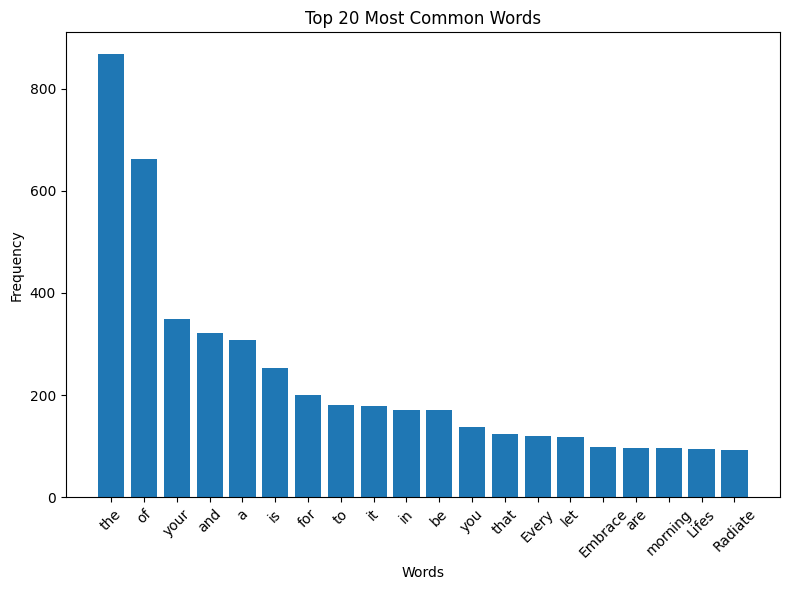

In [6]:
# Concatenate all the quotes into a single string
all_words = " ".join(data['Quotes'])
# Remove any punctuations
all_words = all_words.translate(str.maketrans("", "", string.punctuation))

# Split the string into words
all_words = all_words.split()

# Count the frequency of each word
word_count = Counter(all_words)

# Get the 20 most common words
most_common_words = word_count.most_common(20)

# Prepare data for plotting
words, counts = zip(*most_common_words)

plt.figure(figsize=(8, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Observations**:
- We can see that the first few most frequent words are just common English words, including some stop words like 'the', 'of', 'and', 'a'.
- Since the dataset look like life quotes, words like 'let' and 'Every' are quite common in quotes like that.

### Unique Words
- Find number of unique words and find rate of uniqueness out of the total words

In [7]:
# Number of unique words
print(f"Number of Unique Words: {len(word_count)}")

# Find total amount of words
total_words = len(all_words)
print(f"Total Number of Words: {total_words}")

# Find the percentage of unique words
unique_words = len(word_count) / total_words * 100
print(f"Percentage of Unique Words: {unique_words:.2f}%")

Number of Unique Words: 1220
Total Number of Words: 10600
Percentage of Unique Words: 11.51%


**Observations**
- The unique words make up to approximately 11.5% of the total words which means approximately 88.5% of the words in the dataset are repeated.
- For text generation tasks, a larger vocabulary is actually needed to handle the diversity of words that the model can predict.

### Sentence Length Analysis
- Find out how long each quote is roughly.

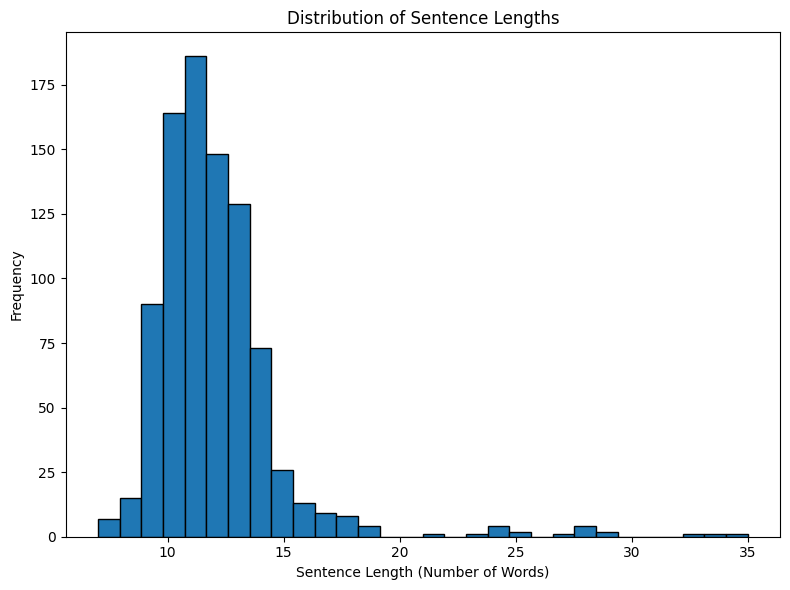

In [8]:
# Analyse the distribution of sentence lengths
sentence_lengths = data["Quotes"].str.split().str.len()

# Plot the distribution of sentence lengths
plt.figure(figsize=(8,6))
plt.hist(sentence_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Observations**
- Histogram is skewed to the left, clustering around 10-15 words each which shows that shorter sentence are more frequent.
- We will need to ensure that the sentence lengths are equal before fitting to the models.

### Word Cloud
- A graphical representation of text data, where words from a text document are displayed in various sizes, with the most frequently occuring words appearing larger.
- Often used for visualizing and gaining insights from text data, such as identifying key terms in a document, website or social media content.

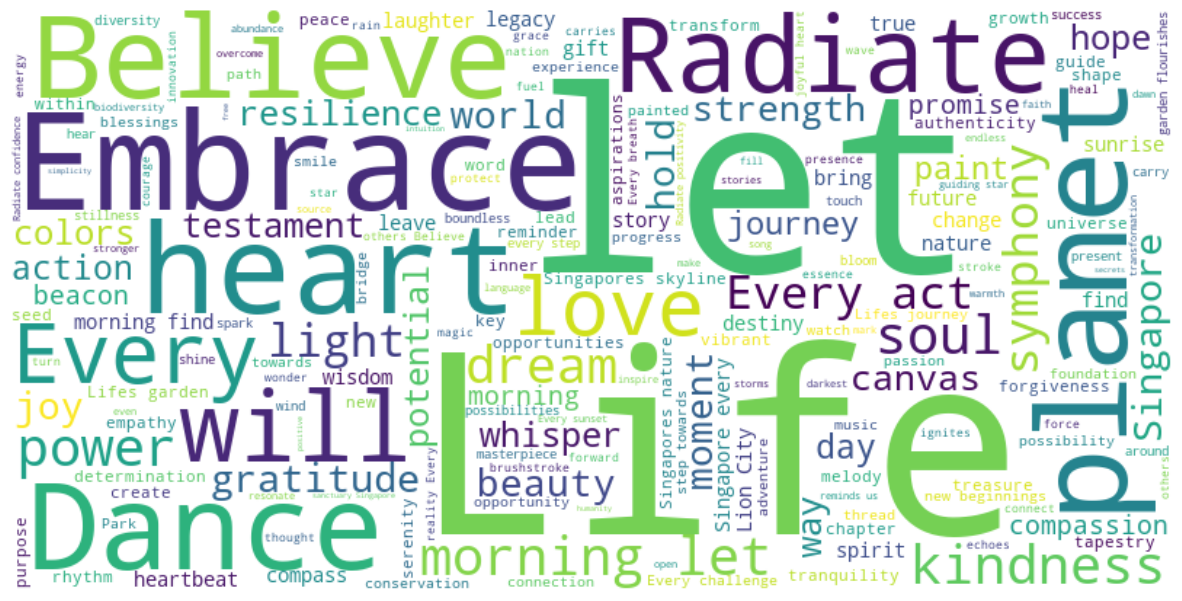

In [9]:
# Generate a word cloud
wordcloud = WordCloud(
    width =800, height=400, background_color='white'
).generate(' '.join(all_words))

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observations**
- According to the word cloud, excluding the stop words, words liked let and life are more common than the other words.

### Bigram Analysis
- Phrases of two words were checked to see which is the most frequent.

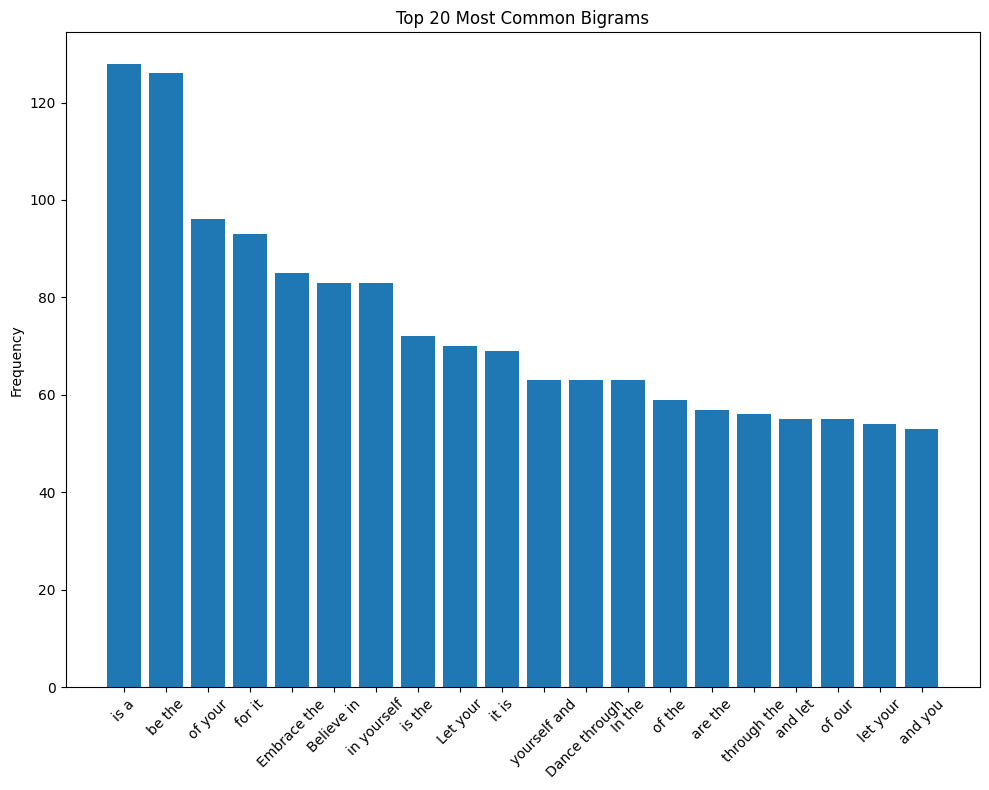

In [10]:
def generate_bigrams(words):
    return zip(words, words[1:])

# Generate bigrams from list of words
bigram_list = list(generate_bigrams(all_words))

# Count the frequency of each bigram
bigram_freq = Counter(bigram_list)

# Get the 20 most common bigrams
most_common_bigrams = bigram_freq.most_common(20)

# Prepare data for plotting
bigram_words, bigram_counts = zip(*most_common_bigrams)
bigram_words = [" ".join(bigram) for bigram in bigram_words]

plt.figure(figsize=(10, 8))
plt.bar(bigram_words, bigram_counts)
plt.title('Top 20 Most Common Bigrams')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Observations**
- Most of the common bigrams like 'be the', 'through the', 'In the' includes the word 'the' which are commonly used expressions.

# 2) Feature Engineering

In [11]:
# Convert the quotes into the list
data_list = list(data["Quotes"].values)
print(data_list)

["Embrace the beauty of every sunrise; it's a fresh chance to paint your world with joy.", 'Embrace challenges; they are the stepping stones to your greatest victories.', 'Embrace the rhythm of life and let it dance through your soul.', 'Embrace kindness, for it has the power to change the world one heart at a time.', 'Embrace the journey, for it leads to the destination of your dreams.', 'Embrace your uniqueness, for it is the fingerprint of your soul on the universe.', 'Embrace the present moment, for it is the only one that truly exists.', 'Embrace your fears, for they hold the key to unlocking your true potential.', 'Embrace gratitude, and watch how it multiplies the blessings in your life.', 'Embrace the rain, for it nourishes the seeds of your future success.', 'Embrace the whispers of your heart; they carry the wisdom of the universe.', 'Embrace laughter, for it is the music of a joyful heart.', 'Embrace the power of forgiveness, for it sets you free from the chains of the past.

### Input-Output Pairing
- Associate the input data with the corresponding output data during training
- Increase the dataset volume
- Minimise the loss of predicted and actual outputs during training
- Not as effective compared to rolling window tokenization

### Expanding Window Tokenization
- Based off time series expanding window
- Create overlapping sequences of tokens from the original text data, allowing the model to predict the next word based on a context window of preceding words
- Approach is different from typical input-output pairing, where each treated as an independent sequence
- Texts to sequences to converts word into a list of integers

In [12]:
# Demonstrate how to use the tokenizer
text_data = ["hello world my name is"]

tokenizer =Tokenizer()
tokenizer.fit_on_texts(text_data)

#Texts to sequences helps 
sequences = tokenizer.texts_to_sequences(text_data)

# Create rolling window sequences
for window_size in range(1, len(text_data[0].split())-1):
    rolling_sequences = [
        sequences[0][i:i+window_size+1] for sequence in sequences 
        for i in range(len(sequence)-window_size)
    ]

    print(f"Window Size of {window_size}: {rolling_sequences}")

Window Size of 1: [[1, 2], [2, 3], [3, 4], [4, 5]]
Window Size of 2: [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
Window Size of 3: [[1, 2, 3, 4], [2, 3, 4, 5]]


In [13]:
# Perform it on the actual dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_list)

all_rolling_sequences = []

for text in data_list:
    sequences = tokenizer.texts_to_sequences([text])[0]

    # Create rolling window sequences for different window size
    rolling_sequence_list = []

    for window_size in range(1, len(sequences)-1):
        rolling_sequences = [
            sequences[i:i+window_size+1] for i in range(len(sequences)-window_size)
        ]
        rolling_sequence_list.append(rolling_sequences)

        if text == data_list[0]:
            print(f"Window Size of {window_size}: {rolling_sequences}")

    # Combine rolling window sequences of different window size
    all_rolling_sequences.extend([item for sublist in rolling_sequence_list for item in sublist])

Window Size of 1: [[17, 1], [1, 49], [49, 2], [2, 13], [13, 77], [77, 372], [372, 5], [5, 163], [163, 486], [486, 10], [10, 101], [101, 3], [3, 46], [46, 22], [22, 52]]
Window Size of 2: [[17, 1, 49], [1, 49, 2], [49, 2, 13], [2, 13, 77], [13, 77, 372], [77, 372, 5], [372, 5, 163], [5, 163, 486], [163, 486, 10], [486, 10, 101], [10, 101, 3], [101, 3, 46], [3, 46, 22], [46, 22, 52]]
Window Size of 3: [[17, 1, 49, 2], [1, 49, 2, 13], [49, 2, 13, 77], [2, 13, 77, 372], [13, 77, 372, 5], [77, 372, 5, 163], [372, 5, 163, 486], [5, 163, 486, 10], [163, 486, 10, 101], [486, 10, 101, 3], [10, 101, 3, 46], [101, 3, 46, 22], [3, 46, 22, 52]]
Window Size of 4: [[17, 1, 49, 2, 13], [1, 49, 2, 13, 77], [49, 2, 13, 77, 372], [2, 13, 77, 372, 5], [13, 77, 372, 5, 163], [77, 372, 5, 163, 486], [372, 5, 163, 486, 10], [5, 163, 486, 10, 101], [163, 486, 10, 101, 3], [486, 10, 101, 3, 46], [10, 101, 3, 46, 22], [101, 3, 46, 22, 52]]
Window Size of 5: [[17, 1, 49, 2, 13, 77], [1, 49, 2, 13, 77, 372], [49,

### Padding
- Adding special tokens of 0 to make input sequences of consistent length, up to the length of the longest sequence in the dataset
- Necessary for training and processing of neural networks

In [14]:
# Pad the combined sequences
max_sequence_rolling_len = max([len(x) for x in all_rolling_sequences])
X_padded = pad_sequences(
    [window[:-1] for window in all_rolling_sequences], 
    maxlen = max_sequence_rolling_len, 
    padding='pre'
    )
y = [window[-1] for window in all_rolling_sequences]

y_categorical = to_categorical(y, num_classes=len(tokenizer.word_index)+1)

total_words_rolling = len(tokenizer.word_index) + 1 # index 0 is reserved for padding
print(f"Total number of words: {total_words_rolling}")

Total number of words: 1199


### Splitting Train, Validation & Test
- Dataset is split into train, validation and testing: 60%, 20% and 20%

In [15]:
# Split the rolling window dataset into training, validation and test sets
X_train_roll, X_test_roll, y_train_roll, y_test_roll = train_test_split(
    X_padded, y_categorical , test_size =0.2, random_state=42, shuffle=True
    )
X_train_roll, X_val_roll, y_train_roll, y_val_roll = train_test_split(
    X_train_roll, y_train_roll, test_size=0.25, random_state=42, shuffle=True
    )

print(f"X_train: {X_train_roll.shape}")
print(f"y_train: {y_train_roll.shape}")
print(f"X_val: {X_val_roll.shape}")
print(f"y_val: {y_val_roll.shape}")
print(f"X_test: {X_test_roll.shape}")
print(f"y_test: {y_test_roll.shape}")

X_train: (36707, 34)
y_train: (36707, 1199)
X_val: (12236, 34)
y_val: (12236, 1199)
X_test: (12236, 34)
y_test: (12236, 1199)


# 3) Model Selection/Model Evaluation
<b>Models List:</b>
- RNN with SimpleRNN layer
- RNN with LSTM layer
- RNN with GRU layer
- Bi-Directional LSTM
- Bi-Directional GRU

In [16]:
# Plot accuracy_curve
def plot_learning_curve(history):
    history_df = pd.DataFrame(history)
    epochs = list(range(1,len(history_df)+1))

    fig, ax = plt.subplots(1,2, figsize=(16,6))
    
    # Training loss and validation loss
    ax1=ax[0]
    ax1.plot(epochs, history_df["loss"], label="Training Loss")
    ax1.plot(epochs, history_df["val_loss"], label="Validation Loss")
    ax1.legend()
    ax1.set_ylabel("Loss")
    ax1.set_xlabel("Number of Epochs")
    ax1.set_title("Training and Validation Loss")

    # Training accuracy and validation accuracy
    ax2=ax[1]
    ax2.plot(epochs, history_df["accuracy"], label="Training Accuracy")
    ax2.plot(epochs, history_df["val_accuracy"], label="Validation Accuracy")
    ax2.legend()
    ax2.set_ylabel("Accuracy")
    ax2.set_xlabel("Number of Epochs")
    ax2.set_title("Training and Validation Accuracy")
    plt.show()

### Simple RNN (Recurrent Neural Network)
- Starts with the Embedding layer which turn the integers in the sequences into fixed-length vectors
- Simple RNN has these key components:
  - Hidden State - At each time step, an RNN maintains a hidden state that is updated based on the current input and the previous hidden state. Hidden state serves as a memory to capture information about the sequence so far.
  - Recurrence - Derived from the connections that allow information to be passed from one step of the sequence to the next. Enables the network to consider the context of previous inputs when processing the current input.
  - Shared Weights - RNNs typically share the same set of weights across all time steps. Weights allow the model to learn patterns and relationships that are consistent across the entire sequence.
- Tend to suffer from the vanishing gradient problem, making it challenging to train on long sequence, unlike LSTM or GRU which are more effective in capturing long-range dependencies in sequence
- Usually uses tanh as it has to do with its second derivative decaying very slowly to zero.

Important Parameters:
- return_sequences = True: Output shape is (batch_size, timesteps, units)
- return_sequences = False: Output shape is (batch_size, units)

### Simple RNN Version 1
- Baseline Model
- Start off with 1 SimpleRNN layer with 64 units

In [17]:
tf.keras.backend.clear_session()

# Create the model
simpleRNN = Sequential(
    name='simpleRNN_v1',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        SimpleRNN(64, activation='tanh'),

        Dropout(0.4),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
simpleRNN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

simpleRNN_history = simpleRNN.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 28s 23ms/step - loss: 5.2567 - accuracy: 0.1108 - val_loss: 4.7446 - val_accuracy: 0.1375
Epoch 2/100
1148/1148 [==============================] - 25s 22ms/step - loss: 4.4604 - accuracy: 0.1752 - val_loss: 4.1367 - val_accuracy: 0.2260
Epoch 3/100
1148/1148 [==============================] - 26s 22ms/step - loss: 3.8853 - accuracy: 0.2495 - val_loss: 3.6042 - val_accuracy: 0.3008
Epoch 4/100
1148/1148 [==============================] - 26s 22ms/step - loss: 3.5337 - accuracy: 0.3025 - val_loss: 3.2565 - val_accuracy: 0.3449
Epoch 5/100
1148/1148 [==============================] - 25s 22ms/step - loss: 3.1463 - accuracy: 0.3547 - val_loss: 2.9639 - val_accuracy: 0.3926
Epoch 6/100
1148/1148 [==============================] - 25s 22ms/step - loss: 2.9029 - accuracy: 0.3894 - val_loss: 2.7564 - val_accuracy: 0.4290
Epoch 7/100
1148/1148 [==============================] - 25s 22ms/step - loss: 2.7080 - accuracy: 0.4186 - val_loss: 2

In [18]:
simpleRNN.summary()

Model: "simpleRNN_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4800      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1199)              77935     
                                                                 
Total params: 94,725
Trainable params: 94,725
Non-trainable params: 0
_________________________________________________________________


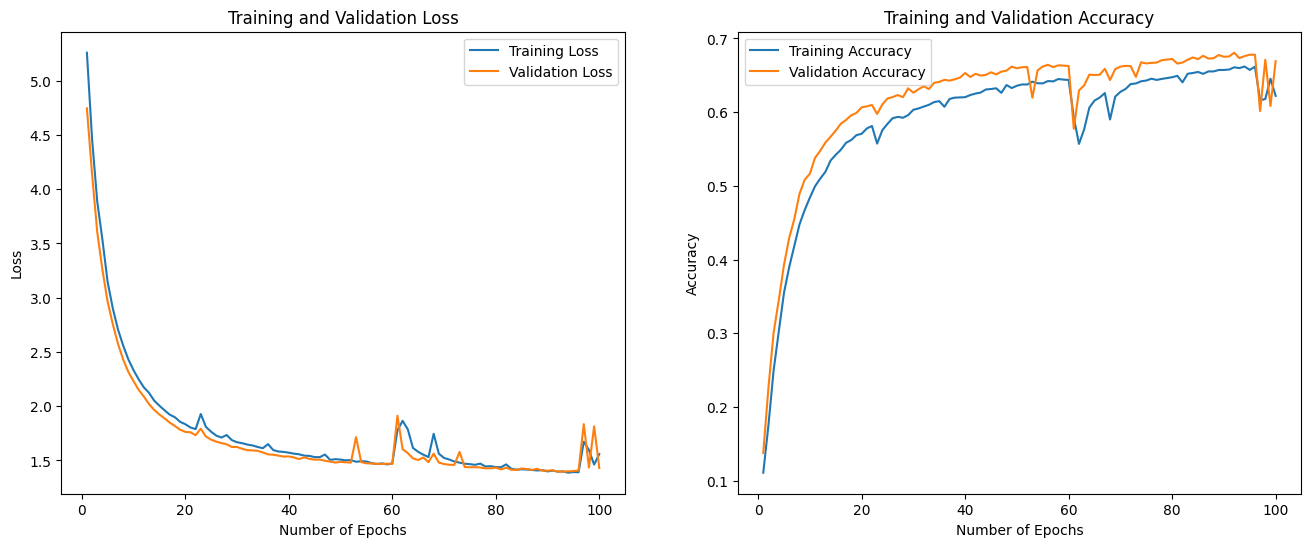

In [19]:
plot_learning_curve(simpleRNN_history.history)

**Observations**
- The training and validation loss curve shows constant fluctuations in the curve, same for its accuracy which suggest this model is not a good one to go about.

In [20]:
simpleRNN.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 2s 4ms/step - loss: 1.4270 - accuracy: 0.6719


[1.4270331859588623, 0.6718698740005493]

**Observations**
- Accuracy of 0.6719 is considered decent for prediction but we need to explore other models.

### Simple RNN Version 2
- SimpleRNN with 128 units
- Dropout of 0.4

In [28]:
tf.keras.backend.clear_session()

# Create the model
simpleRNNv2 = Sequential(
    name='simpleRNN_v2',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        SimpleRNN(128, activation='tanh'),

        Dropout(0.4),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
simpleRNNv2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

simpleRNNv2_history = simpleRNNv2.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 26s 23ms/step - loss: 5.1854 - accuracy: 0.1266 - val_loss: 4.4167 - val_accuracy: 0.1887
Epoch 2/100
1148/1148 [==============================] - 26s 23ms/step - loss: 4.0057 - accuracy: 0.2419 - val_loss: 3.6041 - val_accuracy: 0.3003
Epoch 3/100
1148/1148 [==============================] - 26s 22ms/step - loss: 3.3374 - accuracy: 0.3295 - val_loss: 3.0882 - val_accuracy: 0.3775
Epoch 4/100
1148/1148 [==============================] - 26s 23ms/step - loss: 2.9006 - accuracy: 0.3909 - val_loss: 2.7336 - val_accuracy: 0.4318
Epoch 5/100
1148/1148 [==============================] - 27s 23ms/step - loss: 2.6046 - accuracy: 0.4399 - val_loss: 2.4872 - val_accuracy: 0.4776
Epoch 6/100
1148/1148 [==============================] - 26s 23ms/step - loss: 2.3724 - accuracy: 0.4805 - val_loss: 2.3047 - val_accuracy: 0.5096
Epoch 7/100
1148/1148 [==============================] - 26s 23ms/step - loss: 2.1957 - accuracy: 0.5117 - val_loss: 2

In [29]:
simpleRNNv2.summary()

Model: "simpleRNN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               17792     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 184,453
Trainable params: 184,453
Non-trainable params: 0
_________________________________________________________________


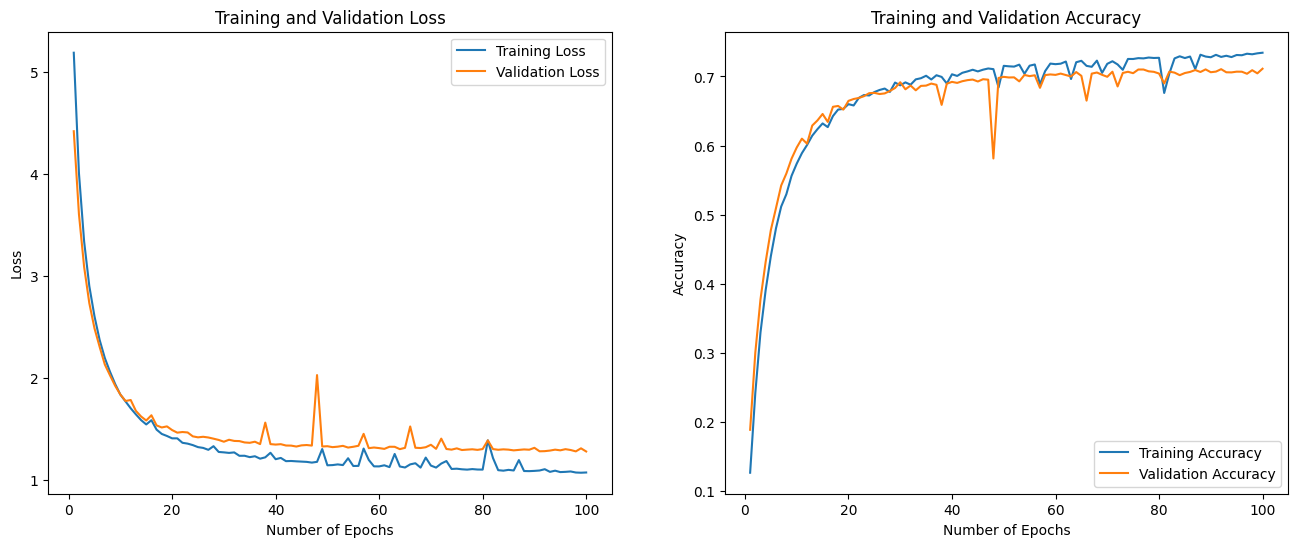

In [30]:
plot_learning_curve(simpleRNNv2_history.history)

**Observations**
- Learning curve still show constant fluctuations in the training and validation loss and accuracy, which shows this might still not be a good model to use.

In [31]:
simpleRNNv2.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 4ms/step - loss: 1.2719 - accuracy: 0.7100


[1.2719430923461914, 0.7099542617797852]

**Observations**
- Accuracy of 71% is relatively higher than the previous model which actually shows that a greater unit of neurons is better for this data.

### Simple RNN Version 3
- 1 SimpleRNN with 128 units
- 1 SimpleRNN with 64 units
- Dropout of 0.4
- Now, try stacking both layers together

In [32]:
tf.keras.backend.clear_session()

# Create the model
simpleRNNv3 = Sequential(
    name='simpleRNN_v3',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        SimpleRNN(128, activation='tanh', return_sequences=True),
        SimpleRNN(64, activation='tanh'),

        Dropout(0.4),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
simpleRNNv3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

simpleRNNv3_history = simpleRNNv3.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 50s 43ms/step - loss: 5.2110 - accuracy: 0.1101 - val_loss: 4.6106 - val_accuracy: 0.1612
Epoch 2/100
1148/1148 [==============================] - 43s 38ms/step - loss: 4.2475 - accuracy: 0.2097 - val_loss: 3.8483 - val_accuracy: 0.2694
Epoch 3/100
1148/1148 [==============================] - 44s 38ms/step - loss: 3.6423 - accuracy: 0.2870 - val_loss: 3.3859 - val_accuracy: 0.3363
Epoch 4/100
1148/1148 [==============================] - 44s 38ms/step - loss: 3.2731 - accuracy: 0.3379 - val_loss: 3.0856 - val_accuracy: 0.3793
Epoch 5/100
1148/1148 [==============================] - 43s 37ms/step - loss: 3.0079 - accuracy: 0.3786 - val_loss: 2.8470 - val_accuracy: 0.4155
Epoch 6/100
1148/1148 [==============================] - 45s 39ms/step - loss: 2.8032 - accuracy: 0.4096 - val_loss: 2.7070 - val_accuracy: 0.4394
Epoch 7/100
1148/1148 [==============================] - 46s 40ms/step - loss: 2.6457 - accuracy: 0.4348 - val_loss: 2

In [33]:
simpleRNNv3.summary()

Model: "simpleRNN_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 simple_rnn (SimpleRNN)      (None, 34, 128)           17792     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1199)              77935     
                                                                 
Total params: 120,069
Trainable params: 120,069
Non-trainable params: 0
_________________________________________________________________


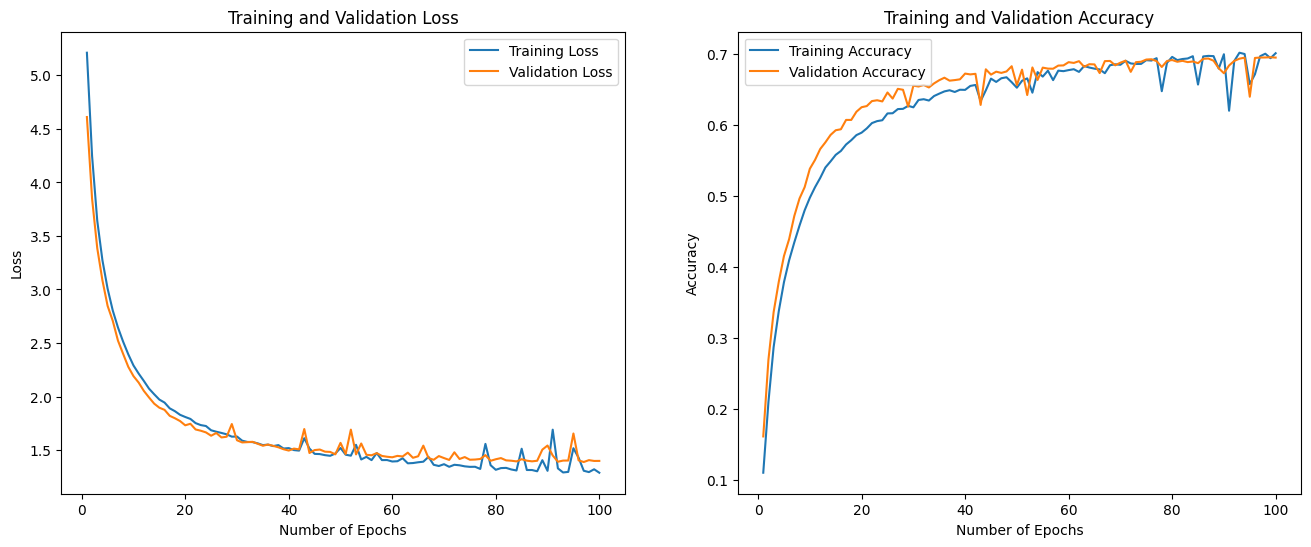

In [34]:
plot_learning_curve(simpleRNNv3_history.history)

**Observations**
- Fluctuations are still quite common like before in the learning curve for both the loss and accuracy.

In [35]:
simpleRNNv3.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 2s 6ms/step - loss: 1.3865 - accuracy: 0.6946


[1.386472463607788, 0.6945897340774536]

**Observations**
- Test accuracy attains a lower accuracy than the previous model, implying that for simpleRNN of 128 units is the best for simpleRNN layer

### LSTM (Long-Short Term Memory)
- Designed to avoid the long-term dependency problem.
- e.g. The man who ate my pizza has purple hair. Purple hair is for the man and not the pizza.
- Overcome the constraints of regular RNNs which frequently struggle with vanishing gradient problem.
- Has a hidden state and a memory cell with three gates thate are forgotten, input and output gate.

<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" alt="LSTM chain like structure" style="display:block; margin:0 auto;" width="650">
        
Image Source: Prashant Banerjee, 2019

- The forget gate is mainly used to get good control of what information needs to be removed which isn’t necessary.
- Input gate makes sure that newer information is added to the cell and output makes sure what parts of the cell are output to the next hidden state.
- Sigmoid function used in each gate equation helps being down the value to either 0 or 1.
  
<img src="https://editor.analyticsvidhya.com/uploads/410331_rJN4xBVD_u0vYLc2olcDHQ.png" alt="LSTM Hidden State" style="display:block; margin:0 auto;" width="650">

Image Source: Siddharth, M., 2021

### LSTM Version 1
- LSTM with 256 units
- Dropout of 0.3

In [36]:
tf.keras.backend.clear_session()

# Create the model
LSTM_V1 = Sequential(
    name='lstm_v1',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        LSTM(256, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
LSTM_V1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_V1_history = LSTM_V1.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 8s 6ms/step - loss: 5.0829 - accuracy: 0.1221 - val_loss: 4.5392 - val_accuracy: 0.1528
Epoch 2/100
1148/1148 [==============================] - 6s 5ms/step - loss: 4.1428 - accuracy: 0.2095 - val_loss: 3.7846 - val_accuracy: 0.2632
Epoch 3/100
1148/1148 [==============================] - 6s 5ms/step - loss: 3.4359 - accuracy: 0.3003 - val_loss: 3.1999 - val_accuracy: 0.3425
Epoch 4/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.9136 - accuracy: 0.3804 - val_loss: 2.7889 - val_accuracy: 0.4202
Epoch 5/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.5276 - accuracy: 0.4465 - val_loss: 2.4847 - val_accuracy: 0.4736
Epoch 6/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.2489 - accuracy: 0.4947 - val_loss: 2.2676 - val_accuracy: 0.5072
Epoch 7/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.0388 - accuracy: 0.5303 - val_loss: 2.1052 - val_ac

In [37]:
LSTM_V1.summary()

Model: "lstm_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 lstm (LSTM)                 (None, 256)               273408    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 593,541
Trainable params: 593,541
Non-trainable params: 0
_________________________________________________________________


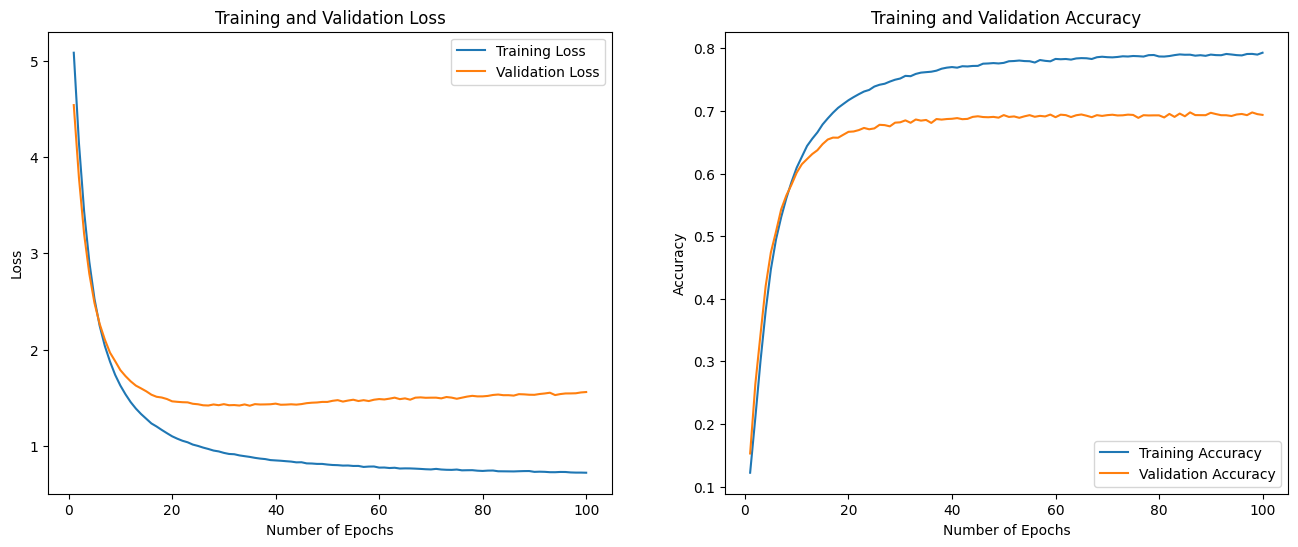

In [38]:
plot_learning_curve(LSTM_V1_history.history)

**Observations**
- Generally, for the training and validation loss curve, the validation loss is far greater than the training loss, as well as showing the training accuracy curve still higher than the validation accuracy curve.
- This might mean that the model is being unable to generalise the data, I will need to explore more models.

In [39]:
LSTM_V1.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.5591 - accuracy: 0.6976


[1.5591022968292236, 0.6976135969161987]

**Observations**
- The test accuracy is decent but we can find a better accuracy for the models.

### LSTM Version 2
- LSTM with 64 units
- Dropout of 0.3

In [40]:
tf.keras.backend.clear_session()

# Create the model
LSTM_V2 = Sequential(
    name='lstm_v2',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        LSTM(64, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
LSTM_V2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_V2_history = LSTM_V2.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 7s 5ms/step - loss: 5.2943 - accuracy: 0.0977 - val_loss: 4.9838 - val_accuracy: 0.1261
Epoch 2/100
1148/1148 [==============================] - 5s 5ms/step - loss: 4.8138 - accuracy: 0.1377 - val_loss: 4.6586 - val_accuracy: 0.1477
Epoch 3/100
1148/1148 [==============================] - 5s 5ms/step - loss: 4.4596 - accuracy: 0.1678 - val_loss: 4.2644 - val_accuracy: 0.1903
Epoch 4/100
1148/1148 [==============================] - 5s 5ms/step - loss: 4.0955 - accuracy: 0.2142 - val_loss: 3.9578 - val_accuracy: 0.2346
Epoch 5/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.8209 - accuracy: 0.2485 - val_loss: 3.7048 - val_accuracy: 0.2727
Epoch 6/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.5928 - accuracy: 0.2794 - val_loss: 3.4992 - val_accuracy: 0.3048
Epoch 7/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.3989 - accuracy: 0.3072 - val_loss: 3.3239 - val_ac

In [41]:
LSTM_V2.summary()

Model: "lstm_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 lstm (LSTM)                 (None, 64)                19200     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1199)              77935     
                                                                 
Total params: 109,125
Trainable params: 109,125
Non-trainable params: 0
_________________________________________________________________


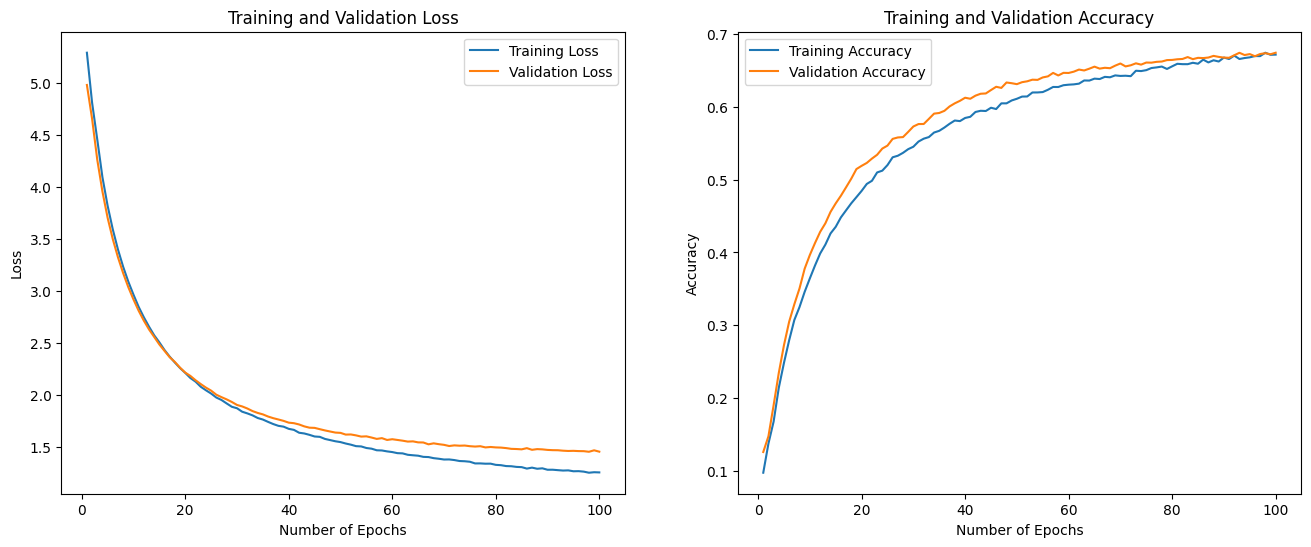

In [42]:
plot_learning_curve(LSTM_V2_history.history)

**Observations**
- The curve actually looks quite good, the training and validation curve are converging into a single point and are able to reach quite a high accuracy.

In [43]:
LSTM_V2.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.4599 - accuracy: 0.6816


[1.4599246978759766, 0.6815952658653259]

**Observations**
- As mentioend, the test accuracy of 0.68 is quite high, which shows that this model is good

### LSTM Version 3
- Involve use of 128 units layers

In [44]:
tf.keras.backend.clear_session()

# Create the model
LSTM_V3 = Sequential(
    name='lstm_v3',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        LSTM(128, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
LSTM_V3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_V3_history = LSTM_V3.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 7s 5ms/step - loss: 5.2243 - accuracy: 0.1087 - val_loss: 4.8404 - val_accuracy: 0.1299
Epoch 2/100
1148/1148 [==============================] - 6s 5ms/step - loss: 4.5886 - accuracy: 0.1574 - val_loss: 4.3372 - val_accuracy: 0.1859
Epoch 3/100
1148/1148 [==============================] - 6s 5ms/step - loss: 4.1104 - accuracy: 0.2161 - val_loss: 3.9402 - val_accuracy: 0.2401
Epoch 4/100
1148/1148 [==============================] - 7s 6ms/step - loss: 3.7337 - accuracy: 0.2597 - val_loss: 3.5937 - val_accuracy: 0.2817
Epoch 5/100
1148/1148 [==============================] - 7s 6ms/step - loss: 3.4169 - accuracy: 0.2985 - val_loss: 3.3127 - val_accuracy: 0.3197
Epoch 6/100
1148/1148 [==============================] - 7s 6ms/step - loss: 3.1360 - accuracy: 0.3376 - val_loss: 3.0525 - val_accuracy: 0.3696
Epoch 7/100
1148/1148 [==============================] - 6s 6ms/step - loss: 2.8905 - accuracy: 0.3757 - val_loss: 2.8428 - val_ac

In [45]:
LSTM_V3.summary()

Model: "lstm_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 237,829
Trainable params: 237,829
Non-trainable params: 0
_________________________________________________________________


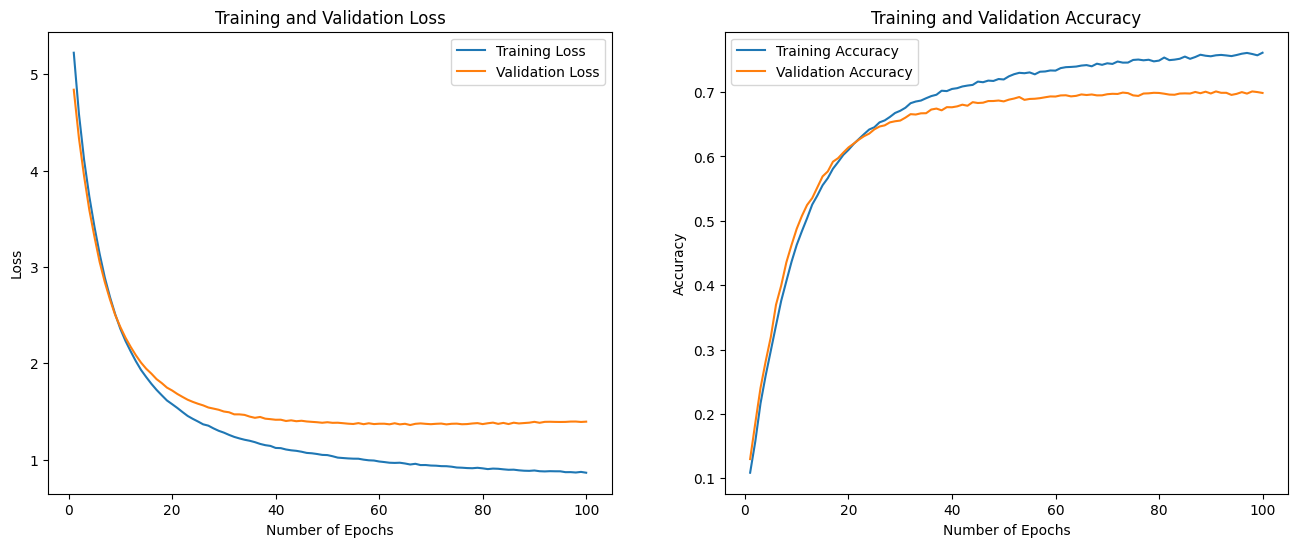

In [46]:
plot_learning_curve(LSTM_V3_history.history)

**Observations**
- The learning curve shows that the validation loss is higher than the training loss while the training accuracy is higher than the validation loss.
- This is not really converging to a single point which showthat the previous model is actually better.

In [47]:
LSTM_V3.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.3818 - accuracy: 0.7010


[1.3817840814590454, 0.7009643912315369]

**Observations**
- This model has attain the highest test accuracy so far, neaer 0.70.

### LSTM Version 4
- Involves stacking LSTM with 128 & 64 units
- Dropout of 0.3

In [48]:
tf.keras.backend.clear_session()

# Create the model
LSTM_V4 = Sequential(
    name='lstm_v4',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        LSTM(128, activation='tanh', return_sequences=True),
        LSTM(64, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
LSTM_V4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_V4_history = LSTM_V4.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 10s 8ms/step - loss: 5.2703 - accuracy: 0.1010 - val_loss: 4.8707 - val_accuracy: 0.1286
Epoch 2/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.6822 - accuracy: 0.1454 - val_loss: 4.5236 - val_accuracy: 0.1646
Epoch 3/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.7848 - accuracy: 0.1403 - val_loss: 4.7249 - val_accuracy: 0.1387
Epoch 4/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.5349 - accuracy: 0.1544 - val_loss: 4.3557 - val_accuracy: 0.1765
Epoch 5/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.2777 - accuracy: 0.1833 - val_loss: 4.1659 - val_accuracy: 0.2038
Epoch 6/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.0831 - accuracy: 0.2067 - val_loss: 3.9639 - val_accuracy: 0.2400
Epoch 7/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.8647 - accuracy: 0.2326 - val_loss: 3.7475 - val_a

In [49]:
LSTM_V4.summary()

Model: "lstm_v4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 lstm (LSTM)                 (None, 34, 128)           71168     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1199)              77935     
                                                                 
Total params: 210,501
Trainable params: 210,501
Non-trainable params: 0
_________________________________________________________________


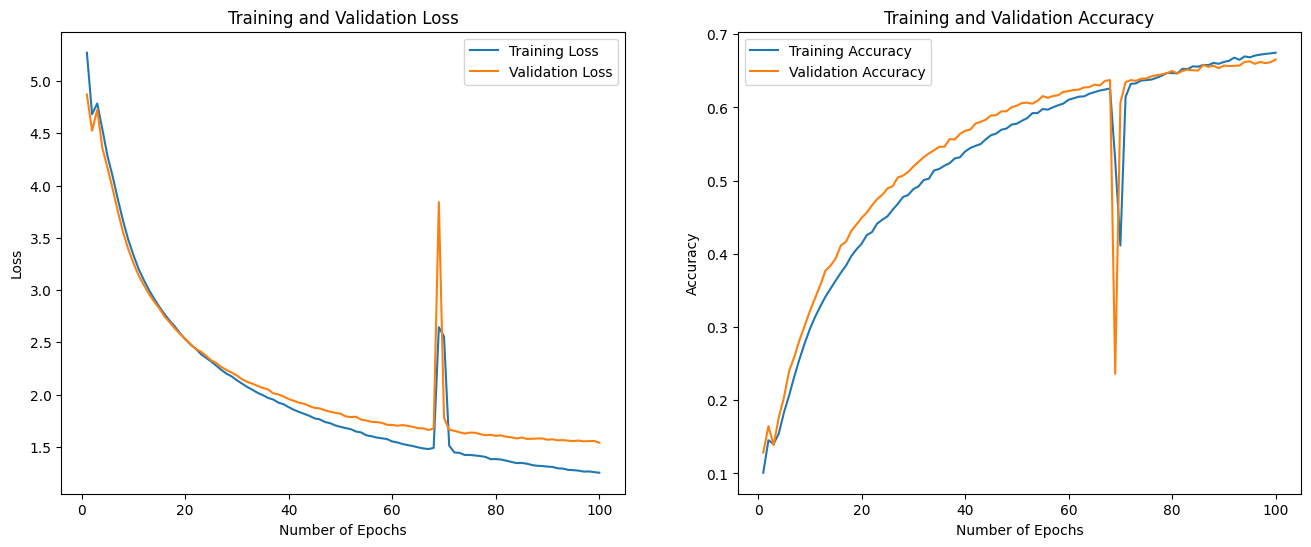

In [50]:
plot_learning_curve(LSTM_V4_history.history)

**Observations**
- Learning curve begin to show sharp fluctuations which did not happen before and it is not supposed to show this.

In [51]:
LSTM_V4.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.5174 - accuracy: 0.6688


[1.5174171924591064, 0.6687642931938171]

**Observations**
- The test accuracy is quite low for this model anyways.

### GRU (Gated Recurrent Unit)
- Retains the LSTM vanishing gradient problem
- Faster than LSTM since fewer computations are needed to make updates to its hidden state
- Fewer gates than LSTM and no separate cell state as it relies solely on a hidden state for memory transfer between recurrent units.
- Has only two gates: 
  - Reset gate - Determines how much of past information should be forgotten. Takes the concatenation of current input and previous hidden state as input and outputs a value between 0 and 1 for each element in the hidden state.
  - Update gate - Decides how much of the new information should be included in the new hidden state. Also takes the concatenation of current input and previous hidden state as input and outputs a value between 0 and 1 for each element in the hidden state.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/06212831/lstm_gru.png" alt="Difference of LSTM & GRU hidden structure" style="display:block; margin:0 auto;" width="650">

Image Source: Dishashree, G., 2020

### GRU Version 1
- GRU with 128 units
- Dropout of 0.3

In [75]:
tf.keras.backend.clear_session()

# Create the model
GRU_V1 = Sequential(
    name='gru_v1',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(128, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
GRU_V1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_V1_history = GRU_V1.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 7s 5ms/step - loss: 5.0105 - accuracy: 0.1295 - val_loss: 4.3266 - val_accuracy: 0.1957
Epoch 2/100
1148/1148 [==============================] - 6s 5ms/step - loss: 3.8680 - accuracy: 0.2475 - val_loss: 3.4879 - val_accuracy: 0.3041
Epoch 3/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.1805 - accuracy: 0.3371 - val_loss: 2.9429 - val_accuracy: 0.3915
Epoch 4/100
1148/1148 [==============================] - 5s 5ms/step - loss: 2.7148 - accuracy: 0.4115 - val_loss: 2.5883 - val_accuracy: 0.4515
Epoch 5/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.3945 - accuracy: 0.4687 - val_loss: 2.3481 - val_accuracy: 0.5015
Epoch 6/100
1148/1148 [==============================] - 5s 5ms/step - loss: 2.1639 - accuracy: 0.5110 - val_loss: 2.1634 - val_accuracy: 0.5319
Epoch 7/100
1148/1148 [==============================] - 5s 5ms/step - loss: 1.9882 - accuracy: 0.5406 - val_loss: 2.0197 - val_ac

In [76]:
GRU_V1.summary()

Model: "gru_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 128)               53760     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 220,421
Trainable params: 220,421
Non-trainable params: 0
_________________________________________________________________


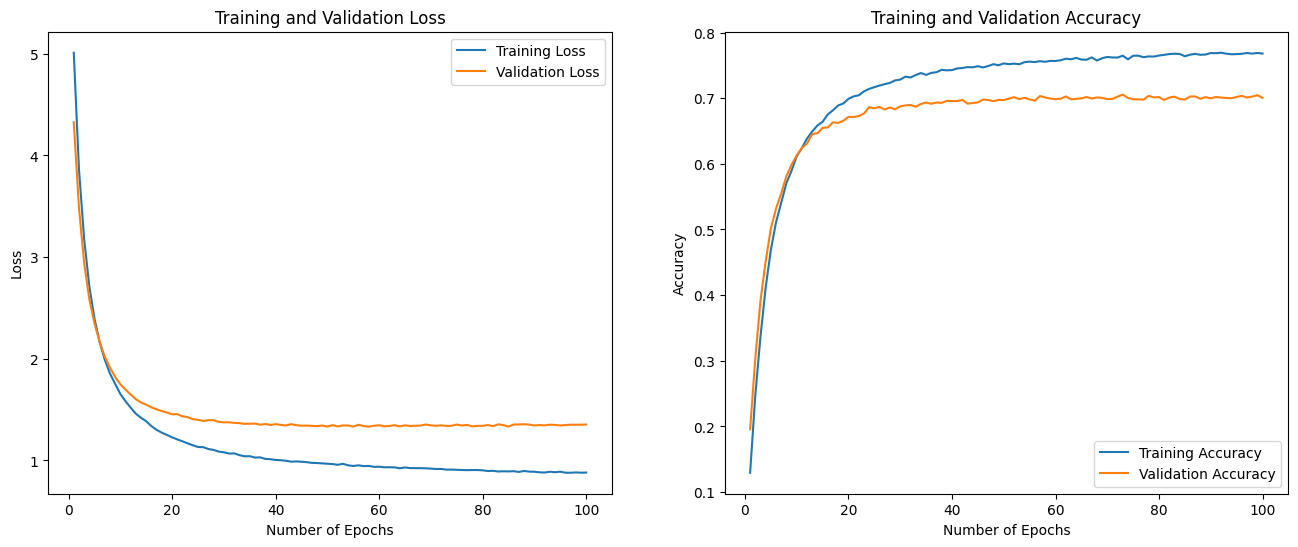

In [77]:
plot_learning_curve(GRU_V1_history.history)

**Observations**
- The loss curve shows that the validation loss is much higher than the training curve whereas the training accuracy is hgiher than the validation curvel.

In [78]:
GRU_V1.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.3419 - accuracy: 0.6987


[1.3419456481933594, 0.6986760497093201]

**Observations**
- The test accuracy is quite decent but it can be further improved.

### GRU Version 2
- GRU with 256 units
- Dropout of 0.3

In [79]:
tf.keras.backend.clear_session()

# Create the model
GRU_V2 = Sequential(
    name='gru_v2',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(256, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
GRU_V2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_V2_history = GRU_V2.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 7s 5ms/step - loss: 4.7888 - accuracy: 0.1552 - val_loss: 3.8862 - val_accuracy: 0.2642
Epoch 2/100
1148/1148 [==============================] - 6s 5ms/step - loss: 3.3270 - accuracy: 0.3304 - val_loss: 2.9117 - val_accuracy: 0.3966
Epoch 3/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.5623 - accuracy: 0.4435 - val_loss: 2.3888 - val_accuracy: 0.4919
Epoch 4/100
1148/1148 [==============================] - 6s 5ms/step - loss: 2.1084 - accuracy: 0.5271 - val_loss: 2.0847 - val_accuracy: 0.5474
Epoch 5/100
1148/1148 [==============================] - 6s 6ms/step - loss: 1.8298 - accuracy: 0.5756 - val_loss: 1.8946 - val_accuracy: 0.5863
Epoch 6/100
1148/1148 [==============================] - 7s 6ms/step - loss: 1.6393 - accuracy: 0.6160 - val_loss: 1.7773 - val_accuracy: 0.6041
Epoch 7/100
1148/1148 [==============================] - 6s 6ms/step - loss: 1.5140 - accuracy: 0.6396 - val_loss: 1.6840 - val_ac

In [80]:
GRU_V2.summary()

Model: "gru_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 256)               205824    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 525,957
Trainable params: 525,957
Non-trainable params: 0
_________________________________________________________________


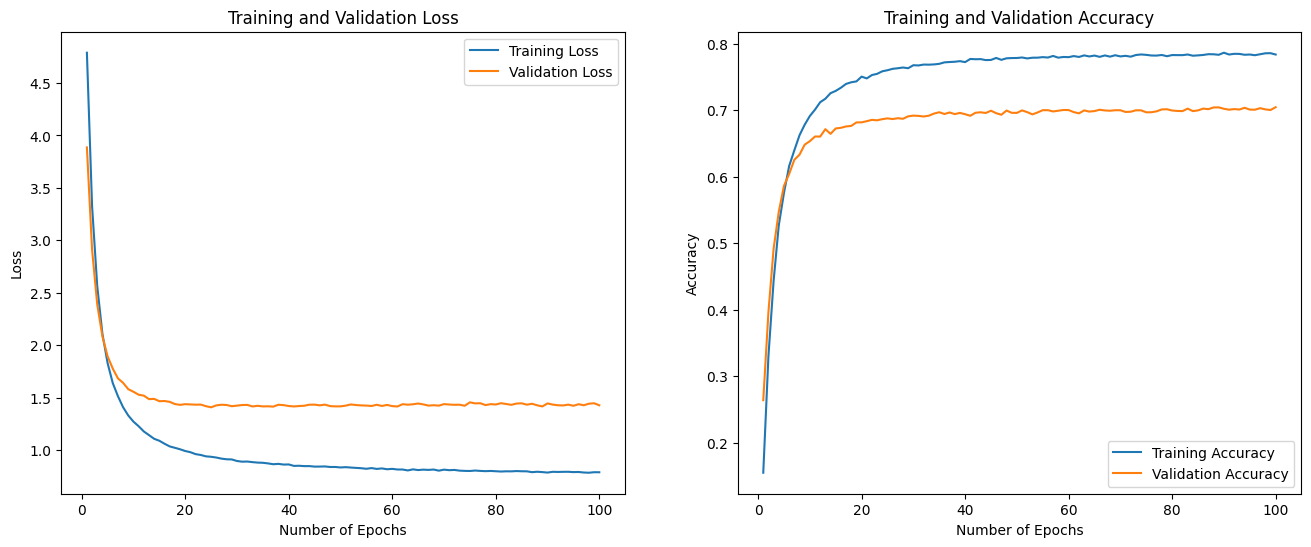

In [81]:
plot_learning_curve(GRU_V2_history.history)

**Observations**
- The validation loss is much higher than the training loss while the validation accuracy is much lower than the training accuracy.

In [82]:
GRU_V2.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.4258 - accuracy: 0.7071


[1.4258129596710205, 0.7070938348770142]

**Observations**
- This model shows the highest test accuracy so far for GRU.

### GRU Version 3
 - GRU layer of 64 units
 - Dropout of 0.3

In [83]:
tf.keras.backend.clear_session()

# Create the model
GRU_V3 = Sequential(
    name='gru_v3',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(64, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
GRU_V3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_V3_history = GRU_V3.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 6s 5ms/step - loss: 5.1391 - accuracy: 0.1156 - val_loss: 4.5869 - val_accuracy: 0.1491
Epoch 2/100
1148/1148 [==============================] - 5s 5ms/step - loss: 4.2481 - accuracy: 0.2000 - val_loss: 3.9412 - val_accuracy: 0.2390
Epoch 3/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.6982 - accuracy: 0.2702 - val_loss: 3.4665 - val_accuracy: 0.3133
Epoch 4/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.3008 - accuracy: 0.3203 - val_loss: 3.1474 - val_accuracy: 0.3588
Epoch 5/100
1148/1148 [==============================] - 5s 5ms/step - loss: 3.0204 - accuracy: 0.3608 - val_loss: 2.9128 - val_accuracy: 0.3931
Epoch 6/100
1148/1148 [==============================] - 5s 5ms/step - loss: 2.8109 - accuracy: 0.3927 - val_loss: 2.7280 - val_accuracy: 0.4205
Epoch 7/100
1148/1148 [==============================] - 5s 5ms/step - loss: 2.6393 - accuracy: 0.4179 - val_loss: 2.5827 - val_ac

In [84]:
GRU_V3.summary()

Model: "gru_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 64)                14592     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1199)              77935     
                                                                 
Total params: 104,517
Trainable params: 104,517
Non-trainable params: 0
_________________________________________________________________


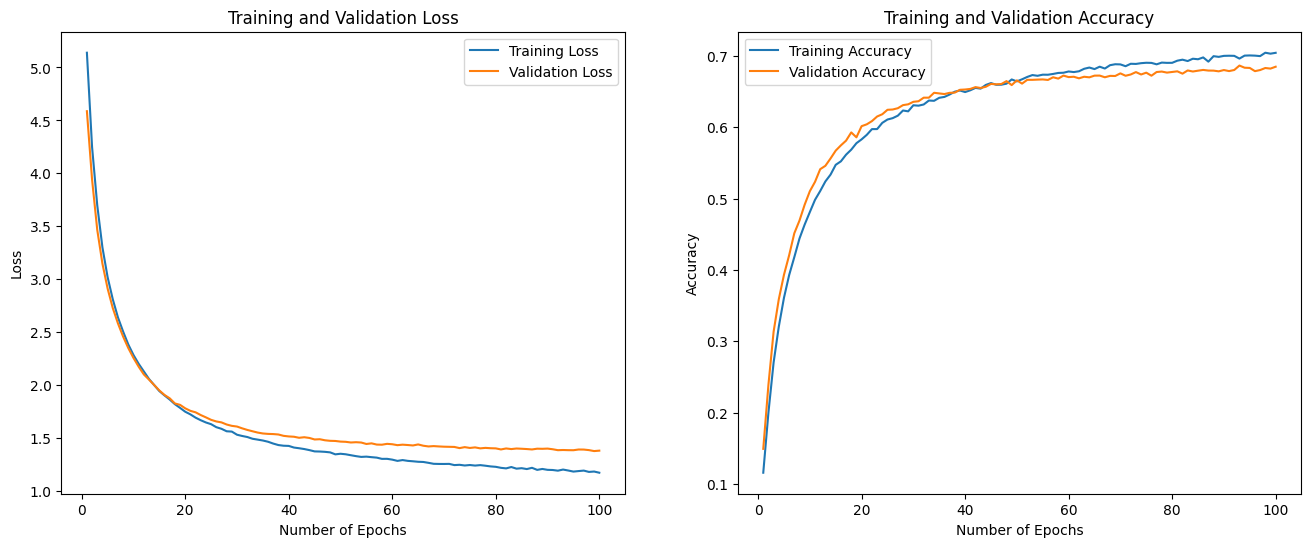

In [85]:
plot_learning_curve(GRU_V3_history.history)

**Observations**
- The learning curves actually converges quite well for this model, implying accurate levels of prediction across the increasing epochs

In [86]:
GRU_V3.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.3736 - accuracy: 0.6818


[1.373557686805725, 0.6818404793739319]

**Observations**
- The testing accuracy is acutally a little low for this model, 68% can still be improved with more epochs.

### GRU Version 4
- Involves stacking layer of GRU with 256 units and GRU of 128 units
- Dropout of 0.3

In [87]:
tf.keras.backend.clear_session()

# Create the model
GRU_V4 = Sequential(
    name='gru_v4',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(256, activation='tanh', return_sequences=True),
        GRU(128, activation='tanh'),


        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
GRU_V4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_V4_history = GRU_V4.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 10s 8ms/step - loss: 5.4663 - accuracy: 0.0835 - val_loss: 5.0312 - val_accuracy: 0.1268
Epoch 2/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.8376 - accuracy: 0.1427 - val_loss: 4.6088 - val_accuracy: 0.1737
Epoch 3/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.5230 - accuracy: 0.1801 - val_loss: 4.3765 - val_accuracy: 0.2043
Epoch 4/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.3408 - accuracy: 0.1986 - val_loss: 4.2243 - val_accuracy: 0.2141
Epoch 5/100
1148/1148 [==============================] - 9s 7ms/step - loss: 4.2112 - accuracy: 0.2110 - val_loss: 4.0837 - val_accuracy: 0.2321
Epoch 6/100
1148/1148 [==============================] - 9s 8ms/step - loss: 4.0949 - accuracy: 0.2243 - val_loss: 3.9840 - val_accuracy: 0.2451
Epoch 7/100
1148/1148 [==============================] - 9s 7ms/step - loss: 3.9971 - accuracy: 0.2337 - val_loss: 3.8648 - val_a

In [88]:
GRU_V4.summary()

Model: "gru_v4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 34, 256)           205824    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 520,709
Trainable params: 520,709
Non-trainable params: 0
_________________________________________________________________


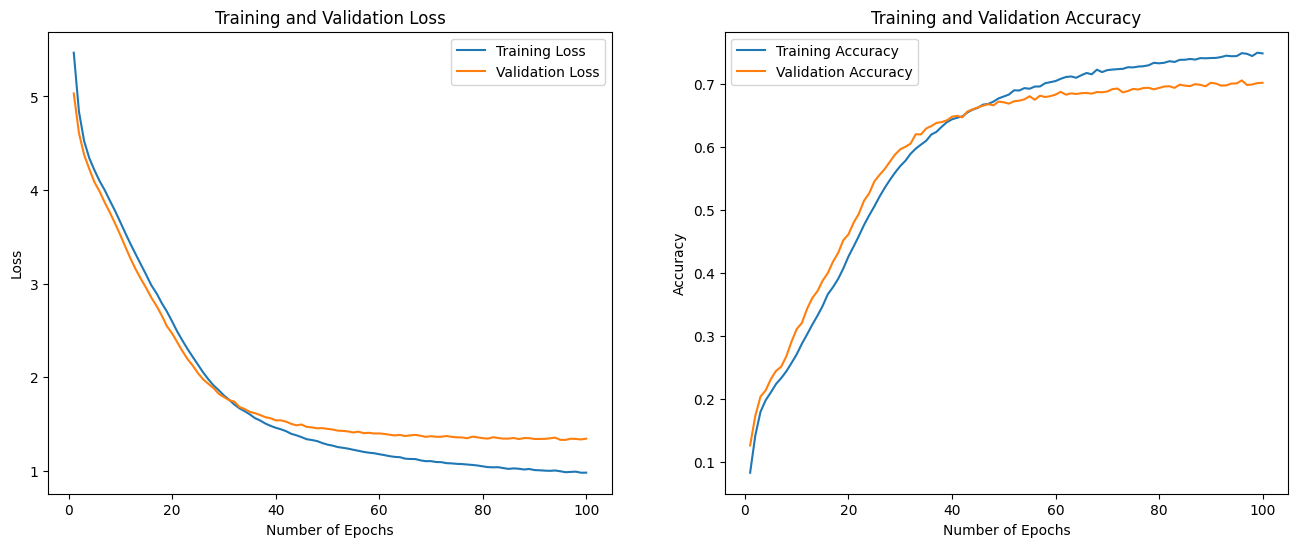

In [89]:
plot_learning_curve(GRU_V4_history.history)

**Observations**
- The learning seems to be converging quickly at the first 40 epochs and then back to its steady rate of convergence.
- Indicates model has bad way of converging to a certain point, require another way to improve the model.

In [90]:
GRU_V4.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.3385 - accuracy: 0.7028


[1.3385025262832642, 0.7027623653411865]

**Observations**
- Test accuracy might be high but is not the ideal model to achieve this result.

### Bi-Directional LSTM
- In traditional LSTM, the input sequence is processed only in forward direction, starting from beginning to end.
- In Bidirectional LSTM, the input sequence is processed both in forward direction (from the beginning to end) and in the backward direction (from end to beginning)
- Hidden states of Bidirectional LSTM are computed by concatenating the hidden states from forward and backward passes at each time step, hence containing information from both directions
- Example:
  - First Statement: Server can you bring the dish.
  - Second Statement: He crashed the server.
  - The word server has different meanings and this relationship depends on the following and preceding words in the statement.
  - This relationship is understood by bidirectional LSTM better than unidirectional LSTM.

<img src="https://av-eks-lekhak.s3.amazonaws.com/media/__sized__/article_images/image_M9KFiq9-thumbnail_webp-600x300.webp" alt="Bi-Directional LSTM" style="display:block; margin:0 auto;" width="650">

Image Source: Kumari, K., 2023

### Bi Directional LSTM Version 1
- Bidirectional LSTM layer of 256 units
- Dropout of 0.3

In [95]:
# Bidirectional LSTM
tf.keras.backend.clear_session()

# Create the model
Bi_LSTM_V1 = Sequential(
    name='bi_directional_lstm_v1',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        Bidirectional(LSTM(256, activation='tanh')),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
Bi_LSTM_V1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Bi_LSTM_V1_history = Bi_LSTM_V1.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 11s 8ms/step - loss: 4.9760 - accuracy: 0.1329 - val_loss: 4.1694 - val_accuracy: 0.2207
Epoch 2/100
1148/1148 [==============================] - 9s 8ms/step - loss: 3.6301 - accuracy: 0.2848 - val_loss: 3.2637 - val_accuracy: 0.3457
Epoch 3/100
1148/1148 [==============================] - 9s 8ms/step - loss: 2.9039 - accuracy: 0.3908 - val_loss: 2.7701 - val_accuracy: 0.4268
Epoch 4/100
1148/1148 [==============================] - 9s 8ms/step - loss: 2.4648 - accuracy: 0.4613 - val_loss: 2.4488 - val_accuracy: 0.4800
Epoch 5/100
1148/1148 [==============================] - 9s 8ms/step - loss: 2.1759 - accuracy: 0.5065 - val_loss: 2.2286 - val_accuracy: 0.5151
Epoch 6/100
1148/1148 [==============================] - 9s 8ms/step - loss: 1.9571 - accuracy: 0.5495 - val_loss: 2.0640 - val_accuracy: 0.5436
Epoch 7/100
1148/1148 [==============================] - 9s 8ms/step - loss: 1.7940 - accuracy: 0.5775 - val_loss: 1.9345 - val_a

In [96]:
Bi_LSTM_V1.summary()

Model: "bi_directional_lstm_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              546816    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1199)              615087    
                                                                 
Total params: 1,173,893
Trainable params: 1,173,893
Non-trainable params: 0
_________________________________________________________________


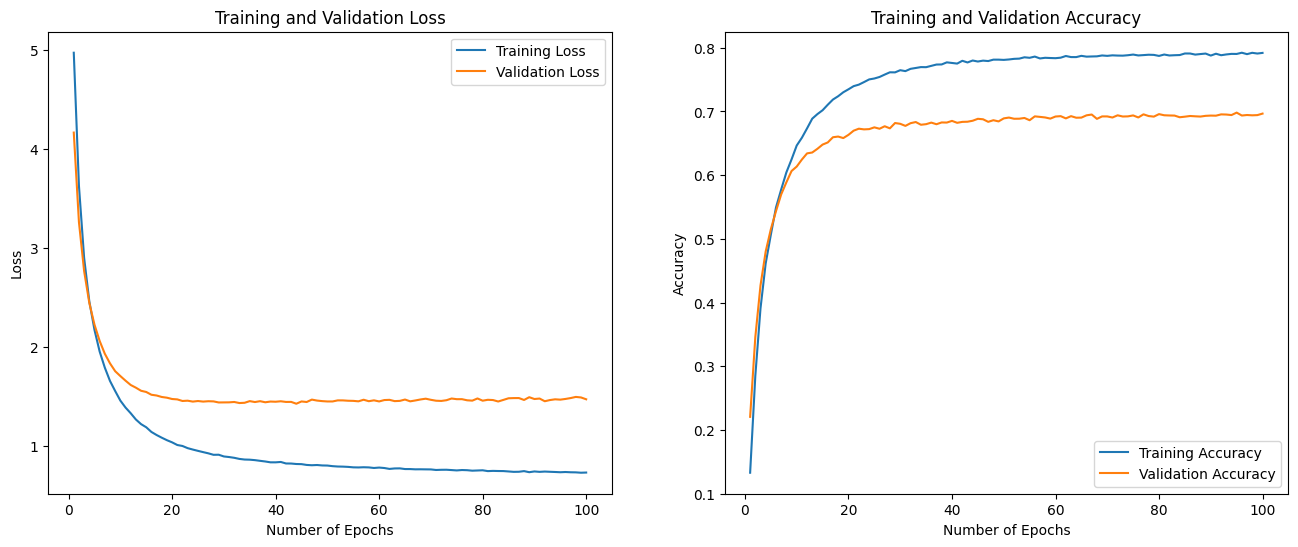

In [97]:
plot_learning_curve(Bi_LSTM_V1_history.history)

**Observations**
- The model is unable to generalise the validation data to the training data hence training data is able to converge more efficiently compared to the validation curve.

In [98]:
Bi_LSTM_V1.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 4ms/step - loss: 1.4729 - accuracy: 0.6929


[1.472949743270874, 0.692873477935791]

**Observations**
- The test accuracy is quite decent even with thay curve, might be able to improve for a better result

### Bi Directional LSTM Version 3
- BiDirectional LSTM of 128 units
- Dropout of 0.3

In [103]:
tf.keras.backend.clear_session()

# Create the model
Bi_LSTM_V3 = Sequential(
    name='bi_directional_lstm_v3',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        Bidirectional(LSTM(128, activation='tanh')),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
Bi_LSTM_V3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Bi_LSTM_V3_history = Bi_LSTM_V3.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 11s 8ms/step - loss: 5.1227 - accuracy: 0.1152 - val_loss: 4.6069 - val_accuracy: 0.1430
Epoch 2/100
1148/1148 [==============================] - 9s 8ms/step - loss: 4.3421 - accuracy: 0.1775 - val_loss: 4.1059 - val_accuracy: 0.2076
Epoch 3/100
1148/1148 [==============================] - 9s 8ms/step - loss: 3.8228 - accuracy: 0.2440 - val_loss: 3.6392 - val_accuracy: 0.2763
Epoch 4/100
1148/1148 [==============================] - 9s 8ms/step - loss: 3.4152 - accuracy: 0.2981 - val_loss: 3.2881 - val_accuracy: 0.3258
Epoch 5/100
1148/1148 [==============================] - 9s 7ms/step - loss: 3.0972 - accuracy: 0.3418 - val_loss: 3.0152 - val_accuracy: 0.3680
Epoch 6/100
1148/1148 [==============================] - 9s 7ms/step - loss: 2.8305 - accuracy: 0.3816 - val_loss: 2.7948 - val_accuracy: 0.4029
Epoch 7/100
1148/1148 [==============================] - 9s 8ms/step - loss: 2.6061 - accuracy: 0.4192 - val_loss: 2.5926 - val_a

In [104]:
Bi_LSTM_V3.summary()

Model: "bi_directional_lstm_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              142336    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 462,469
Trainable params: 462,469
Non-trainable params: 0
_________________________________________________________________


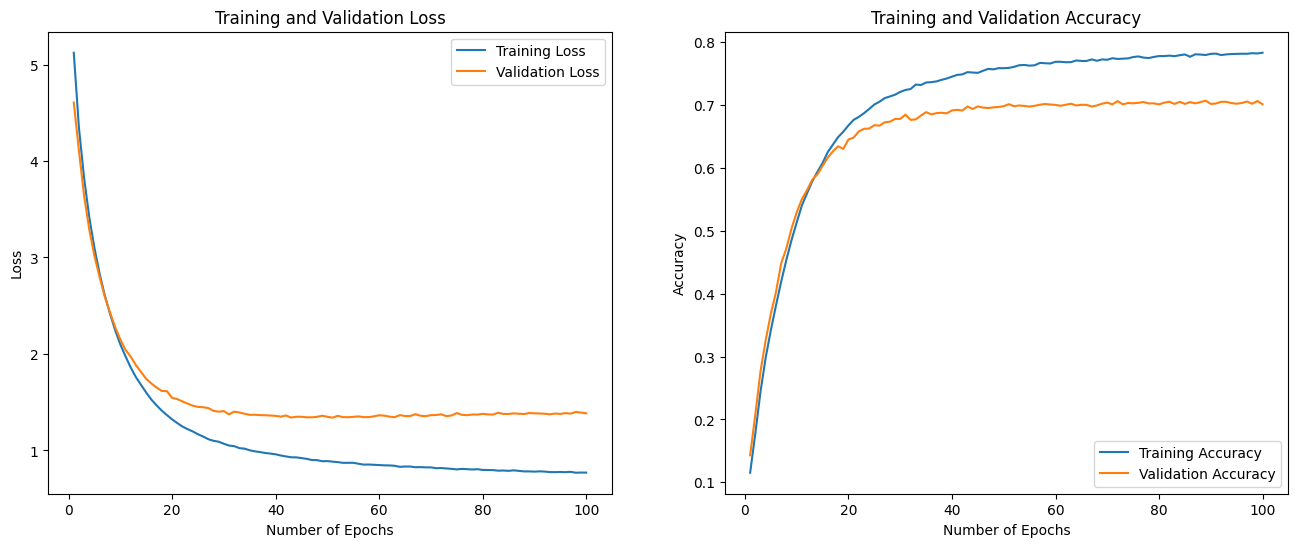

In [105]:
plot_learning_curve(Bi_LSTM_V3_history.history)

**Observations**
- The model is unable to generalise the validation data to the training data hence training data is able to converge more efficiently compared to the validation curve.

In [106]:
Bi_LSTM_V3.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.3746 - accuracy: 0.7029


[1.374636173248291, 0.7029258012771606]

**Observations**
- Test accuracy is quite high.

### Bi Directional LSTM Version 4
- Bidirectional LSTM of 64 units
- Dropout of 0.3

In [107]:
tf.keras.backend.clear_session()

# Create the model
Bi_LSTM_V4 = Sequential(
    name='bi_directional_lstm_v4',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        Bidirectional(LSTM(64, activation='tanh')),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
Bi_LSTM_V4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Bi_LSTM_V4_history = Bi_LSTM_V4.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 10s 7ms/step - loss: 5.2180 - accuracy: 0.1085 - val_loss: 4.7985 - val_accuracy: 0.1368
Epoch 2/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.5783 - accuracy: 0.1602 - val_loss: 4.3700 - val_accuracy: 0.1930
Epoch 3/100
1148/1148 [==============================] - 8s 7ms/step - loss: 4.1695 - accuracy: 0.2143 - val_loss: 4.0097 - val_accuracy: 0.2355
Epoch 4/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.8603 - accuracy: 0.2546 - val_loss: 3.7258 - val_accuracy: 0.2786
Epoch 5/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.6080 - accuracy: 0.2857 - val_loss: 3.4999 - val_accuracy: 0.3151
Epoch 6/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.3989 - accuracy: 0.3139 - val_loss: 3.3095 - val_accuracy: 0.3397
Epoch 7/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.2186 - accuracy: 0.3372 - val_loss: 3.1428 - val_a

In [108]:
Bi_LSTM_V4.summary()

Model: "bi_directional_lstm_v4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              38400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 205,061
Trainable params: 205,061
Non-trainable params: 0
_________________________________________________________________


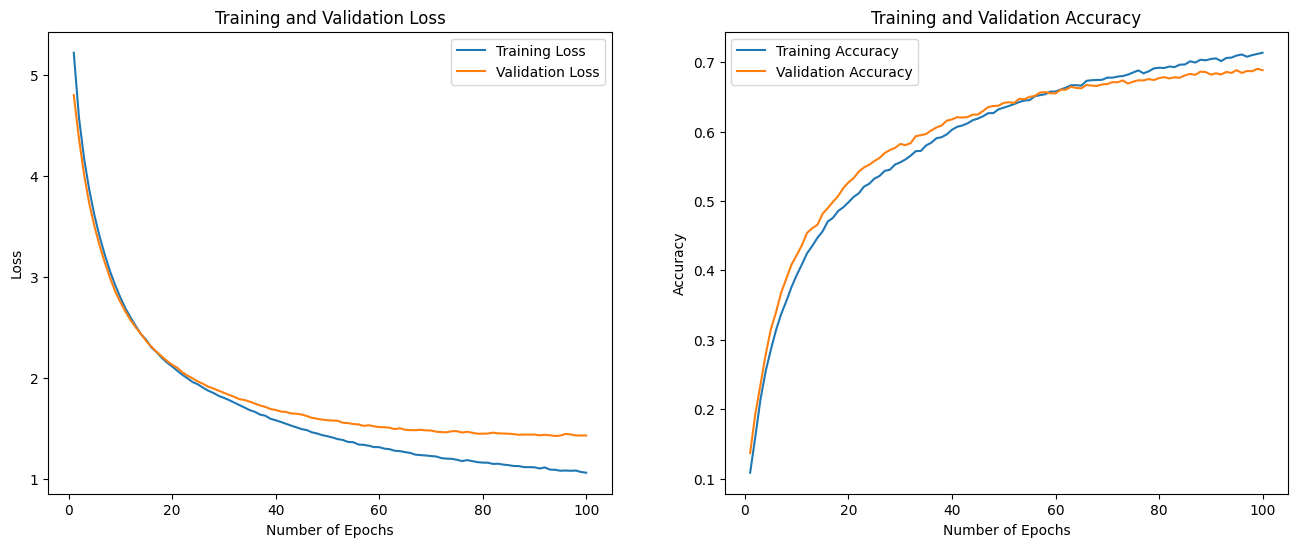

In [109]:
plot_learning_curve(Bi_LSTM_V4_history.history)

**Observations**
- The curve seems to converge quicker than usual, looks like this is quite a good model.

In [110]:
Bi_LSTM_V4.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.4263 - accuracy: 0.6929


[1.4263392686843872, 0.692873477935791]

**Observations**
- This model has a decently high test accuracy.

### Bi-Directional GRU
- Concept of Bi-Directional GRU is similar to Bi-Directional LSTM
- Hidden state also contains information from both directions

### Bi Directional GRU Version 1
- Bi Directional GRU layer of 256 units
- Dropout of 0.3

In [111]:
tf.keras.backend.clear_session()

# Create the model
Bi_GRU_V1 = Sequential(
    name='bi_directional_gru_v1',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        Bidirectional(GRU(256, activation='tanh')),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
Bi_GRU_V1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Bi_GRU_V1_history = Bi_GRU_V1.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 11s 8ms/step - loss: 4.6431 - accuracy: 0.1840 - val_loss: 3.7274 - val_accuracy: 0.2822
Epoch 2/100
1148/1148 [==============================] - 9s 8ms/step - loss: 3.1970 - accuracy: 0.3538 - val_loss: 2.8156 - val_accuracy: 0.4192
Epoch 3/100
1148/1148 [==============================] - 9s 8ms/step - loss: 2.4855 - accuracy: 0.4655 - val_loss: 2.3670 - val_accuracy: 0.4951
Epoch 4/100
1148/1148 [==============================] - 9s 8ms/step - loss: 2.0936 - accuracy: 0.5310 - val_loss: 2.0878 - val_accuracy: 0.5485
Epoch 5/100
1148/1148 [==============================] - 9s 8ms/step - loss: 1.8338 - accuracy: 0.5793 - val_loss: 1.8986 - val_accuracy: 0.5829
Epoch 6/100
1148/1148 [==============================] - 9s 8ms/step - loss: 1.6488 - accuracy: 0.6145 - val_loss: 1.7937 - val_accuracy: 0.6054
Epoch 7/100
1148/1148 [==============================] - 9s 8ms/step - loss: 1.5234 - accuracy: 0.6394 - val_loss: 1.6942 - val_a

In [112]:
Bi_GRU_V1.summary()

Model: "bi_directional_gru_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              411648    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1199)              615087    
                                                                 
Total params: 1,038,725
Trainable params: 1,038,725
Non-trainable params: 0
_________________________________________________________________


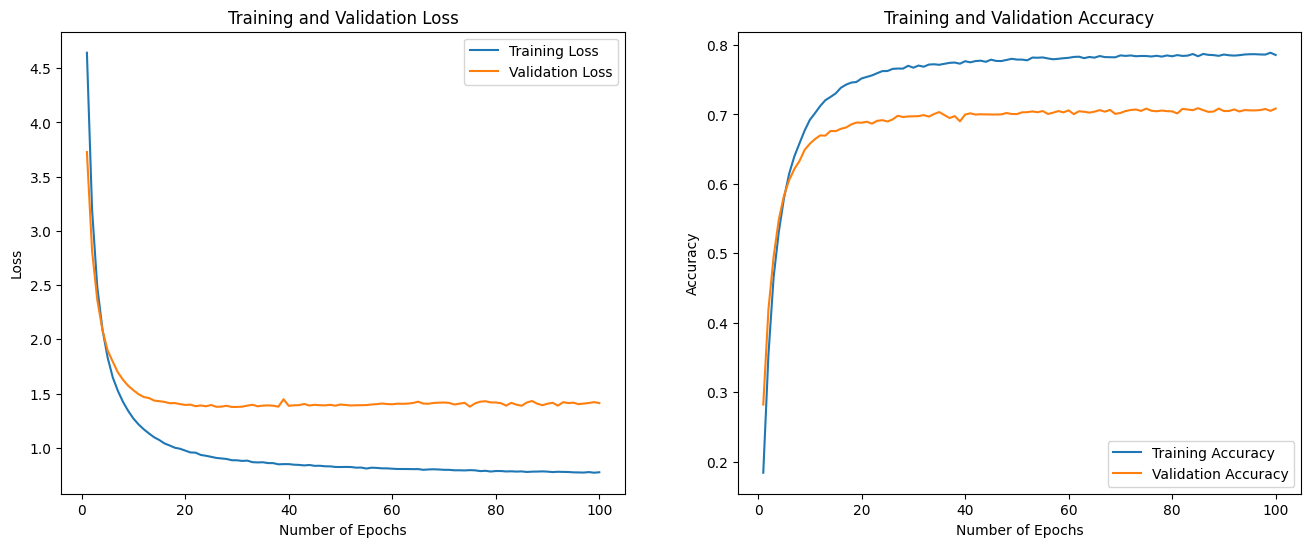

In [113]:
plot_learning_curve(Bi_GRU_V1_history.history)

**Observations**
- The model is unable to generalise the validation data to the training data hence training data is able to converge more efficiently compared to the validation curve.

In [114]:
Bi_GRU_V1.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.4115 - accuracy: 0.7068


[1.4115307331085205, 0.7067669034004211]

**Observations**
- The test accuracy of 0.70 is quite high for the data.

### Bi Directional GRU Version 2
- Bi Directional GRU layer of 128 units
- Dropout layer of 0.3

In [115]:
tf.keras.backend.clear_session()

# Create the model
Bi_GRU_V2 = Sequential(
    name='bi_directional_gru_v2',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        Bidirectional(GRU(128, activation='tanh')),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
Bi_GRU_V2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Bi_GRU_V2_history = Bi_GRU_V2.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 10s 7ms/step - loss: 4.8441 - accuracy: 0.1580 - val_loss: 3.9480 - val_accuracy: 0.2610
Epoch 2/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.4911 - accuracy: 0.3145 - val_loss: 3.1225 - val_accuracy: 0.3746
Epoch 3/100
1148/1148 [==============================] - 8s 7ms/step - loss: 2.8281 - accuracy: 0.4083 - val_loss: 2.6272 - val_accuracy: 0.4536
Epoch 4/100
1148/1148 [==============================] - 8s 7ms/step - loss: 2.4069 - accuracy: 0.4777 - val_loss: 2.3292 - val_accuracy: 0.5059
Epoch 5/100
1148/1148 [==============================] - 8s 7ms/step - loss: 2.1382 - accuracy: 0.5211 - val_loss: 2.1166 - val_accuracy: 0.5426
Epoch 6/100
1148/1148 [==============================] - 8s 7ms/step - loss: 1.9356 - accuracy: 0.5569 - val_loss: 1.9573 - val_accuracy: 0.5685
Epoch 7/100
1148/1148 [==============================] - 8s 7ms/step - loss: 1.7927 - accuracy: 0.5833 - val_loss: 1.8417 - val_a

In [116]:
Bi_GRU_V2.summary()

Model: "bi_directional_gru_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              107520    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 427,653
Trainable params: 427,653
Non-trainable params: 0
_________________________________________________________________


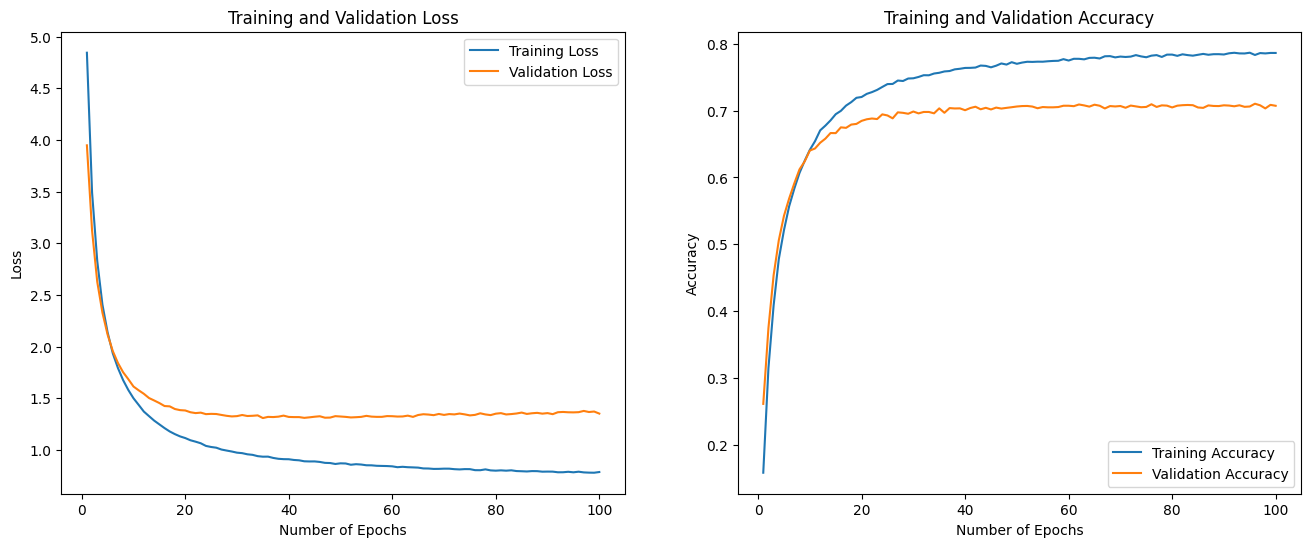

In [117]:
plot_learning_curve(Bi_GRU_V2_history.history)

**Observations**
- The model is unable to generalise the validation data to the training data hence training data is able to converge more efficiently compared to the validation curve.

In [118]:
Bi_GRU_V2.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.3552 - accuracy: 0.7052


[1.3552422523498535, 0.7052141427993774]

**Observations**
- The test accuracy is very high for this data.

### Bi Directional GRU Version 3
- Bi Directional GRU of 64 units
- Dropout of 0.3

In [119]:
tf.keras.backend.clear_session()

# Create the model
Bi_GRU_V3 = Sequential(
    name='bi_directional_gru_v3',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        Bidirectional(GRU(64, activation='tanh')),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
Bi_GRU_V3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Bi_GRU_V3_history = Bi_GRU_V3.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 10s 7ms/step - loss: 5.0111 - accuracy: 0.1341 - val_loss: 4.3091 - val_accuracy: 0.1993
Epoch 2/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.9752 - accuracy: 0.2404 - val_loss: 3.6872 - val_accuracy: 0.2828
Epoch 3/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.4695 - accuracy: 0.3056 - val_loss: 3.2907 - val_accuracy: 0.3401
Epoch 4/100
1148/1148 [==============================] - 8s 7ms/step - loss: 3.1317 - accuracy: 0.3509 - val_loss: 3.0031 - val_accuracy: 0.3831
Epoch 5/100
1148/1148 [==============================] - 8s 7ms/step - loss: 2.8664 - accuracy: 0.3903 - val_loss: 2.7726 - val_accuracy: 0.4142
Epoch 6/100
1148/1148 [==============================] - 8s 7ms/step - loss: 2.6523 - accuracy: 0.4236 - val_loss: 2.5870 - val_accuracy: 0.4495
Epoch 7/100
1148/1148 [==============================] - 8s 7ms/step - loss: 2.4736 - accuracy: 0.4555 - val_loss: 2.4332 - val_a

In [120]:
Bi_GRU_V3.summary()

Model: "bi_directional_gru_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              29184     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1199)              154671    
                                                                 
Total params: 195,845
Trainable params: 195,845
Non-trainable params: 0
_________________________________________________________________


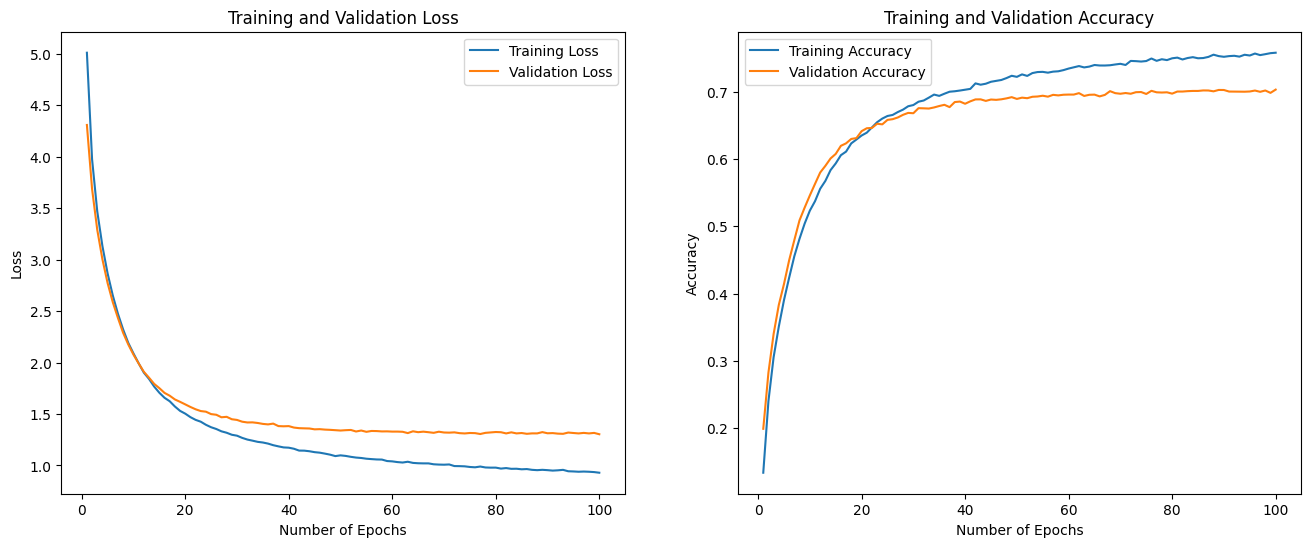

In [121]:
plot_learning_curve(Bi_GRU_V3_history.history)

**Observations**
- The loss curve and accuracy shows much better convergence than the previous models, but more improvement is needed.

In [122]:
Bi_GRU_V3.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.3052 - accuracy: 0.7028


[1.3051730394363403, 0.7027623653411865]

**Observations**
- The test accuracy is considered quite high for the data.

# Model Evaluation
- Predict the next 10 words to see how accurate the model predictions were.
- Use temperature to control the randomness of the generated output which also influences the diversity of the generated sequences.
  - Explore a spectrum from more deterministic (low temperatures) to more diverse and random (high temperatures) predictions

In [124]:
# Phrases used to start the prediction
seed_texts = ['embrace each day',
            'radiate some',
            'believe that',
            "life's actual purpose is",
            'dance through each and every',
            'let your time and energy',
            'every person is',
            'our country Singapore is',
            'planet earth is',
            'morning and evening would make it']

### Evaluation Metrics
**Corpus BLEU (Bilingual Evaluation Understudy) Score:**
  - Commonly used for evaluating the quality of machine-generated text
  - Measures how well a generated text aligns with one or more referenced texts, to serve as a quantitative measure of the similarity between the generated and reference texts.
  - Requires one or more reference texts to compare against the generated text
  - BLEU calculates precision for each n-gram and then combines them into a single score
  - Includes a brevity penalty to discourage overly short generated texts (i.e. generated texts that are significantly shorter than the reference texts)
  - Ranges from 0 to 1, with 1 indicating a perfect match between generated and referenced texts
  - Uses differents weight for each n-gram precision:
    - Decaying Weights - Use weights that decay as the n-gram length increase
    - e.g. (0.1, 0.2, 0.3, 0.4)
  
1. **Calculate Precision for each n-gram:**
   - $$ \text{{Precision}} = \frac{{\text{{Count of n-grams in model and reference}}}}{{\text{{Count of n-grams in model}}}} $$

2. **Calculate Brevity Penalty (BP):**
   - $$ \text{{BP}} = \begin{cases} 1 & \text{{if model length} $\geq$ \text{{reference length}}} \\ e^{(1 - \frac{{\text{{reference length}}}}{{\text{{model length}}}})} & \text{{otherwise}} \end{cases} $$

3. **Calculate BLEU Score:**
   - $$ \text{{BLEU}} = \text{{BP}} \cdot \exp\left(\frac{1}{4} \sum_{n=1}^{4} \log(\text{{Precision}}_n)\right) $$

**BERTScore (Bidirectional Encoder Representations from Transformers)**
  - Uses contextual embeddings to capture meaning of words in context to evaluate quality of generated texts
  - BERTScore combines traditional precision/recall based metrics with cosine similarity of word embeddings. Measures how well the candidate sentence capture meaning and context of reference sentence
  - BERTScore compares the entire sentences rather than focusing solely on word-level matches.
  
1. **Calculate Precision, Recall, and F1 for each token:**
   - Precision: $$ P = \frac{{\text{{model}} \cap \text{{reference}}}}{{\text{{model}}}} $$
   - Recall: $$ R = \frac{{\text{{model}} \cap \text{{reference}}}}{{\text{{reference}}}} $$
   - F1: $$ F1 = \frac{{2 \cdot P \cdot R}}{{P + R}} $$

2. **Calculate Weighted F1 for each token:**
   - $$ F1_w = \frac{{\sum_{i} \text{{F1}}_i \cdot \text{{weight}}_i}}{{\sum_{i} \text{{weight}}_i}} $$

3. **Calculate Overall BERTScore:**
   - $$ \text{{BERTScore}} = \frac{{\sum_{i} F1_w \cdot \text{{weight}}_i}}{{\sum_{i} \text{{weight}}_i}} $$

**Perplexity**
  - A measure of how well a probability distribution or probability model predicts a sample with the actual distribution of words in the test set.
  - Lower perplexity indicates better peformance.
$$ \text{Perplexity} = 2^{-\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i | w_{1}, w_{2}, ..., w_{i-1})} $$

- $N$: total number of words in the test set
- $P(w_i|w_1, w_2, ..., w_{i-1})$: conditional probability of the i-th word given the previous words in the sequence

### BLEU Score

In [267]:
# Add in reference text
reference = []

# Headers include phrases that the seed texts have existing in the dataset
referenceHeader = [
    "Embrace", "Radiate", "Believe in yourself", "Life's", "Dance through", "Let your",
    "Every", "Singapore" ,"Our planet", "This morning, let"
    ]

for quote in data["Quotes"].values:
    # Check if the quote in the dataset contains any of the mentioned headers
    if any(text in quote for text in referenceHeader):

        # Convert quote to lowercase except for Singapore
        if "Singapore" not in quote:
            quote = quote.lower()
        # Remove any punctuations from the quotes
        reference.append(re.sub('[,;.]','', quote).split(' '))

references =[reference]

In [495]:
# Evaluate the BLEU score
def evaluate_bleu_score(text):
    candidate = ["".join([text]).split(" ")]
    score = corpus_bleu(references, candidate, weights=(0.1, 0.2, 0.3, 0.4), smoothing_function=SmoothingFunction().method1)
    print(f"BLEU Score: {score:.4f}")
    return score

### BERTScore

In [269]:
# Add in reference text
reference2 = []

# Headers include phrases that the seed texts have existing in the dataset
referenceHeader = [
    "Embrace", "Radiate", "Believe in yourself", "Life's", "Dance through", "Let your",
    "Every", "Singapore" ,"Our planet", "This morning, let"
    ]

for quote in data["Quotes"].values:
    # Check if the quote in the dataset contains any of the mentioned headers
    if any(text in quote for text in referenceHeader):

        # Convert quote to lowercase except for Singapore
        if "Singapore" not in quote:
            quote = quote.lower()
        # Remove any punctuations from the quotes
        reference2.append(re.sub('[,;.]','', quote))

references2 =[reference2]

In [270]:
# Evaluate BERTScore
def evaluate_bert_score(text):
    candidate = ["".join([text])]
    
    # Calculate BERT score
    precision, recall, f1 = score(candidate, references2, lang="en", verbose=False)

    print(f"Precision: {precision.mean().item():.4f}")
    print(f"Recall: {recall.mean().item():.4f}")
    print(f"F1 Score: {f1.mean().item():.4f}")
    # Return the mean of the scores
    return precision.mean().item(), recall.mean().item(), f1.mean().item()

### Perplexity

In [474]:
# Calculate perplexity
def calculate_perplexity(loss, num_words):
    
    perplexity = 2**(-loss/num_words)
    print(f"Perplexity: {perplexity:.4f}")
    return perplexity

### Prediction Time
- Use BLEU scores to determine which models are the better ones to use for model improvement.

In [496]:
# Temperature is used to control the randomness of the prediction
# The higher the temperature, the more random the prediction
def predict_next_words(input_text, model, temperature, num_words=1):
    log_likelihood = 0.0
    for _ in range(num_words):
        tokens = tokenizer.texts_to_sequences([input_text])[0]
        tokens = pad_sequences([tokens], maxlen=max_sequence_rolling_len, padding='pre')
        predicted_prob = model.predict(tokens, verbose=0)[0]
        prediction = np.log(predicted_prob) / temperature
        exp_preds = np.exp(prediction)
        predicted_probs = exp_preds / np.sum(exp_preds)
        chosen_word_index = np.random.choice(range(len(predicted_probs)), p=predicted_probs)
        predicted_word = tokenizer.index_word[chosen_word_index]
        input_text += " " + predicted_word
        log_likelihood += np.log2(predicted_prob[chosen_word_index])
    return input_text, log_likelihood

### Perplexity and BLEU Score

In [497]:
#Function to plot a graph to consolidate BLEU scores and perplexity
def calc_bleu_and_perplexity(model_name ,model, seed_texts, temperature, num_word=10):
    
    bleu_scores = []
    perplexity_scores = []
    for seed_text in seed_texts:
        prediction, loss = predict_next_words(seed_text, model, temperature, num_word)
        print(''.join(prediction))
        bleu_score = evaluate_bleu_score(prediction)
        perplexity = calculate_perplexity(loss, len(prediction.split(' ')))
        print()
        bleu_scores.append(bleu_score)
        perplexity_scores.append(perplexity)

    # Plot a bar graph to show the BLEU scores
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)
    
    # Plot BLEU scores
    ax1.bar(range(1, len(bleu_scores)+1), bleu_scores, color='blue', alpha=0.7)
    ax1.set_title(f'BLEU Scores: {model_name}')
    ax1.set_ylabel("BLEU Score", color="blue")
    ax1.axhline(y=0.5, color='r', linestyle='-')
    
    # Plot perplexity scores
    ax2.bar(range(1, len(perplexity_scores)+1), perplexity_scores, color='green', alpha=0.7)
    ax2.set_title(f'Perplexity Scores: {model_name}')
    ax2.set_ylabel("Perplexity", color="green")
    ax2.axhline(y=1.5, color='grey', linestyle='--')
    
    plt.tight_layout()
    plt.show()

embrace each day is a precious gift to true beauty of our planet
BLEU Score: 0.1055
Perplexity: 1.8448

radiate some strength and let it be the compass that guides you
BLEU Score: 0.7573
Perplexity: 1.5710

believe that powers your journey a tale worth telling with warmth and
BLEU Score: 0.5820
Perplexity: 1.5738

life's actual purpose is a testament to the goodness in your soul filling it
BLEU Score: 0.5965
Perplexity: 1.3119

dance through each and every will be a force that drives you forward is a
BLEU Score: 0.4545
Perplexity: 1.7440

let your time and energy through the canvas of your journey a tale worth telling
BLEU Score: 0.6125
Perplexity: 1.3063

every person is a celebration of our planet offers the promise of blossoming
BLEU Score: 0.3883
Perplexity: 2.1174

our country Singapore is a testament to the beauty of our planet's breath is
BLEU Score: 0.5723
Perplexity: 1.6722

planet earth is a wonder of the beauty of our uniqueness and the
BLEU Score: 0.4135
Perplexity: 1.9249


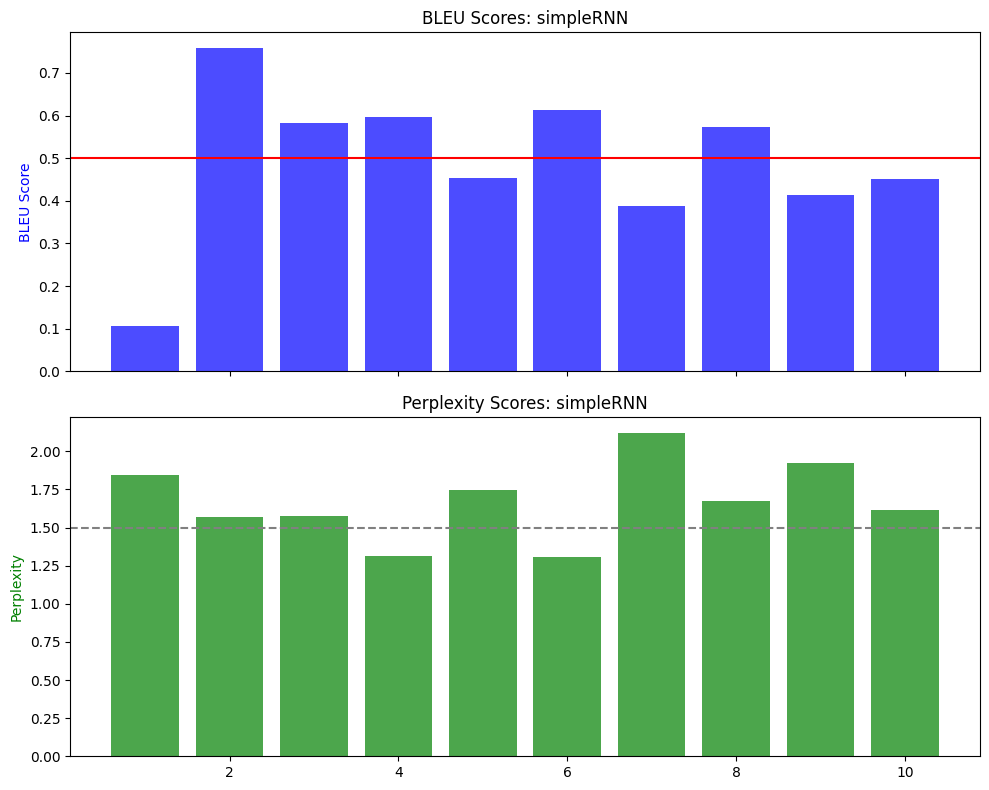

In [522]:
calc_bleu_and_perplexity("simpleRNN", simpleRNN, seed_texts, 0.4) 

**Observations**
- The simpleRNN V1 is not performing that well as many of the phrases BLEU score go below 0.5.
- BLEU Score of Quotes 2 and 9 is quite high, implying that those are quite coherent phrases.
- Quotes 4 and 6 has lower perplexity which shows that the model is more confident in its predictions and better at assigning the high probabilities to the actual words in the sequence.

embrace each day with a heart full of gratitude for it is the
BLEU Score: 0.8735
Perplexity: 1.3612

radiate some authenticity for it is the essence of true beauty and
BLEU Score: 0.7276
Perplexity: 1.8191

believe that propels you forward is a gift to the soul of
BLEU Score: 0.7253
Perplexity: 1.1579

life's actual purpose is the heartbeat of a joyful heart welcome the opportunities that
BLEU Score: 0.4329
Perplexity: 1.3372

dance through each and every moment is a chance for adventure is created by the
BLEU Score: 0.5906
Perplexity: 1.5402

let your time and energy to change and hope and delectable that brightens someone's path
BLEU Score: 0.1932
Perplexity: 2.0117

every person is the universe of experiences and emotions for they hold the
BLEU Score: 0.5062
Perplexity: 1.7247

our country Singapore is reality and love that reside within you to your passions
BLEU Score: 0.3354
Perplexity: 1.7224

planet earth is a sanctuary of serenity within you is a sanctuary of
BLEU Score: 0.4212

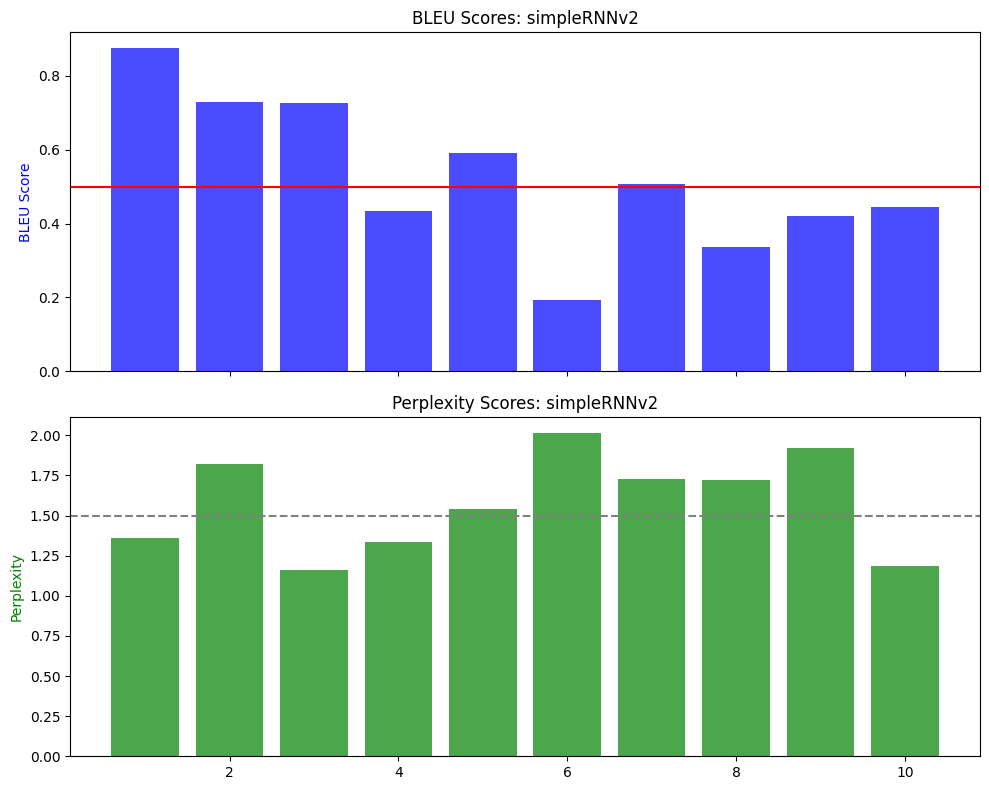

In [499]:
calc_bleu_and_perplexity("simpleRNNv2", simpleRNNv2, seed_texts, 0.4) 

**Observations**
- Quotes 1 to 3 BLEU Score is quite high for this model.
- Quite a few number of quotes have high perplexity, even reaching values of 2.

embrace each day is a canvas for new beginnings reminding us of the
BLEU Score: 0.4824
Perplexity: 1.2750

radiate some grace and let it be the foundation of your strength
BLEU Score: 0.8055
Perplexity: 1.5193

believe that propels you forward is a victory on the path to
BLEU Score: 0.7802
Perplexity: 1.4699

life's actual purpose is the music of the soul a release from the chains
BLEU Score: 0.7607
Perplexity: 1.3377

dance through each and every fresh opportunities to shine for it is the key to
BLEU Score: 0.5100
Perplexity: 1.3587

let your time and energy of happiness and contentment reside within you moments of joy
BLEU Score: 0.2598
Perplexity: 1.7443

every person is a symbol of your soul and growth and wisdom that
BLEU Score: 0.2834
Perplexity: 2.1598

our country Singapore is a gateway to a brighter future in the realization of
BLEU Score: 0.7607
Perplexity: 1.5304

planet earth is a step towards the tranquility of the heart a serene
BLEU Score: 0.8303
Perplexity: 1.3725

morn

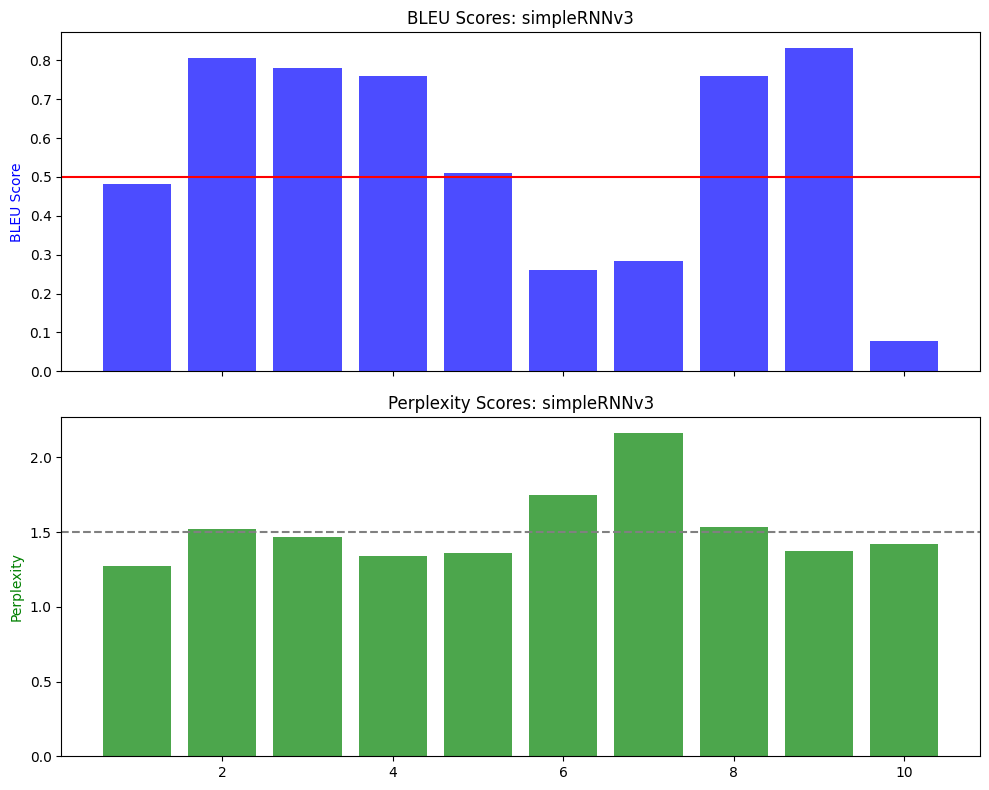

In [500]:
calc_bleu_and_perplexity("simpleRNNv3", simpleRNNv3, seed_texts, 0.4) 

**Observations**
- This model has a quite a high amount of quotes with high BLEU scores which indicates a good level of agreement between the predicted text and the reference text.
- It also has more quotes with perplexity close to or lower values than 1.5 which is the threshold I had set for low perplexity level.

embrace each day with a heart full of gratitude and the seeds of
BLEU Score: 0.6769
Perplexity: 1.4634

radiate some confidence and let it be the wind in your sails
BLEU Score: 0.8055
Perplexity: 1.3113

believe that yourself for you have the potential to make a difference
BLEU Score: 0.8125
Perplexity: 1.3783

life's actual purpose is the heartbeat of a joyful heart for it turns ordinary
BLEU Score: 0.6544
Perplexity: 1.1565

dance through each and every we transform with life and the gentle goodbyes of this
BLEU Score: 0.2985
Perplexity: 1.4207

let your time and energy are the moments that take our breath away the beauty
BLEU Score: 0.4777
Perplexity: 1.3515

every person is a reflection of the beauty in our diversity and dreams
BLEU Score: 0.6863
Perplexity: 1.0948

our country Singapore is a testament to the beauty of our uniqueness and let
BLEU Score: 0.6156
Perplexity: 1.1281

planet earth is a tapestry of unity and joy will follow the world
BLEU Score: 0.3915
Perplexity: 1.4722

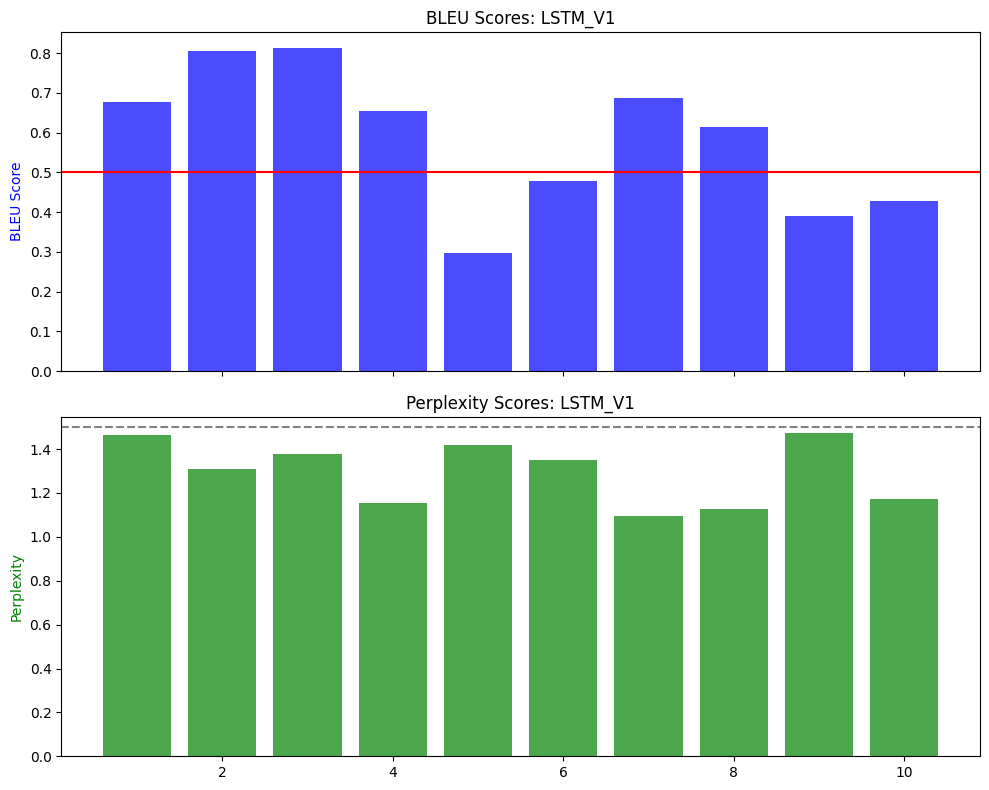

In [523]:
calc_bleu_and_perplexity("LSTM_V1", LSTM_V1, seed_texts, 0.4) 

**Observations**
- There are quite a few quotes that have lower BLEU score than the suggested threshold of 0.5, showing that there is not so much of a good agreement between the predicted text and the referenced text.
- Perplexity for all the quotes for this model are all below the threshold value of 1.5 which suggest better performance

embrace each day is a precious gift a gift a reminder that you
BLEU Score: 0.4223
Perplexity: 1.5902

radiate some enthusiasm and let it be the foundation of your strength
BLEU Score: 0.8055
Perplexity: 1.7878

believe that heals and unites and resentment a path towards healing and
BLEU Score: 0.6823
Perplexity: 1.5829

life's actual purpose is a testament to the beauty of our uniqueness and growth
BLEU Score: 0.6156
Perplexity: 1.3850

dance through each and every opportunities to shine for they hold the keys to your
BLEU Score: 0.5100
Perplexity: 1.2736

let your time and energy it is the music of a joyful heart for it
BLEU Score: 0.5538
Perplexity: 1.4680

every person is a testament to the beauty of the human spirit a
BLEU Score: 0.7744
Perplexity: 1.3263

our country Singapore is the heartbeat of our planet and let it be the
BLEU Score: 0.5235
Perplexity: 1.6284

planet earth is a classroom where we learn to love and forgive and
BLEU Score: 0.7440
Perplexity: 1.5427

morning and e

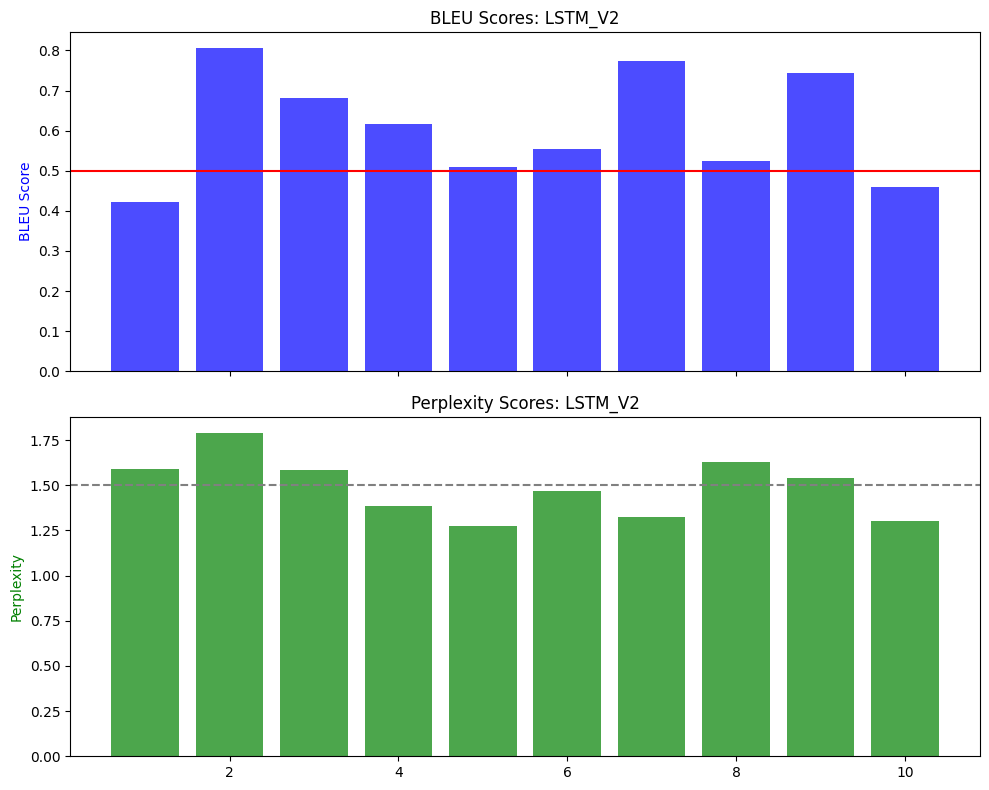

In [527]:
calc_bleu_and_perplexity("LSTM_V2", LSTM_V2, seed_texts, 0.2) 

**Observations**
- With the exception of Quote 1 & 10, the BLEU score of the phrases generally perform quite well.
- Perplexity is also showing the values are close to 1.5, indicating that the model is relatively confident in its predictions.

embrace each day with a dreams are the thresholds of life's transition from
BLEU Score: 0.6381
Perplexity: 1.3360

radiate some resilience and let it be the cornerstone of your character
BLEU Score: 0.8055
Perplexity: 1.6781

believe that every day is a gift of this morning hear the
BLEU Score: 0.2541
Perplexity: 1.4962

life's actual purpose is a step towards miracles a path that success hope and
BLEU Score: 0.2837
Perplexity: 1.7105

dance through each and every beautiful chaos park's charm singapore's nature is a treasure trove
BLEU Score: 0.2943
Perplexity: 1.0954

let your time and energy and kindness and reality of the world of your heart
BLEU Score: 0.0786
Perplexity: 1.3635

every person is a treasure trove the power of the heart a serene
BLEU Score: 0.6381
Perplexity: 1.2642

our country Singapore is the music that fills the air with joy and lightheartedness
BLEU Score: 0.7607
Perplexity: 1.1233

planet earth is a reminder of the beauty in our diversity and dreams
BLEU Score: 

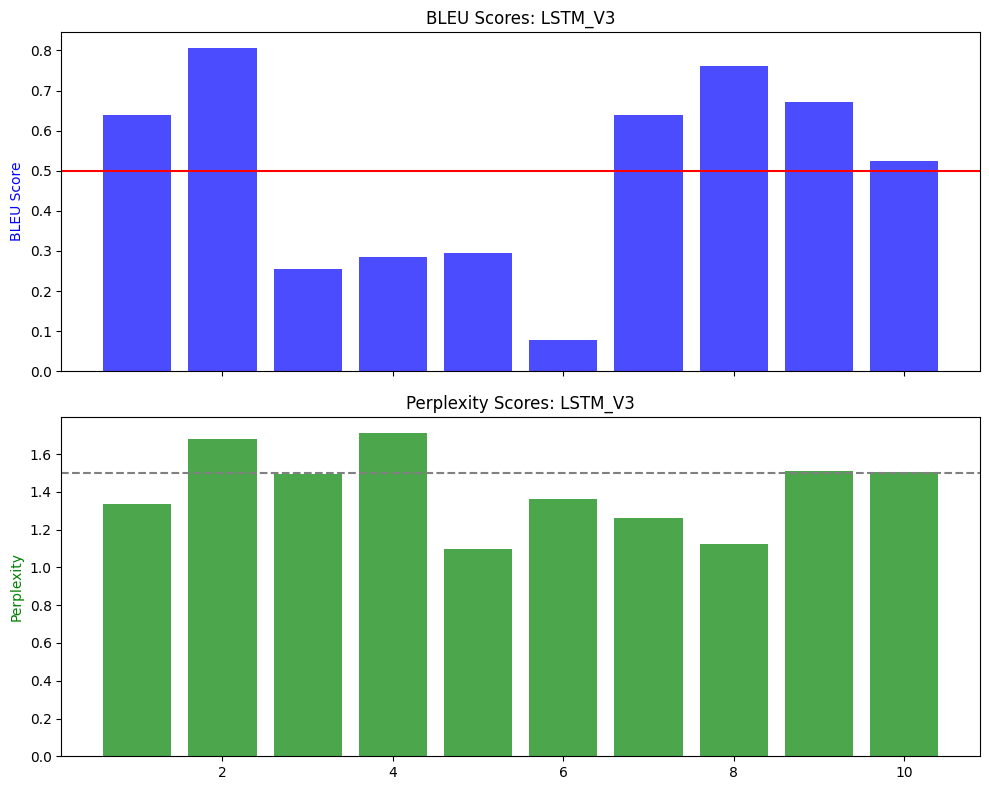

In [528]:
calc_bleu_and_perplexity("LSTM_V3", LSTM_V3, seed_texts, 0.4) 

**Observations**
- Generally, the BLEU score are quite high for 6/10 of the quotes.
- Perplexity are also generally close to 1.5.

embrace each day we take flight of kindness and joy that reside for
BLEU Score: 0.0876
Perplexity: 2.0410

radiate some nature and let your heart be the conductor of your
BLEU Score: 0.7106
Perplexity: 2.0889

believe that reverberates in the heart spreading warmth and happiness far and
BLEU Score: 0.9068
Perplexity: 1.0578

life's actual purpose is a celebration of the journey we've traveled and inner peace
BLEU Score: 0.5723
Perplexity: 1.6819

dance through each and every beautiful charm a fresh start and new beginnings reminding us
BLEU Score: 0.0679
Perplexity: 1.5588

let your time and energy and joy and create a beacon of hope for our
BLEU Score: 0.4031
Perplexity: 1.5650

every person is a reminder of the earth's life giving embrace this morning
BLEU Score: 0.4095
Perplexity: 1.3336

our country Singapore is the foundation of your potential and resilience a life well
BLEU Score: 0.3558
Perplexity: 1.8105

planet earth is the driving force behind a fulfilled life and aspirations

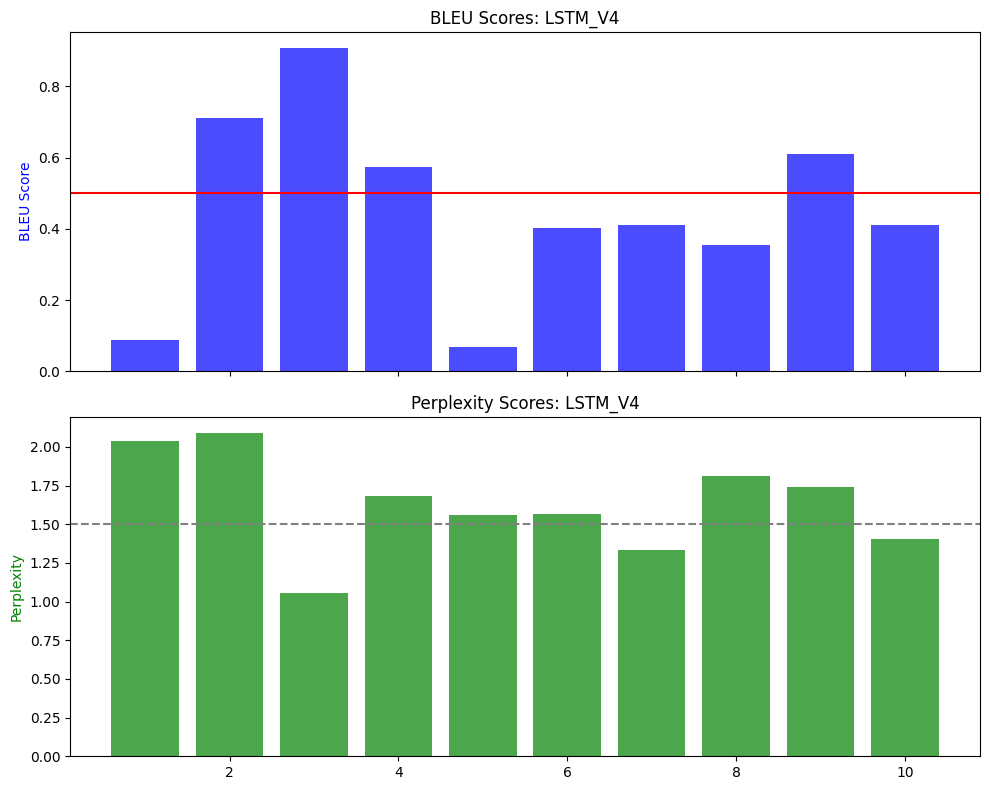

In [504]:
calc_bleu_and_perplexity("LSTM_V4", LSTM_V4, seed_texts, 0.6) 

**Observations**
- The BLEU score of this model predicted words are not as good as the previous one, more quotes had lower BLEU scores than quotes with higher BLEU score.
- Perplexity is also not as close to 1.5 as it was before, it even attain a value of 2 for some of the quotes.

embrace each day is a canvas for new beginnings reminding us of the
BLEU Score: 0.4824
Perplexity: 1.0752

radiate some peace and let it be the sanctuary within your heart
BLEU Score: 0.8055
Perplexity: 1.4308

believe that brightens the world around you go the canvas of your
BLEU Score: 0.5959
Perplexity: 1.5195

life's actual purpose is the music of a joyful heart and soul and resilience
BLEU Score: 0.5104
Perplexity: 1.5103

dance through each and every day is a precious gift a reminder of the marvel
BLEU Score: 0.5189
Perplexity: 1.2529

let your time and energy it can light up even the darkest days and let
BLEU Score: 0.5187
Perplexity: 1.4620

every person is the wisdom that resides within you free from the weight
BLEU Score: 0.4702
Perplexity: 1.7480

our country Singapore is its legacy of love and compassion you leave behind your
BLEU Score: 0.5465
Perplexity: 1.3640

planet earth is a reminder of the preciousness of life and joy in
BLEU Score: 0.6381
Perplexity: 1.2973

mornin

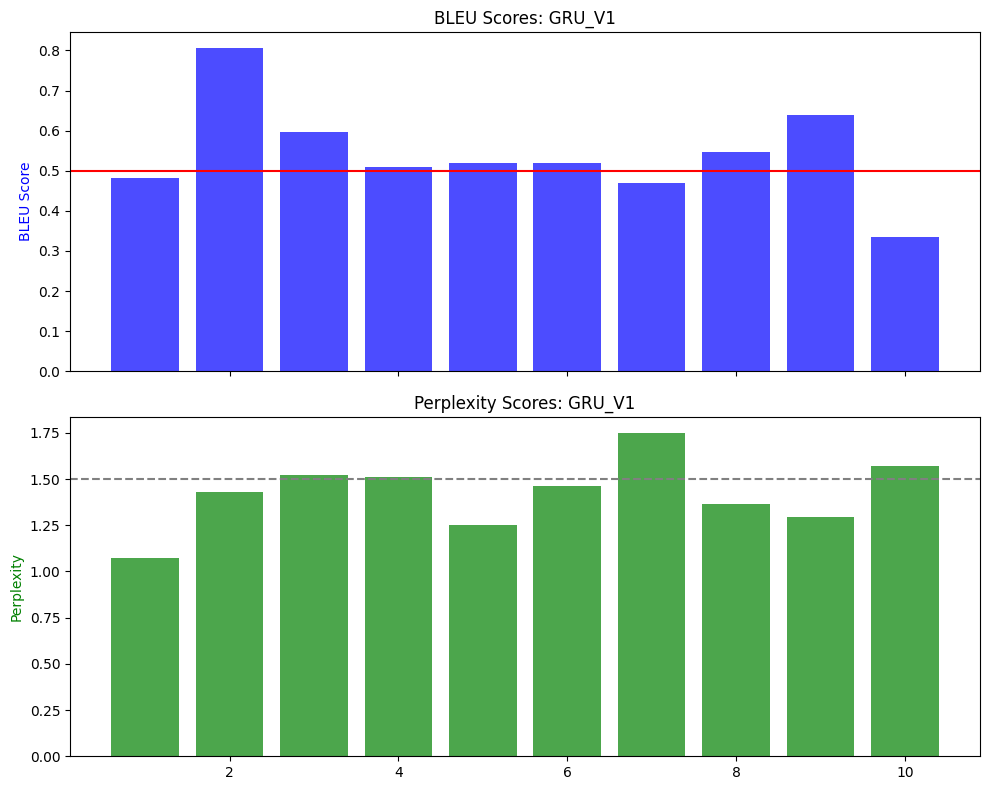

In [533]:
calc_bleu_and_perplexity("GRU_V1", GRU_V1, seed_texts, 0.3) 

**Observations**
- All the quotes BLEU score almost hit 0.5 but are still not high enough.
- The perplexity of the quotes are also quite close to 1.5, showing that the model is quite confident in its predictions and better at assigning high probabilities to the actual words in the sequence.

embrace each day with a heart full of gratitude for it is the
BLEU Score: 0.8735
Perplexity: 1.1224

radiate some gratitude for it is the heartbeat of a joyful heart
BLEU Score: 0.8055
Perplexity: 1.4275

believe that yourself and you will be a source of light for
BLEU Score: 0.8125
Perplexity: 1.2205

life's actual purpose is the pursuit of our passions and dreams and aspirations and
BLEU Score: 0.5845
Perplexity: 1.0996

dance through each and every inspire is a testament to the beauty of our uniqueness
BLEU Score: 0.6125
Perplexity: 1.1297

let your time and energy will follow and become a beacon of light in the
BLEU Score: 0.5114
Perplexity: 1.3926

every person is the jewels set in the crown of the sea of
BLEU Score: 0.7281
Perplexity: 1.1199

our country Singapore is a testament to the nation's resilience and unwavering determination and
BLEU Score: 0.6961
Perplexity: 1.1576

planet earth is a testament to your inner strength and resilience that resonates
BLEU Score: 0.5714
Perpl

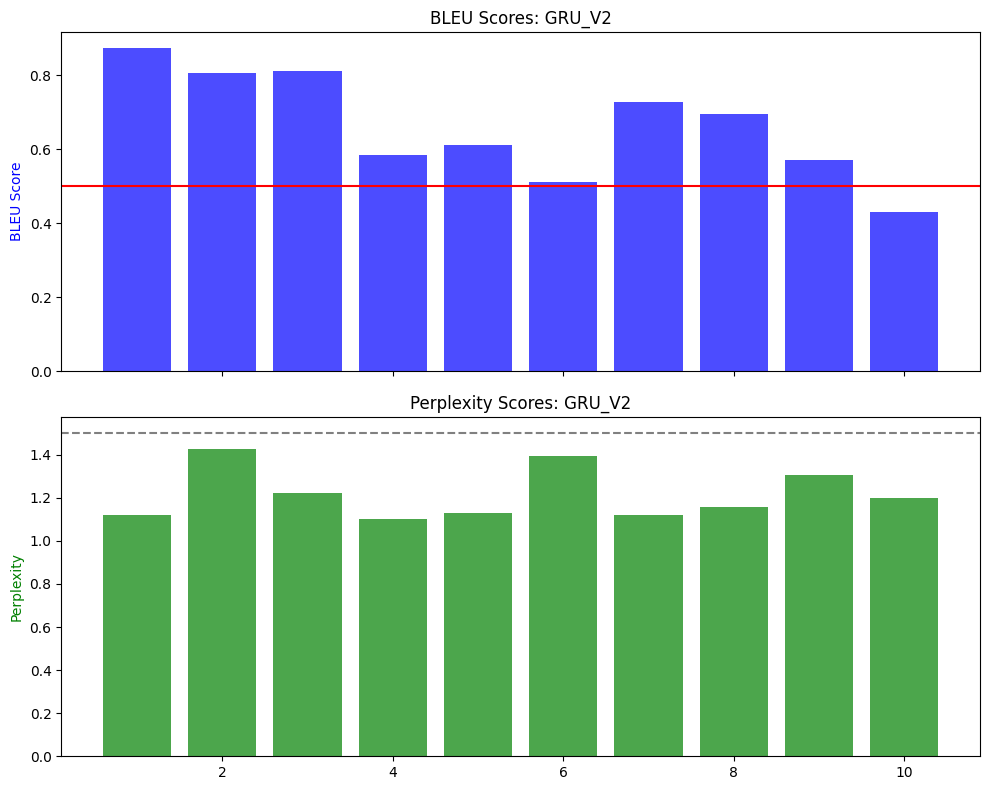

In [534]:
calc_bleu_and_perplexity("GRU_V2", GRU_V2, seed_texts, 0.1) 

**Observations**
- Based on the BLEU score of all the quotes, only the last quote has slightly lower BLEU score and the sentence is not exactly coherent.
- All the quotes of this model has a low perplexity, all below 1.5.

embrace each day is a canvas for new beginnings reminding us of the
BLEU Score: 0.4824
Perplexity: 1.1786

radiate some kindness and become a beacon of light in the world
BLEU Score: 0.8055
Perplexity: 1.5946

believe that every day is a gift a reminder of the marvel
BLEU Score: 0.7639
Perplexity: 1.3592

life's actual purpose is a liberation of the soul and heal and transform to
BLEU Score: 0.5235
Perplexity: 1.5351

dance through each and every step towards the universe a reminder of the marvel the
BLEU Score: 0.5906
Perplexity: 1.4934

let your time and energy of growth for they remind you of the brilliance of
BLEU Score: 0.6243
Perplexity: 1.4270

every person is a canvas for new beginnings reminding us of the preciousness
BLEU Score: 0.4824
Perplexity: 1.5081

our country Singapore is a testament to the beauty of our planet holds the
BLEU Score: 0.5723
Perplexity: 1.5790

planet earth is a wonder for the canvas of your journey a tale
BLEU Score: 0.4863
Perplexity: 1.6381

morning 

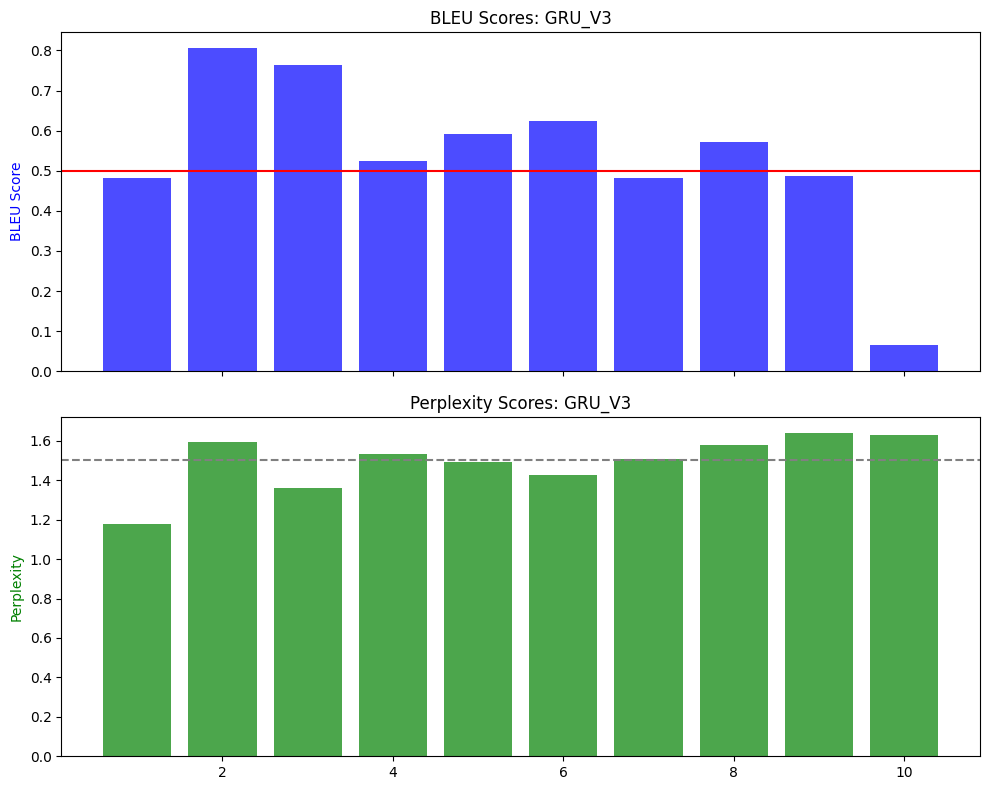

In [507]:
calc_bleu_and_perplexity("GRU_V3", GRU_V3, seed_texts, 0.1) 

**Observations**
- BLEU score is relative quite good except the last quote.
- Perplexity score is also quite close to 1.5 for all the quotes.

embrace each day is a canvas for new beginnings and fresh beautiful self
BLEU Score: 0.5836
Perplexity: 1.5638

radiate some grace and let it be the cornerstone of your character
BLEU Score: 0.8055
Perplexity: 1.4449

believe that morning brings your way is a precious gift a gift
BLEU Score: 0.0734
Perplexity: 1.7648

life's actual purpose is a classroom where we learn to love and let go
BLEU Score: 0.7607
Perplexity: 1.1095

dance through each and every soul from the universe of experiences and soul a reminder
BLEU Score: 0.2459
Perplexity: 1.7020

let your time and energy is a treasure in the chest of memories a testament
BLEU Score: 0.5576
Perplexity: 1.2441

every person is a step towards a joyful heart is a canvas of
BLEU Score: 0.5456
Perplexity: 1.4923

our country Singapore is the treasure chest of experience experience and experience and experience
BLEU Score: 0.3543
Perplexity: 1.3887

planet earth is an investment in your future of your story and your
BLEU Score: 0.5572
Perp

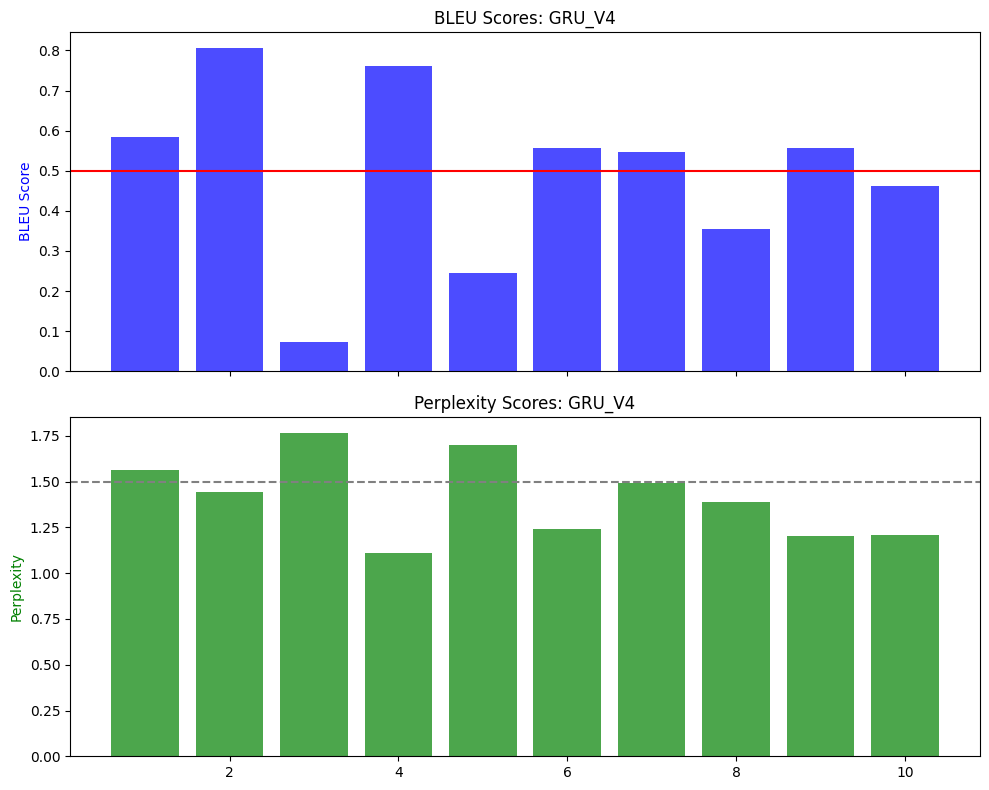

In [508]:
calc_bleu_and_perplexity("GRU_V4", GRU_V4, seed_texts, 0.1) 

**Observations**
- This model however did not attain good BLEU values as the other GRU models.
- Perplexity values more or less the same as the other models though.

embrace each day is a precious gift that protect our hearts and destined
BLEU Score: 0.0744
Perplexity: 1.5317

radiate some peace and create a haven of serenity around you of
BLEU Score: 0.7276
Perplexity: 1.3767

believe that every day is a precious gift of our dreams and
BLEU Score: 0.3999
Perplexity: 1.5115

life's actual purpose is the pursuit of our heart's deepest desires is a canvas
BLEU Score: 0.5723
Perplexity: 1.2799

dance through each and every moment into a gift that brightens someone's day leaving a
BLEU Score: 0.6792
Perplexity: 1.2751

let your time and energy it can turn dreams into reality and becoming a vibrant
BLEU Score: 0.4031
Perplexity: 1.2149

every person is the heart of a truly beautiful soul for they are
BLEU Score: 0.3998
Perplexity: 1.2496

our country Singapore is a treasure trove in the moment of a well lived
BLEU Score: 0.1872
Perplexity: 1.4106

planet earth is a reminder of the preciousness of life and let your
BLEU Score: 0.7872
Perplexity: 1.2156



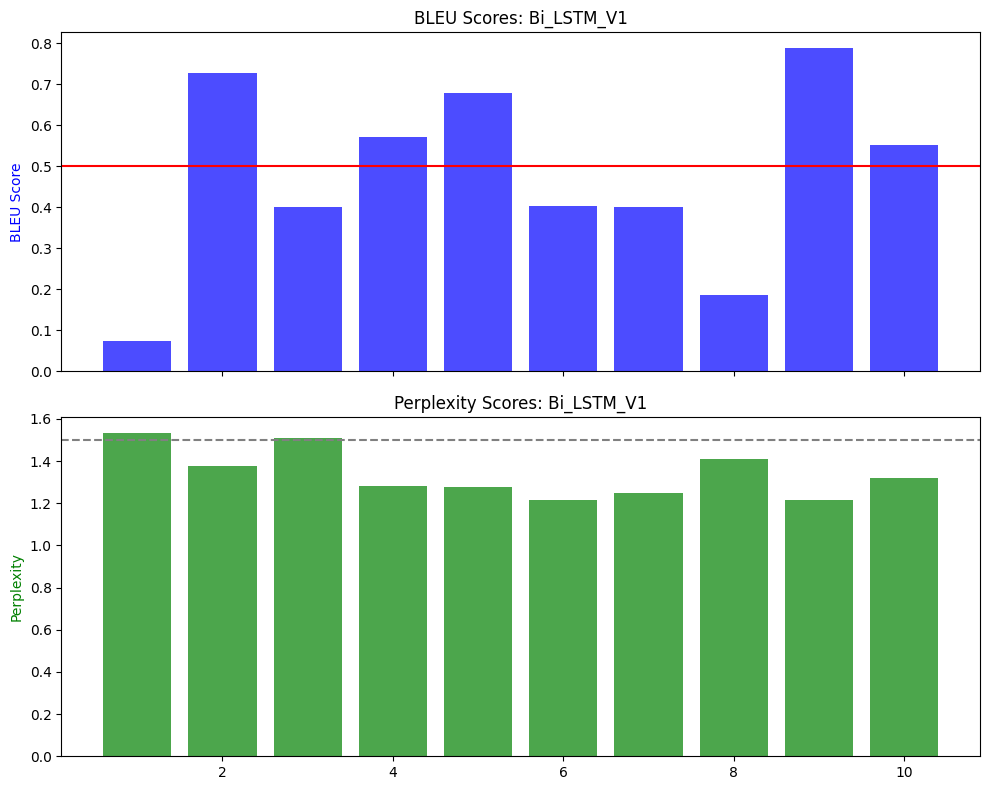

In [509]:
calc_bleu_and_perplexity("Bi_LSTM_V1", Bi_LSTM_V1, seed_texts, 0.1) 

**Observations**
- Predictions are not that coherent, BLEU scores are not that high.
- Perplexity is extremely low though, model is quite confident at predicting.

embrace each day with a heart full of gratitude for it will lift
BLEU Score: 0.8735
Perplexity: 1.0704

radiate some compassion for it is the heartbeat of humanity we find
BLEU Score: 0.6142
Perplexity: 1.5571

believe that brightens any obstacle that comes your way of your soul
BLEU Score: 0.4911
Perplexity: 1.4967

life's actual purpose is the music of a heart at peace in our planet's
BLEU Score: 0.5581
Perplexity: 1.2983

dance through each and every heart you to the horizon of our planet a testament
BLEU Score: 0.1054
Perplexity: 1.4202

let your time and energy to chase your dreams and aspirations and world transform in
BLEU Score: 0.0572
Perplexity: 1.1364

every person is the canvas of your destiny each decision shaping the masterpiece
BLEU Score: 0.7744
Perplexity: 1.0852

our country Singapore is an opportunity for growth and learning for be the beacon
BLEU Score: 0.4998
Perplexity: 1.3218

planet earth is a liberation of the soul from bitterness and lightheartedness in
BLEU S

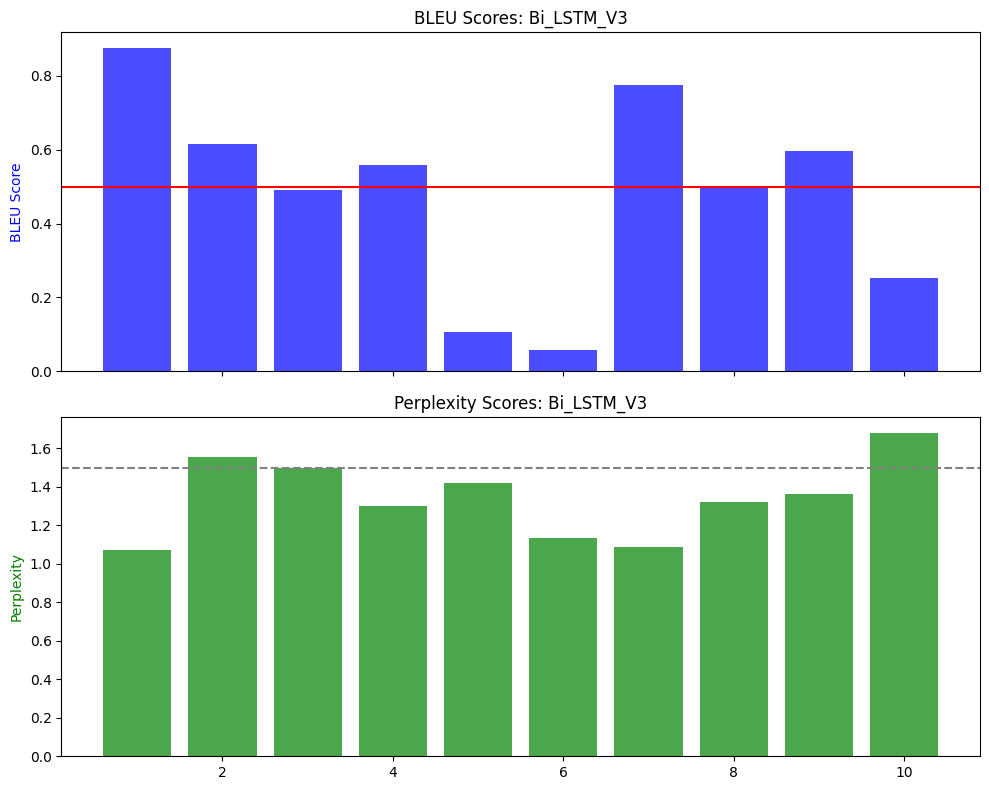

In [510]:
calc_bleu_and_perplexity("Bi_LSTM_V3", Bi_LSTM_V3, seed_texts, 0.3) 

**Observations**
- Predictions are not very coherent, Quotes 5 and 6 also have a very low BLEU score.
- Perplexity is relatively low though.

embrace each day with a heart full of gratitude and determination shape destinies
BLEU Score: 0.7543
Perplexity: 1.6876

radiate some grace and let it be the fortress of your soul
BLEU Score: 0.8055
Perplexity: 1.8912

believe that reverberates in the heart spreading warmth and happiness far and
BLEU Score: 0.9068
Perplexity: 1.1312

life's actual purpose is the symphony of life and let your heart be the
BLEU Score: 0.7607
Perplexity: 1.4338

dance through each and every step we take towards our dreams and aspirations and the
BLEU Score: 0.5906
Perplexity: 1.5995

let your time and energy and let it be the foundation of your greatness of
BLEU Score: 0.5722
Perplexity: 1.5539

every person is a gesture of hope for the future of our planet
BLEU Score: 0.8463
Perplexity: 1.5053

our country Singapore is an investment in a brighter future in the realization of
BLEU Score: 0.7607
Perplexity: 1.2228

planet earth is the light of experience they hold the promise of a
BLEU Score: 0.3915
Perple

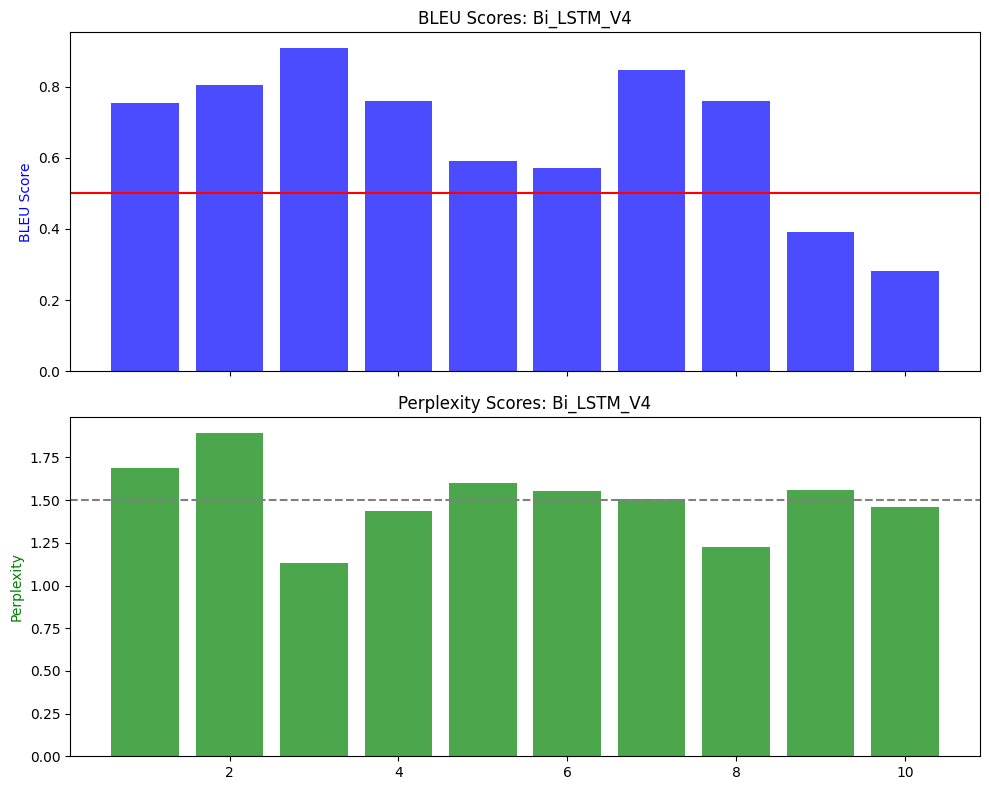

In [511]:
calc_bleu_and_perplexity("Bi_LSTM_V4", Bi_LSTM_V4, seed_texts, 0.3) 

**Observations**
- BLEU score for this model is quite good, only exception are quotes 9 and 10.
- Quotes predicted are not that coherent though.
- Perplextity value for Quote 2 is also relatively higher than usual.

embrace each day with a heart full of gratitude and watch how it
BLEU Score: 0.8735
Perplexity: 1.0841

radiate some peace and let it be the sanctuary within your heart
BLEU Score: 0.8055
Perplexity: 1.2799

believe that yourself and you will find the way to success and
BLEU Score: 0.7169
Perplexity: 1.4681

life's actual purpose is reflected in the eyes of those we love and forgive
BLEU Score: 0.6544
Perplexity: 1.3148

dance through each and every heritage singapore's nature is a treasure trove the gentle goodbyes
BLEU Score: 0.3256
Perplexity: 1.2817

let your time and energy to the world of life's refreshment and renewal a reminder
BLEU Score: 0.3139
Perplexity: 1.4531

every person is its own song in your future of our planet and
BLEU Score: 0.2775
Perplexity: 1.4622

our country Singapore is ruggedness for the is the heartbeat of a grateful heart
BLEU Score: 0.4500
Perplexity: 1.6063

planet earth is a canvas for new beginnings reminding us of the preciousness
BLEU Score: 0.4712


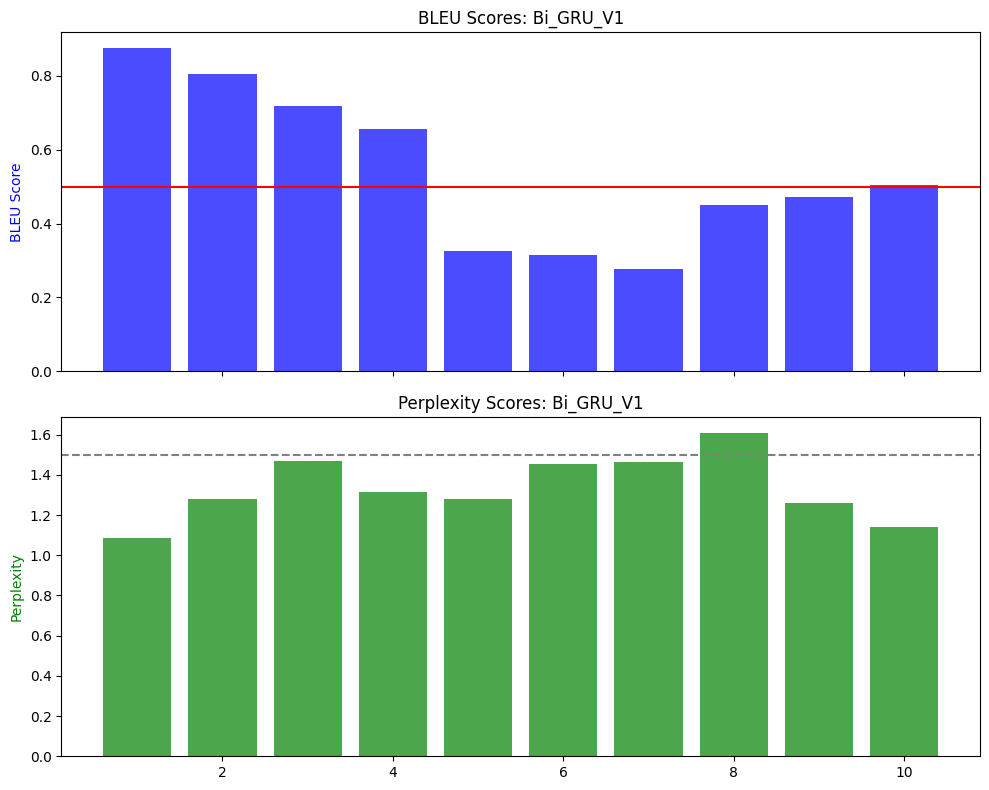

In [512]:
calc_bleu_and_perplexity("Bi_GRU_V1", Bi_GRU_V1, seed_texts, 0.1) 

**Observations**
- BLEU score are not attaining a very good score and not all the quotes are very coherent, with the exception of the first 4 quotes.
- Perplexity values are relatively low though.

embrace each day with a heart full of gratitude and joy that reverberates
BLEU Score: 0.6769
Perplexity: 1.2586

radiate some authenticity for it is the truest expression of your being
BLEU Score: 0.8055
Perplexity: 1.4279

believe that falls is a reminder of the preciousness of life and
BLEU Score: 0.8597
Perplexity: 1.2371

life's actual purpose is a gift a reminder of the miracle of life and
BLEU Score: 0.7211
Perplexity: 1.1249

dance through each and every shape your darkest nights shine for it is the key
BLEU Score: 0.4258
Perplexity: 1.3764

let your time and energy new beginnings reminding us of the preciousness of every day
BLEU Score: 0.2117
Perplexity: 1.1048

every person is your way to the world around you leave in every
BLEU Score: 0.4075
Perplexity: 1.2706

our country Singapore is a testament to a nation's aspirations and spirit your heart
BLEU Score: 0.4622
Perplexity: 1.4706

planet earth is the heartbeat of a life well lived life that vision
BLEU Score: 0.3729
Perple

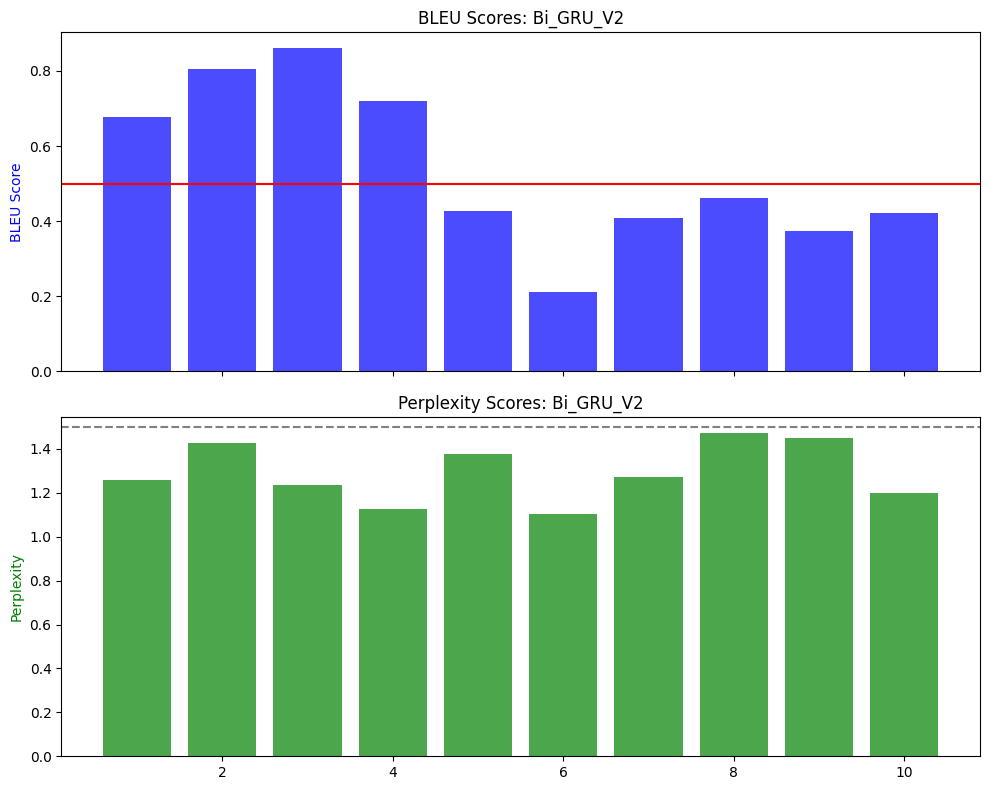

In [513]:
calc_bleu_and_perplexity("Bi_GRU_V2", Bi_GRU_V2, seed_texts, 0.1) 

**Observations**
- BLEU score are not attaining a very good score and not all the quotes are very coherent.
- Perplexity values for all the quotes are relatively low though.

embrace each day with the greatest significance you can give to another to
BLEU Score: 0.3915
Perplexity: 1.5861

radiate some confidence and let it be the foundation of your strength
BLEU Score: 0.8055
Perplexity: 1.5591

believe that brightens someone's day leaving a trail of smiles and warmth
BLEU Score: 0.9068
Perplexity: 1.1413

life's actual purpose is a testament to inner strength and resilience of our planet
BLEU Score: 0.6780
Perplexity: 1.4356

dance through each and every opportunities to shine and heart is a gift a reminder
BLEU Score: 0.3278
Perplexity: 1.6058

let your time and energy within them with life and you will light to even
BLEU Score: 0.2229
Perplexity: 1.5320

every person is the compass of endless moments that propels you forward is
BLEU Score: 0.4702
Perplexity: 1.3785

our country Singapore is a tapestry woven with threads of love and hope and
BLEU Score: 0.6961
Perplexity: 1.1578

planet earth is a step towards witnessing miracles the extraordinary moments 

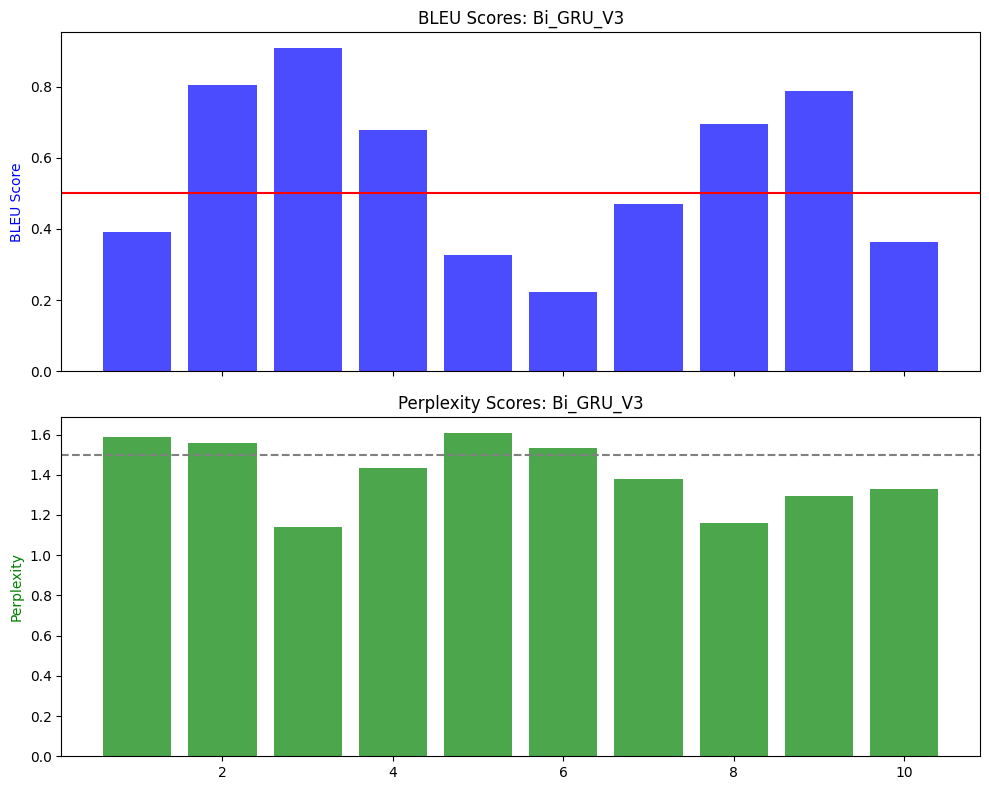

In [514]:
calc_bleu_and_perplexity("Bi_GRU_V3", Bi_GRU_V3, seed_texts, 0.1) 

**Observations**
- Predictions do not make sense, quotes are not that coherent.
- BLEU scores shown are very random.
- Perplexity values are still quite low though.

# 4) Model Improvement

### Attention Mechanism
- Allow models to focus on specific parts of the input sequence when making predictions, rather than relying on the entire input uniformly.
- Helps improve model's performance, especially when dealing with long sequences.
- Self-attention layers enable parallelization and capturing long range dependencies more effectively.

In [364]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    # Build method
    def build(self,input_shape):
        # Create a trainable weight variable for this layer
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="he_normal")
        # Create a trainable bias variable for this layer
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    # Call method
    def call(self,x):
        # Computes the attention scores
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        # Computes the attention weights using softmax activation function
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        # Compute the weighted sum of the input vectors
        output=x*at
        return K.sum(output,axis=1)

    # Compute output shape
    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    # Returns a dictionary containing the configuration used to initialize this layer
    def get_config(self):
        return super(attention,self).get_config()

### GRU Attention Mechanism
- GRU layer of 256 units with custom attention layer

In [433]:
tf.keras.backend.clear_session()

# Create the model to add in the attention for the GRU model  with 256 units
GRU_with_attention = Sequential(
    name='GRU_with_attention',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(256, activation='tanh', return_sequences=True),
        attention(),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
GRU_with_attention.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_with_attention_history = GRU_with_attention.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 16s 13ms/step - loss: 5.5021 - accuracy: 0.0758 - val_loss: 5.4139 - val_accuracy: 0.0748
Epoch 2/100
1148/1148 [==============================] - 7s 6ms/step - loss: 5.2011 - accuracy: 0.1002 - val_loss: 4.9225 - val_accuracy: 0.1339
Epoch 3/100
1148/1148 [==============================] - 7s 6ms/step - loss: 4.6384 - accuracy: 0.1534 - val_loss: 4.4547 - val_accuracy: 0.1709
Epoch 4/100
1148/1148 [==============================] - 7s 6ms/step - loss: 4.1699 - accuracy: 0.2063 - val_loss: 4.0326 - val_accuracy: 0.2332
Epoch 5/100
1148/1148 [==============================] - 7s 6ms/step - loss: 3.7454 - accuracy: 0.2693 - val_loss: 3.6740 - val_accuracy: 0.2907
Epoch 6/100
1148/1148 [==============================] - 6s 6ms/step - loss: 3.3814 - accuracy: 0.3247 - val_loss: 3.3617 - val_accuracy: 0.3374
Epoch 7/100
1148/1148 [==============================] - 6s 5ms/step - loss: 3.0609 - accuracy: 0.3758 - val_loss: 3.0834 - val_

In [434]:
GRU_with_attention.summary()

Model: "GRU_with_attention"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 34, 256)           205824    
                                                                 
 attention (attention)       (None, 256)               290       
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 526,247
Trainable params: 526,247
Non-trainable params: 0
_________________________________________________________________


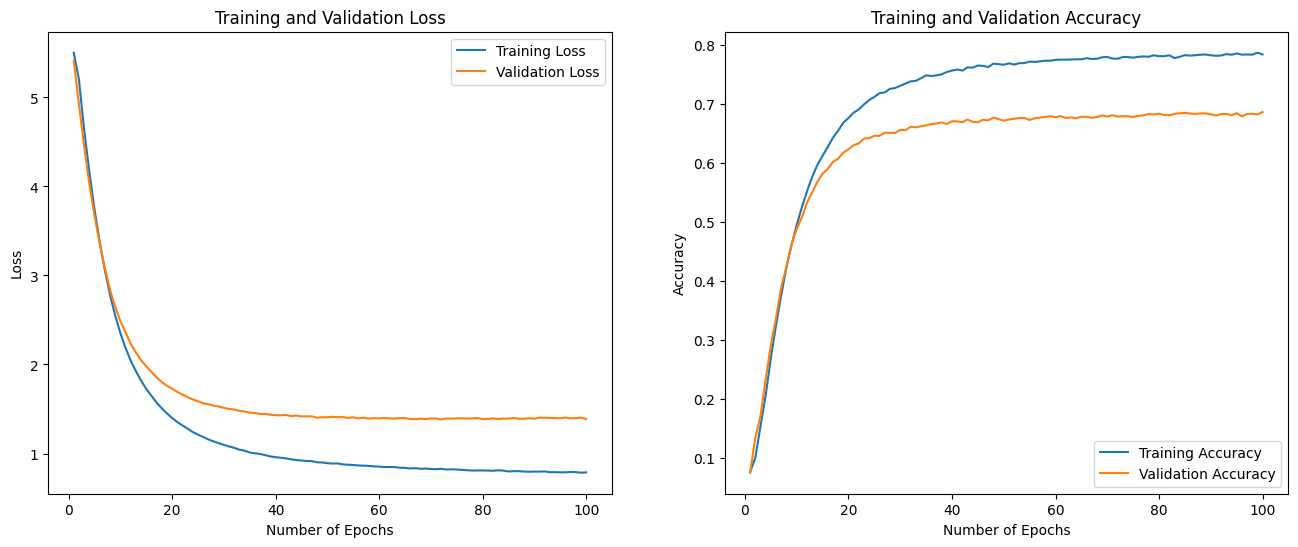

In [435]:
plot_learning_curve(GRU_with_attention_history.history)

**Observations**
- It looks like attention mechanism really did not converge as well as the training data.

In [436]:
GRU_with_attention.evaluate(X_test_roll, y_test_roll)

  1/383 [..............................] - ETA: 6s - loss: 1.2117 - accuracy: 0.7500383/383 [==============================] - 1s 2ms/step - loss: 1.3926 - accuracy: 0.6821


[1.3926458358764648, 0.6820856332778931]

**Observations**
- The accuracy actually got worse after including the attention layer.

#### Before Inserting Attention Layer

embrace each day with a heart full of gratitude for it is the
BLEU Score: 0.8735
Perplexity: 1.1224

radiate some gratitude for it is the heartbeat of a joyful heart
BLEU Score: 0.8055
Perplexity: 1.4275

believe that yourself and you will be a source of light for
BLEU Score: 0.8125
Perplexity: 1.2205

life's actual purpose is the pursuit of our passions and dreams and aspirations and
BLEU Score: 0.5845
Perplexity: 1.0996

dance through each and every inspire is a testament to the beauty of our uniqueness
BLEU Score: 0.6125
Perplexity: 1.1297

let your time and energy will follow and unites will transform hearts and minds is
BLEU Score: 0.1770
Perplexity: 1.7947

every person is the promise of becoming reality and let your heart be
BLEU Score: 0.5679
Perplexity: 1.3729

our country Singapore is a testament to the nation's resilience and unwavering determination and
BLEU Score: 0.6961
Perplexity: 1.1576

planet earth is a testament to your inner strength and resilience that resonates
BL

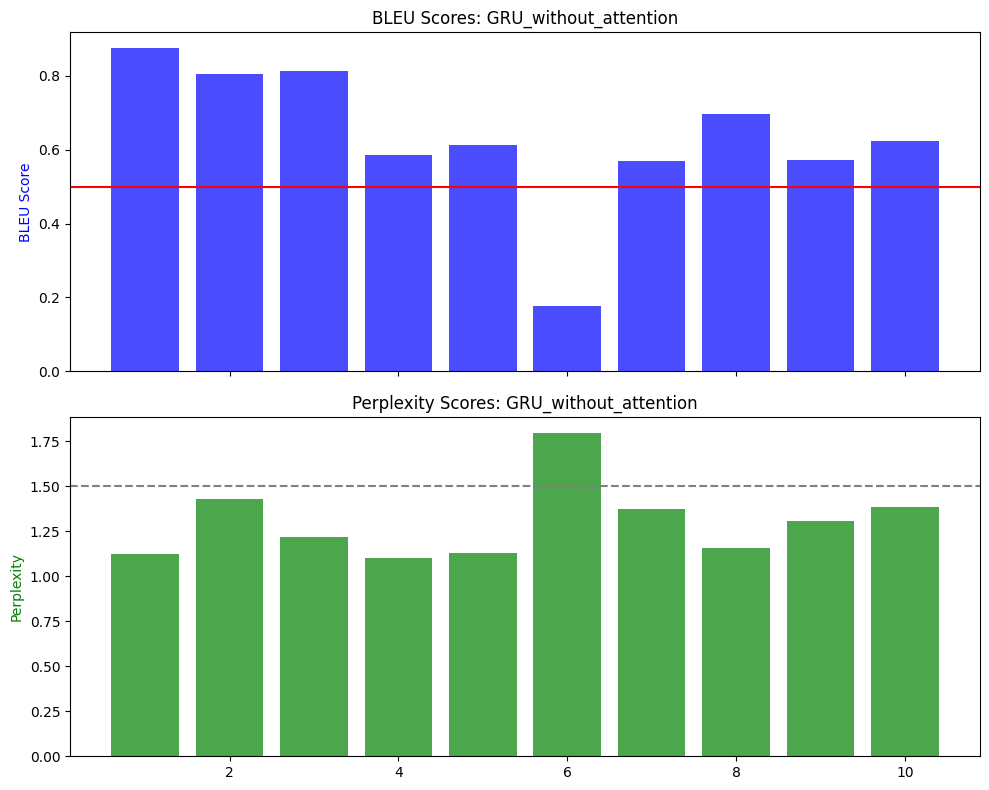

In [515]:
# Before
calc_bleu_and_perplexity("GRU_without_attention", GRU_V2, seed_texts, 0.1) 

#### After Inserting Attention Layer

embrace each day with a heart full of gratitude gratitude is a step
BLEU Score: 0.7087
Perplexity: 1.3148

radiate some gratitude for it turns even the smallest gifts into treasures
BLEU Score: 0.8055
Perplexity: 1.3092

believe that spreads are in the treasury of cherished memories a testament
BLEU Score: 0.6363
Perplexity: 1.5293

life's actual purpose is the legacy of love and compassion our planet and aspirations
BLEU Score: 0.3853
Perplexity: 1.5855

dance through each and every moment for a moment of a fresh start for new
BLEU Score: 0.2213
Perplexity: 1.4826

let your time and energy with joy and kindness will light up the world creating
BLEU Score: 0.3356
Perplexity: 1.7417

every person is a testament a gift to the boundless power of the
BLEU Score: 0.6769
Perplexity: 1.5491

our country Singapore is a canvas of your destiny each decision shaping the masterpiece
BLEU Score: 0.6544
Perplexity: 1.2263

planet earth is a treasure trove in the beauty in transitions in the
BLEU Sco

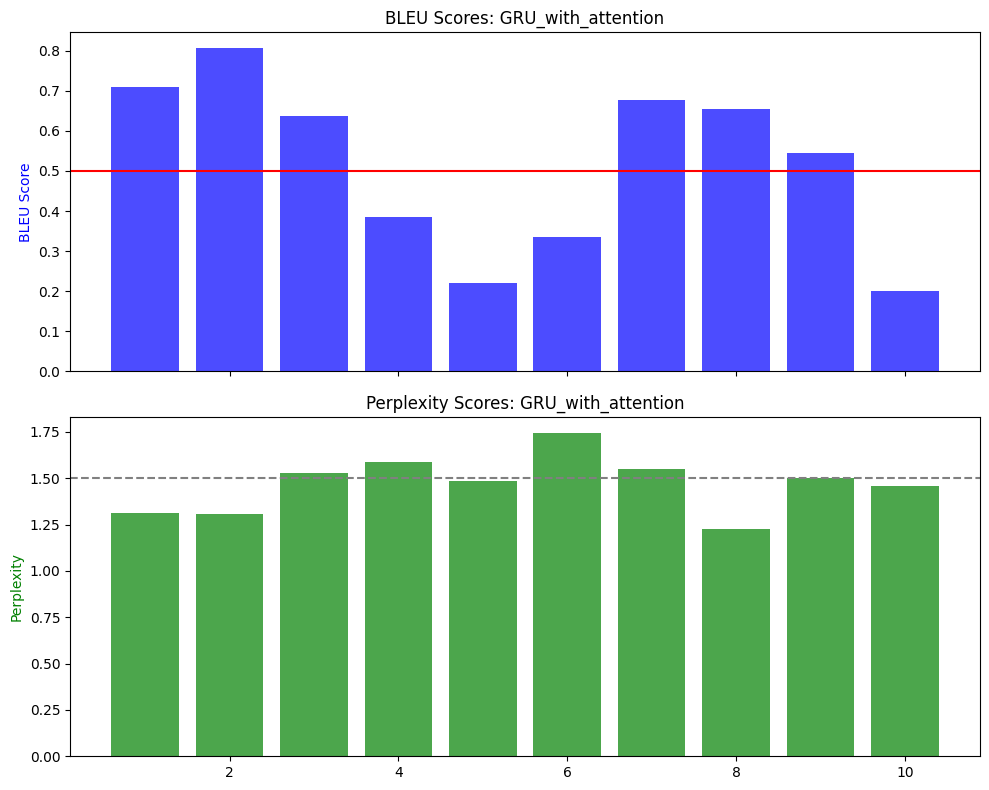

In [516]:
# After
calc_bleu_and_perplexity("GRU_with_attention", GRU_with_attention, seed_texts, 0.1) 

**Observations**
- As observed, the attention layer actually reduced the BLEU score of the predictions compared to before.
- Possible reason is that the quotes are not long enough for the attention mechanism to be very effective, weights are not being allocated as efficiently.
- Perplexity values have also increased compared to before, showing that the model is less confident in its predictions.

### LSTM Attention Mechanism
- LSTM layer of 64 units with attention layer

In [439]:
tf.keras.backend.clear_session()

# Create the model
LSTM_with_attention = Sequential(
    name='LSTM_with_attention',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        LSTM(64, activation='tanh', return_sequences=True),
        attention(),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
LSTM_with_attention.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_with_attention_history = LSTM_with_attention.fit(
    X_train_roll, y_train_roll,
    epochs=100,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/100
1148/1148 [==============================] - 7s 6ms/step - loss: 5.5198 - accuracy: 0.0782 - val_loss: 5.4083 - val_accuracy: 0.0748
Epoch 2/100
1148/1148 [==============================] - 6s 5ms/step - loss: 5.2942 - accuracy: 0.0791 - val_loss: 5.2472 - val_accuracy: 0.0749
Epoch 3/100
1148/1148 [==============================] - 6s 5ms/step - loss: 5.1861 - accuracy: 0.0849 - val_loss: 5.1673 - val_accuracy: 0.0942
Epoch 4/100
1148/1148 [==============================] - 6s 5ms/step - loss: 5.1154 - accuracy: 0.0931 - val_loss: 5.0996 - val_accuracy: 0.0938
Epoch 5/100
1148/1148 [==============================] - 6s 5ms/step - loss: 5.0351 - accuracy: 0.0993 - val_loss: 5.0172 - val_accuracy: 0.1038
Epoch 6/100
1148/1148 [==============================] - 6s 5ms/step - loss: 4.9538 - accuracy: 0.1121 - val_loss: 4.9357 - val_accuracy: 0.1327
Epoch 7/100
1148/1148 [==============================] - 6s 5ms/step - loss: 4.8631 - accuracy: 0.1326 - val_loss: 4.8768 - val_ac

In [440]:
LSTM_with_attention.summary()

Model: "LSTM_with_attention"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 lstm (LSTM)                 (None, 34, 64)            19200     
                                                                 
 attention (attention)       (None, 64)                98        
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1199)              77935     
                                                                 
Total params: 109,223
Trainable params: 109,223
Non-trainable params: 0
_________________________________________________________________


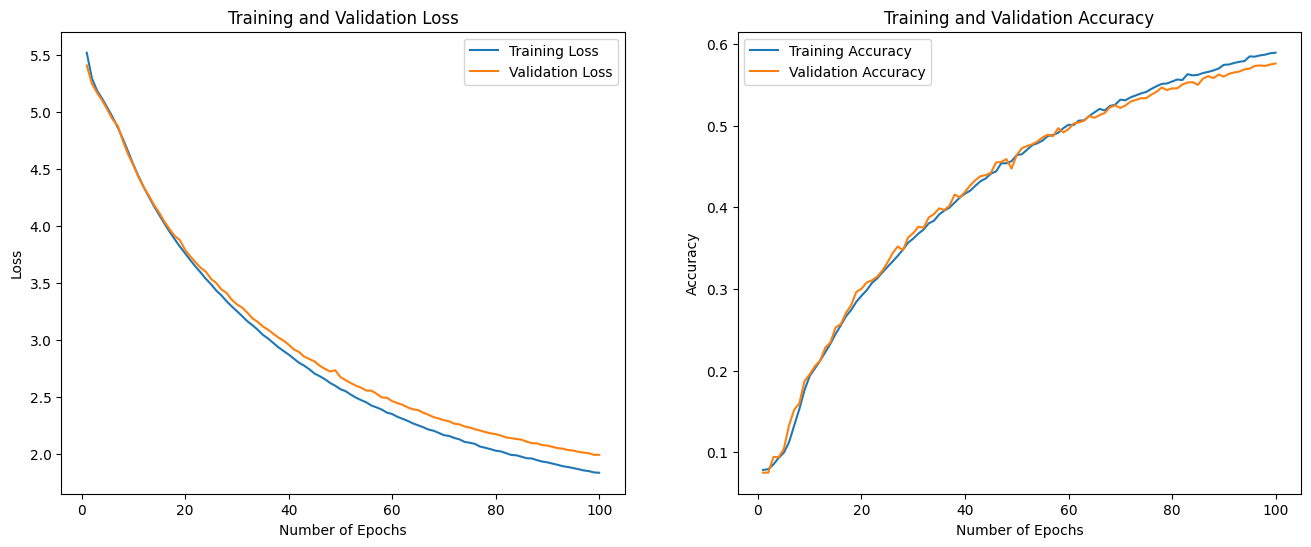

In [441]:
plot_learning_curve(LSTM_with_attention_history.history)

**Observations**
- After applying the attention layer, the validation loss and accuracy curves are quite close to the training loss and accuracy curves.
- However, they converge slower than any other models

In [444]:
LSTM_with_attention.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.9579 - accuracy: 0.5811


[1.957946538925171, 0.5810722708702087]

**Observations**
- After applying the attention layer, the test accuracy drops to 0.58 which is the lowest so far.

#### Before Inserting Attention Layer

embrace each day is a precious gift a gift that your dreams and
BLEU Score: 0.1035
Perplexity: 1.6664

radiate some confidence and let it be the spark that ignites positivity
BLEU Score: 0.8055
Perplexity: 1.7350

believe that brightens someone's day leaving a trail of smiles and warmth
BLEU Score: 0.9068
Perplexity: 1.2685

life's actual purpose is a testament to the beauty of the human spirit a
BLEU Score: 0.6961
Perplexity: 1.3686

dance through each and every opportunities to shine for they hold the keys to your
BLEU Score: 0.5100
Perplexity: 1.2736

let your time and energy it is the heartbeat of humanity and let your heart
BLEU Score: 0.4646
Perplexity: 1.5373

every person is a testament to the beauty of the human spirit a
BLEU Score: 0.7744
Perplexity: 1.3263

our country Singapore is the heartbeat of our planet and let it be the
BLEU Score: 0.5235
Perplexity: 1.6284

planet earth is a classroom where we learn to love and forgive and
BLEU Score: 0.7440
Perplexity: 1.5427

morni

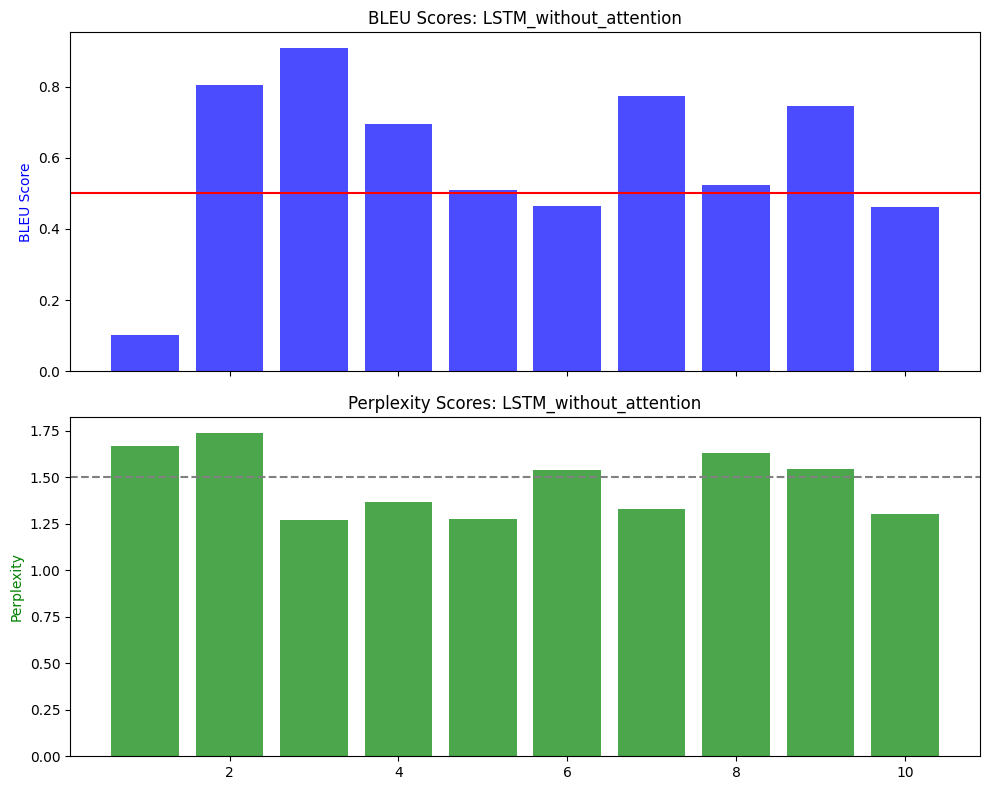

In [535]:
calc_bleu_and_perplexity("LSTM_without_attention", LSTM_V2, seed_texts, 0.1) 

**Observations**
- The BLEU score before applying the attention layer was quite high but the words predicted are not that coherent.
- Perplexity levels are also quite low.

#### After Inserting Attention Layer

embrace each day is a gift in the world of life giving the
BLEU Score: 0.0990
Perplexity: 2.3971

radiate some kindness and let it be the foundation of your soul
BLEU Score: 0.6764
Perplexity: 2.1509

believe that ignites your soul it can light up the world of
BLEU Score: 0.5028
Perplexity: 2.9669

life's actual purpose is a testament to the beauty in the human and joy
BLEU Score: 0.4218
Perplexity: 2.7394

dance through each and every day is a step towards a brighter future in the
BLEU Score: 0.6118
Perplexity: 1.9689

let your time and energy we take flight of your kindness be the beacon of
BLEU Score: 0.3139
Perplexity: 2.1783

every person is the promise of our planet and dreams and aspirations and
BLEU Score: 0.1035
Perplexity: 1.9504

our country Singapore is a liberation of the world of the heart a serene
BLEU Score: 0.5346
Perplexity: 2.6846

planet earth is a testament to the beauty of our planet holds the
BLEU Score: 0.6198
Perplexity: 2.1657

morning and evening would make i

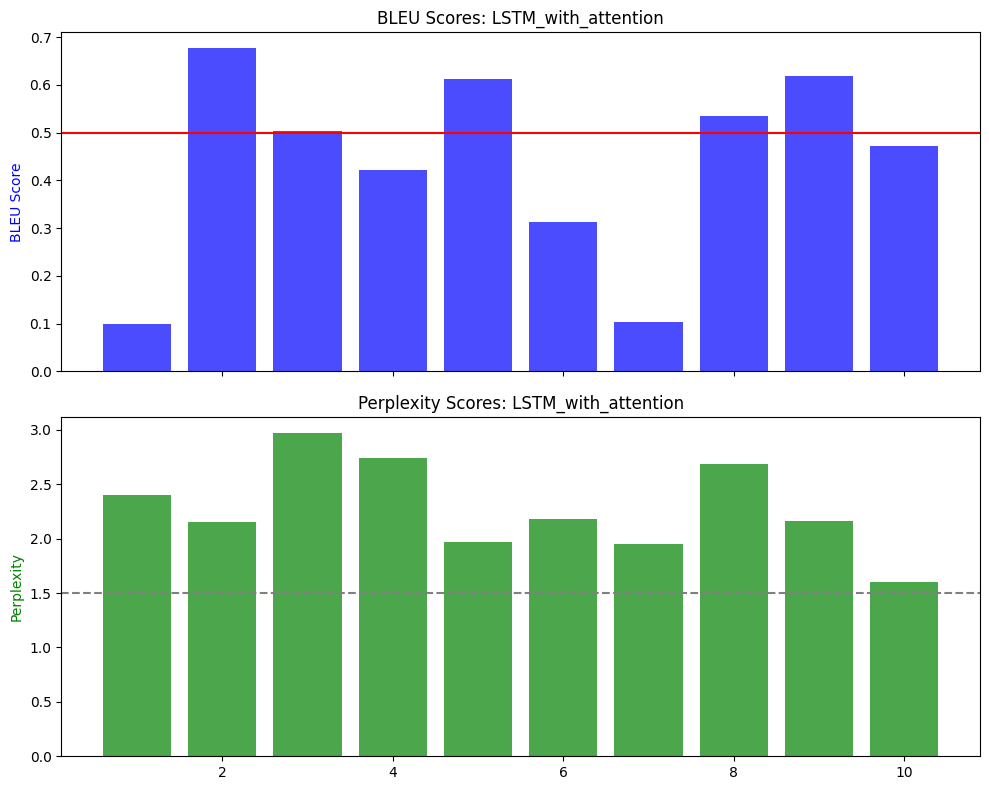

In [518]:
calc_bleu_and_perplexity("LSTM_with_attention", LSTM_with_attention, seed_texts, 0.1) 

**Observations**
- After applying the attention layer, the predicted words got worse and the BLEU score are also getting worse.
- Perplexity levels are also getting worse, almost hitting levels of 3.

## Optimizers
**Adam**
- An adaptive learning rate optimization algorithm
- Maintains a moving average of both the gradients and the second moments of the gradients
- Adapts the learning rate of each parameter individually

**SGD (Stochastic Gradient Descent)**
- Basic optimization algorithm which update the model parameters based on the negative gradient of the loss function with respect to each parameter.
- Each update is based on a random subset of the training data (mini batch)

### GRU with SGD optimizer

In [450]:
# SGD optimizer
tf.keras.backend.clear_session()

# Create the model
GRU_SGD = Sequential(
    name='GRU_SGD',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(256, activation='tanh'),

        Dropout(0.3),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = SGD(learning_rate=0.001,  momentum = 0.9, nesterov= True)
GRU_SGD.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_SGD_history = GRU_SGD.fit(
    X_train_roll, y_train_roll,
    epochs=200,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/200
1148/1148 [==============================] - 15s 13ms/step - loss: 6.7513 - accuracy: 0.0791 - val_loss: 5.8850 - val_accuracy: 0.0749
Epoch 2/200
1148/1148 [==============================] - 6s 5ms/step - loss: 5.6069 - accuracy: 0.0775 - val_loss: 5.4710 - val_accuracy: 0.0749
Epoch 3/200
1148/1148 [==============================] - 6s 5ms/step - loss: 5.4680 - accuracy: 0.0785 - val_loss: 5.4288 - val_accuracy: 0.0749
Epoch 4/200
1148/1148 [==============================] - 6s 5ms/step - loss: 5.4422 - accuracy: 0.0767 - val_loss: 5.4166 - val_accuracy: 0.0749
Epoch 5/200
1148/1148 [==============================] - 6s 5ms/step - loss: 5.4315 - accuracy: 0.0766 - val_loss: 5.4157 - val_accuracy: 0.0748
Epoch 6/200
1148/1148 [==============================] - 6s 5ms/step - loss: 5.4235 - accuracy: 0.0768 - val_loss: 5.4112 - val_accuracy: 0.0748
Epoch 7/200
1148/1148 [==============================] - 6s 5ms/step - loss: 5.4188 - accuracy: 0.0768 - val_loss: 5.4142 - val_

**Observations**
- As we observe, the validation accuracy is for the last few epochs are actually lower when using SGD optimizer compared to when using Adam optimizer.
- This might be due to the fact that Adam adapts the learning rate during training, making it less sensitive to initial learning rate choice which can make Adam converge faster.
- It can also be due to different weight initialization.

In [451]:
GRU_SGD.summary()

Model: "GRU_SGD"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 256)               205824    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 525,957
Trainable params: 525,957
Non-trainable params: 0
_________________________________________________________________


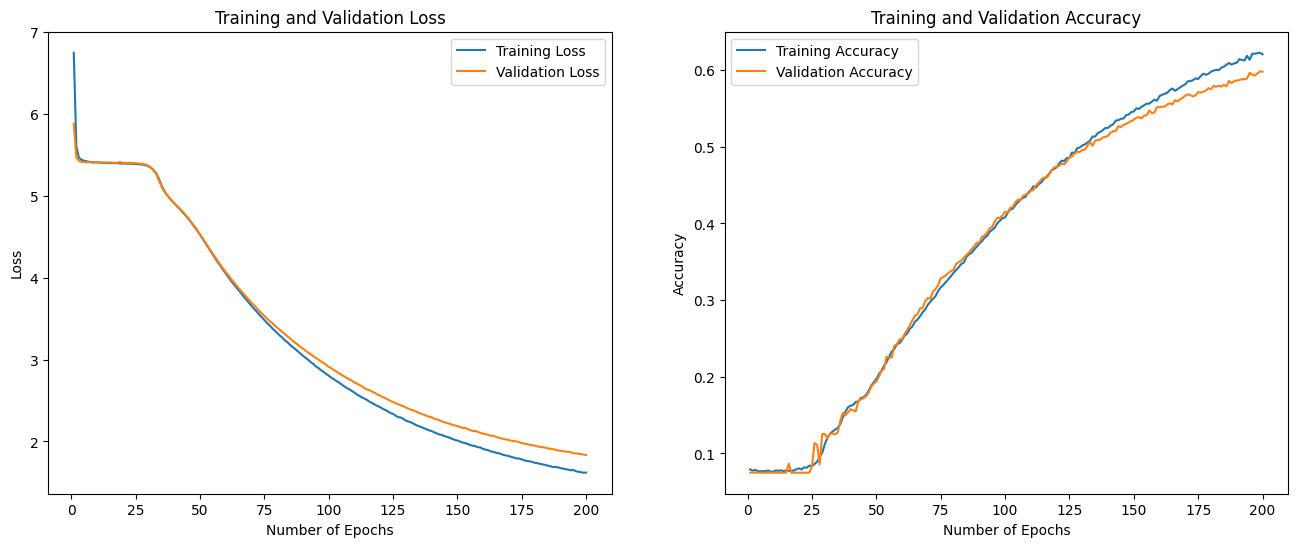

In [452]:
plot_learning_curve(GRU_SGD_history.history)

**Observations**
- The loss curve just show a sharp and quick drop of the training and validation loss in the initial epochs.
- Accuracy curve just had show a slight increase in the first 25 epochs then increase gradually in the next few epochs.
- Maybe we will have to change the learning rate and intialise weights differently for SGD

In [453]:
GRU_SGD.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 2ms/step - loss: 1.8300 - accuracy: 0.6006


[1.830045461654663, 0.600604772567749]

**Observations**
- We can see that the test accuracy is still generally low

embrace each day with the world that take life into the earth that
BLEU Score: 0.2710
Perplexity: 3.3944

radiate some kindness and let it be the foundation of your soul
BLEU Score: 0.6764
Perplexity: 1.8476

believe that this morning brings your way and new beginnings reminding us
BLEU Score: 0.0317
Perplexity: 1.9777

life's actual purpose is a step towards excellence and progress and strength to create
BLEU Score: 0.4833
Perplexity: 2.2055

dance through each and every take flight of our planet deepest desires a reminder of
BLEU Score: 0.0849
Perplexity: 1.9626

let your time and energy will follow up the world of life around you of
BLEU Score: 0.0610
Perplexity: 1.8456

every person is a testament to the beauty of our planet and aspirations
BLEU Score: 0.6381
Perplexity: 1.7315

our country Singapore is a testament to the beauty and richness that meaningful connections
BLEU Score: 0.7607
Perplexity: 1.1745

planet earth is a gift a stroke of the brush a deliberate mark
BLEU Score: 

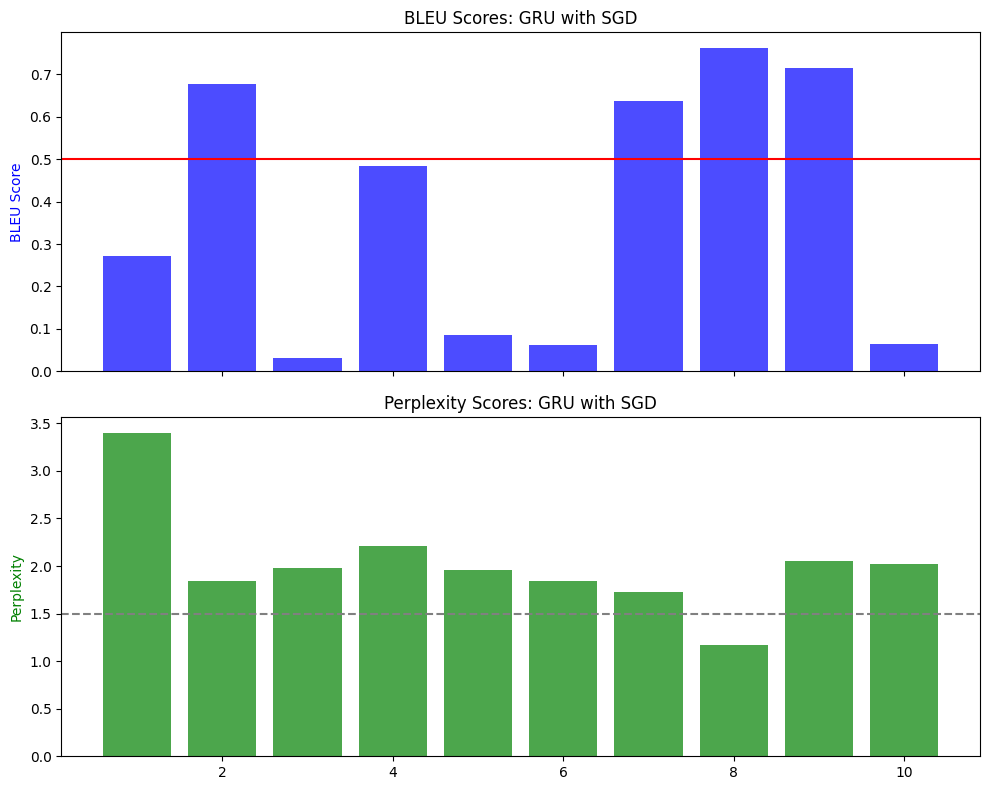

In [519]:
calc_bleu_and_perplexity("GRU with SGD", GRU_SGD, seed_texts, 0.1) 

**Observations**
- Words predicted are also not as coherent, BLEU scores are also not as high, especially for Quotes 2, 8, 9 and 10. 
- However, perplexity levels are way too high when using SGD.
- Hence, we will continue using Adam.

### L2 Regularized GRU + Increased Dropout
- GRU layer with 256 units
- Added L2 Regularization of 0.01
- Increased Dropout to 0.5
- **L2 Regularization**: 
    - Known as weight decay and usually better over L1. Forces the weights to decay towards zero.
$$ L2(\theta) = \lambda \sum_{i=1}^{n} w_i^2 $$
- **Dropout**
    - Have been using this form of regularisation so far.
    - At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.

In [445]:
tf.keras.backend.clear_session()

# Create the model
GRU_l2 = Sequential(
    name='GRU_L2_Regularizer',
    layers=[
        Embedding(total_words_rolling, 10, input_length = max_sequence_rolling_len),
        GRU(256, activation='tanh', kernel_regularizer=l2(0.01)),

        Dropout(0.5),
        Dense(total_words_rolling, activation='softmax')
    ]
)

opt = Adam(learning_rate=0.001)
GRU_l2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

GRU_l2_history = GRU_l2.fit(
    X_train_roll, y_train_roll,
    epochs=200,
    validation_data = (X_val_roll, y_val_roll),
    batch_size=32,
    verbose=1
)

Epoch 1/200
1148/1148 [==============================] - 7s 6ms/step - loss: 5.2198 - accuracy: 0.1135 - val_loss: 4.7189 - val_accuracy: 0.1478
Epoch 2/200
1148/1148 [==============================] - 6s 5ms/step - loss: 4.4693 - accuracy: 0.1727 - val_loss: 4.2076 - val_accuracy: 0.2036
Epoch 3/200
1148/1148 [==============================] - 6s 5ms/step - loss: 4.0053 - accuracy: 0.2234 - val_loss: 3.8017 - val_accuracy: 0.2565
Epoch 4/200
1148/1148 [==============================] - 6s 5ms/step - loss: 3.5961 - accuracy: 0.2878 - val_loss: 3.4021 - val_accuracy: 0.3293
Epoch 5/200
1148/1148 [==============================] - 6s 5ms/step - loss: 3.2344 - accuracy: 0.3466 - val_loss: 3.0770 - val_accuracy: 0.3833
Epoch 6/200
1148/1148 [==============================] - 6s 5ms/step - loss: 2.9542 - accuracy: 0.3931 - val_loss: 2.8476 - val_accuracy: 0.4269
Epoch 7/200
1148/1148 [==============================] - 6s 5ms/step - loss: 2.7423 - accuracy: 0.4256 - val_loss: 2.6940 - val_ac

In [463]:
GRU_l2.summary()

Model: "GRU_L2_Regularizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 10)            11990     
                                                                 
 gru (GRU)                   (None, 256)               205824    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1199)              308143    
                                                                 
Total params: 525,957
Trainable params: 525,957
Non-trainable params: 0
_________________________________________________________________


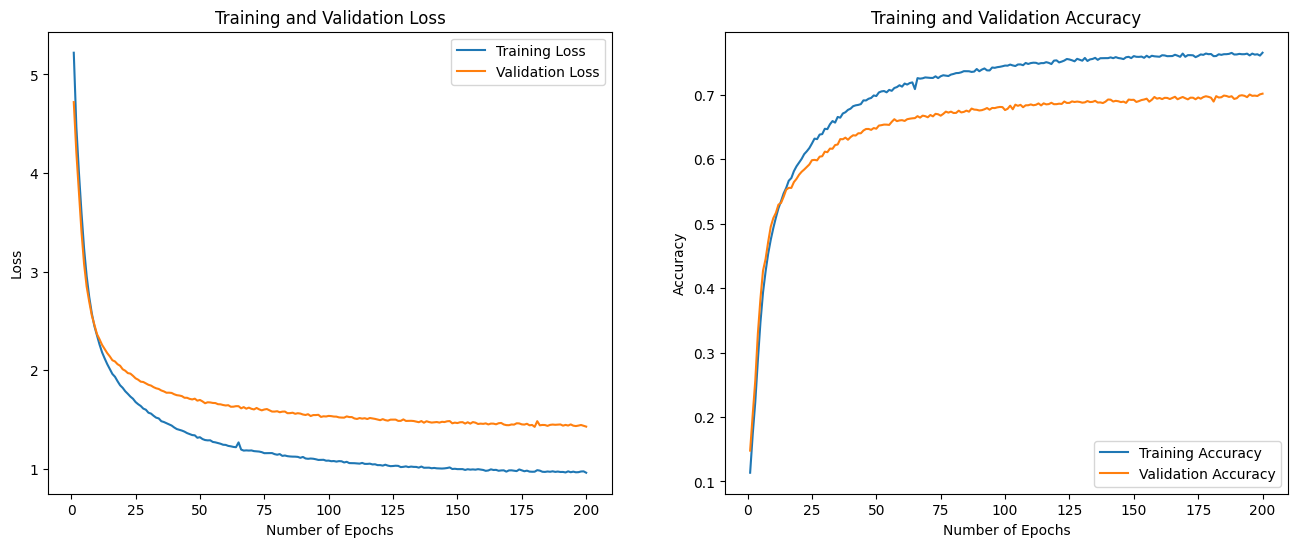

In [460]:
plot_learning_curve(GRU_l2_history.history)

**Observations**
- Learning curves of both loss and accuracy seems to converge well to a certain point.
- Training loss is still lower than validation loss and the training accuracy is still higher than the validation accuracy.

In [464]:
GRU_l2.evaluate(X_test_roll, y_test_roll)

383/383 [==============================] - 1s 3ms/step - loss: 1.4379 - accuracy: 0.6980


[1.437853455543518, 0.6980222463607788]

**Observations**
- The test accuracy evaluated was a bit lower than before regularizing, previously 0.70.

embrace each day with a heart full of gratitude for the soul of
BLEU Score: 0.7238
Perplexity: 1.3966

radiate some gratitude for it turns even the smallest gifts into treasures
BLEU Score: 0.8055
Perplexity: 1.3421

believe that yourself for you are the architect of your destiny each
BLEU Score: 0.8125
Perplexity: 1.2718

life's actual purpose is the pursuit of purpose and meaning it southern nature park's
BLEU Score: 0.4250
Perplexity: 1.4077

dance through each and every step to a treasure in the treasury of cherished memories
BLEU Score: 0.5576
Perplexity: 1.2261

let your time and energy and the opportunities and touch the opportunities that this morning
BLEU Score: 0.0552
Perplexity: 1.5238

every person is a step towards excellence and progress and innovation and strength
BLEU Score: 0.5679
Perplexity: 1.4008

our country Singapore is created change the love to your growth and compassion your
BLEU Score: 0.0635
Perplexity: 2.0135

planet earth is the compass of endless explorati

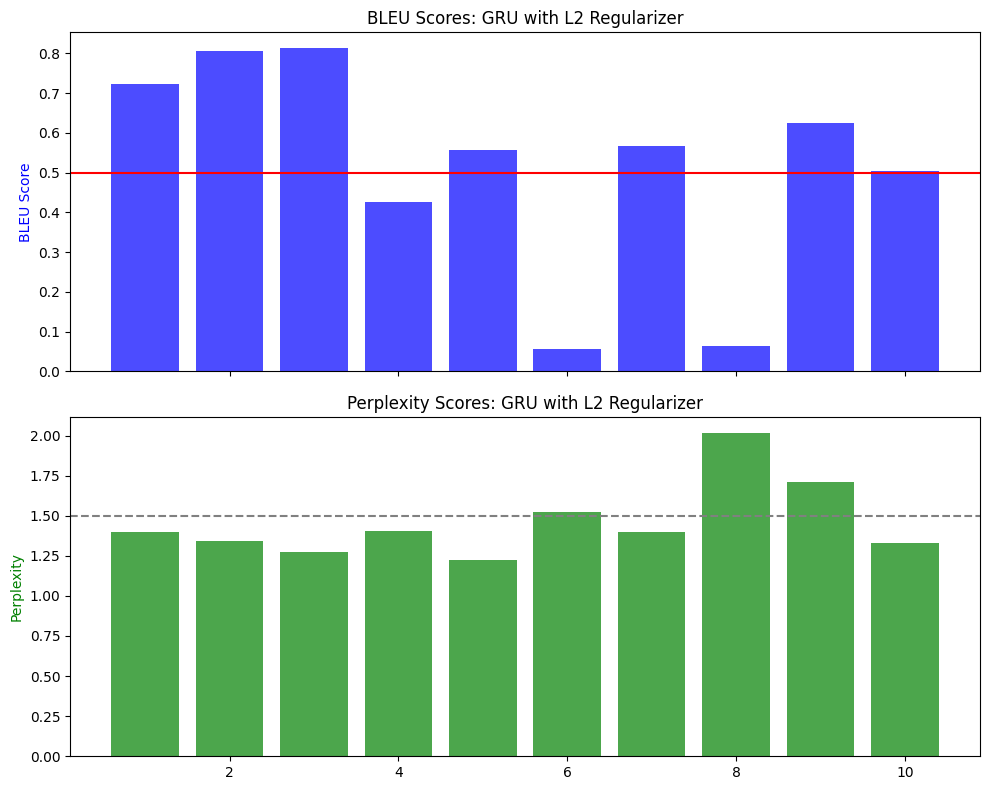

In [521]:
calc_bleu_and_perplexity("GRU with L2 Regularizer", GRU_l2, seed_texts, 0.1)

**Observations**
- Not only has the quotes become less coherent, the BLEU scores have become relatively worse for more quotes.
- Perplexity value for certain quotes like quote 8 has also reached higher than usual.

### Final Model: GRU V2
- Unfortunately, even though some improvement was able to lower the perplexity levels and increased the BLEU scores, it made the quotes more incoherent.
- Hence, I will stick to using GRU Version 2 which has a GRU layer with 256 units and Dropout of 0.3.
- If the dataset was much larger and had more quotes of similar headings as the ones provided in the seed text, the coherency of the predicted texts would be greatly improved.

In [536]:
#Function to plot a graph to consolidate BLEU scores and perplexity, BERTScore
def calc_scores(model_name ,model, seed_texts, temperature, num_word=10):
    
    bleu_scores = []
    perplexity_scores = []
    for seed_text in seed_texts:
        prediction, loss = predict_next_words(seed_text, model, temperature, num_word)
        print(''.join(prediction))
        bleu_score = evaluate_bleu_score(prediction)
        perplexity = calculate_perplexity(loss, len(prediction.split(' ')))
        bert_score = evaluate_bert_score(prediction)
        print()
        bleu_scores.append(bleu_score)
        perplexity_scores.append(perplexity)

    # Plot a bar graph to show the BLEU scores
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)
    
    # Plot BLEU scores
    ax1.bar(range(1, len(bleu_scores)+1), bleu_scores, color='blue', alpha=0.7)
    ax1.set_title(f'BLEU Scores: {model_name}')
    ax1.set_ylabel("BLEU Score", color="blue")
    ax1.axhline(y=0.5, color='r', linestyle='-')
    
    # Plot perplexity scores
    ax2.bar(range(1, len(perplexity_scores)+1), perplexity_scores, color='green', alpha=0.7)
    ax2.set_title(f'Perplexity Scores: {model_name}')
    ax2.set_ylabel("Perplexity", color="green")
    ax2.axhline(y=1.5, color='grey', linestyle='--')
    
    plt.tight_layout()
    plt.show()

embrace each day with a heart full of gratitude for it is the
BLEU Score: 0.8735
Perplexity: 1.1224


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9212
Recall: 0.9651
F1 Score: 0.9426

radiate some gratitude for it is the heartbeat of a joyful heart
BLEU Score: 0.8055
Perplexity: 1.4275


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9435
Recall: 0.9491
F1 Score: 0.9455

believe that yourself and you will be a source of light for
BLEU Score: 0.8125
Perplexity: 1.2205


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9359
Recall: 0.9287
F1 Score: 0.9323

life's actual purpose is the pursuit of our passions and dreams and aspirations and
BLEU Score: 0.5845
Perplexity: 1.0996


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9127
Recall: 0.9426
F1 Score: 0.9274

dance through each and every inspire is a testament to the beauty of our uniqueness
BLEU Score: 0.6125
Perplexity: 1.1297


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9018
Recall: 0.9402
F1 Score: 0.9206

let your time and energy will follow and become a beacon of light in the
BLEU Score: 0.5114
Perplexity: 1.3926


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8814
Recall: 0.9007
F1 Score: 0.8902

every person is the jewels set in the crown of the sea of
BLEU Score: 0.7281
Perplexity: 1.1199


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9185
Recall: 0.8905
F1 Score: 0.9042

our country Singapore is a testament to the nation's resilience and unwavering determination and
BLEU Score: 0.6961
Perplexity: 1.1576


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9069
Recall: 0.9117
F1 Score: 0.9093

planet earth is a testament to your inner strength and resilience that resonates
BLEU Score: 0.5714
Perplexity: 1.3073


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.9130
Recall: 0.9364
F1 Score: 0.9245

morning and evening would make it is the compass of endless discovery soul and inner peace
BLEU Score: 0.4312
Perplexity: 1.1988


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8675
Recall: 0.8877
F1 Score: 0.8775



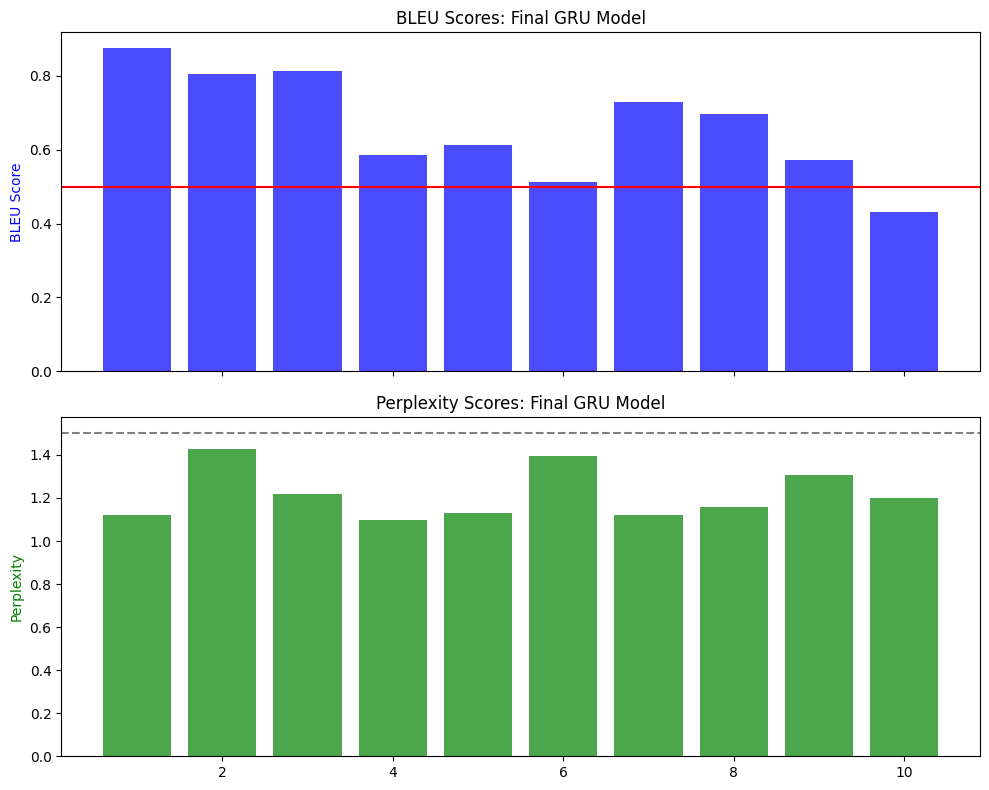

In [537]:
calc_scores("Final GRU Model", GRU_V2, seed_texts, 0.1)

**Observations**
- As seen, the BERTScore shows that the precision, recall and f1 score for all the quotes were relatively high, except the last quote, only obtaining mean values of 0.8 for the 3 aforementioned metrics.
- High BLEU Score indicates a good level of agreement between the predicted text and the referenced text.
- Perplexity values were all below the 1.5 threshold, indicating that this model is more confident in its predictions and is better at assigning high probabilities to the actual words in the sequence, implying how meaningful the quotes are.

### Demonstrate creativity of quote generation
- To demonstrate how random my model is at generating the words, I shall show how the temperature works
- Shall amend previous functions to insert in sampling methods to randomly sample from the top-k most likely words for more focused and coherent responses

In [555]:
def predict_next_words_top_k(input_text, model, temperature, num_words=1):
    log_likelihood = 0.0
    for _ in range(num_words):
        tokens = tokenizer.texts_to_sequences([input_text])[0]
        tokens = pad_sequences([tokens], maxlen=max_sequence_rolling_len, padding='pre')
        predicted_prob = model.predict(tokens, verbose=0)[0]
        prediction = np.log(predicted_prob) / temperature
        exp_preds = np.exp(prediction)
        predicted_probs = exp_preds / np.sum(exp_preds)

        # Get the top 5 words with the highest probability
        top_k_indices = np.argpartition(predicted_probs, -5)[-5:]
        chosen_word_index = np.random.choice(top_k_indices, p=predicted_probs[top_k_indices]/np.sum(predicted_probs[top_k_indices]))
        predicted_word = tokenizer.index_word[chosen_word_index]
        input_text += " " + predicted_word
        log_likelihood += np.log2(predicted_prob[chosen_word_index])
    return input_text, log_likelihood

In [556]:
#Function to plot a graph to consolidate BLEU scores and perplexity
def calc_bleu_and_perplexity_top_k(model_name ,model, seed_texts, temperature, num_word=10):
    
    bleu_scores = []
    perplexity_scores = []
    for seed_text in seed_texts:
        prediction, loss = predict_next_words(seed_text, model, temperature, num_word)
        print(''.join(prediction))
        bleu_score = evaluate_bleu_score(prediction)
        perplexity = calculate_perplexity(loss, len(prediction.split(' ')))
        print()
        bleu_scores.append(bleu_score)
        perplexity_scores.append(perplexity)

    # Plot a bar graph to show the BLEU scores
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)
    
    # Plot BLEU scores
    ax1.bar(range(1, len(bleu_scores)+1), bleu_scores, color='blue', alpha=0.7)
    ax1.set_title(f'BLEU Scores: {model_name}')
    ax1.set_ylabel("BLEU Score", color="blue")
    ax1.axhline(y=0.5, color='r', linestyle='-')
    
    # Plot perplexity scores
    ax2.bar(range(1, len(perplexity_scores)+1), perplexity_scores, color='green', alpha=0.7)
    ax2.set_title(f'Perplexity Scores: {model_name}')
    ax2.set_ylabel("Perplexity", color="green")
    ax2.axhline(y=1.5, color='grey', linestyle='--')
    
    plt.tight_layout()
    plt.show()

embrace each day with a heart full of gratitude for they are the
BLEU Score: 0.7543
Perplexity: 1.1299

radiate some gratitude for it is the heartbeat of a joyful heart
BLEU Score: 0.8055
Perplexity: 1.4275

believe that yourself and you will be a source of light for
BLEU Score: 0.8125
Perplexity: 1.2205

life's actual purpose is the pursuit of our passions and dreams and aspirations and
BLEU Score: 0.5845
Perplexity: 1.0996

dance through each and every inspire is a testament to the beauty of our uniqueness
BLEU Score: 0.6125
Perplexity: 1.1297

let your time and energy will follow and become a beacon of light in the
BLEU Score: 0.5114
Perplexity: 1.3926

every person is the jewels set in the crown of the sea of
BLEU Score: 0.7281
Perplexity: 1.1199

our country Singapore is a testament to the nation's resilience and unwavering determination and
BLEU Score: 0.6961
Perplexity: 1.1576

planet earth is a testament to your inner strength and resilience that resonates
BLEU Score: 0.5714
Pe

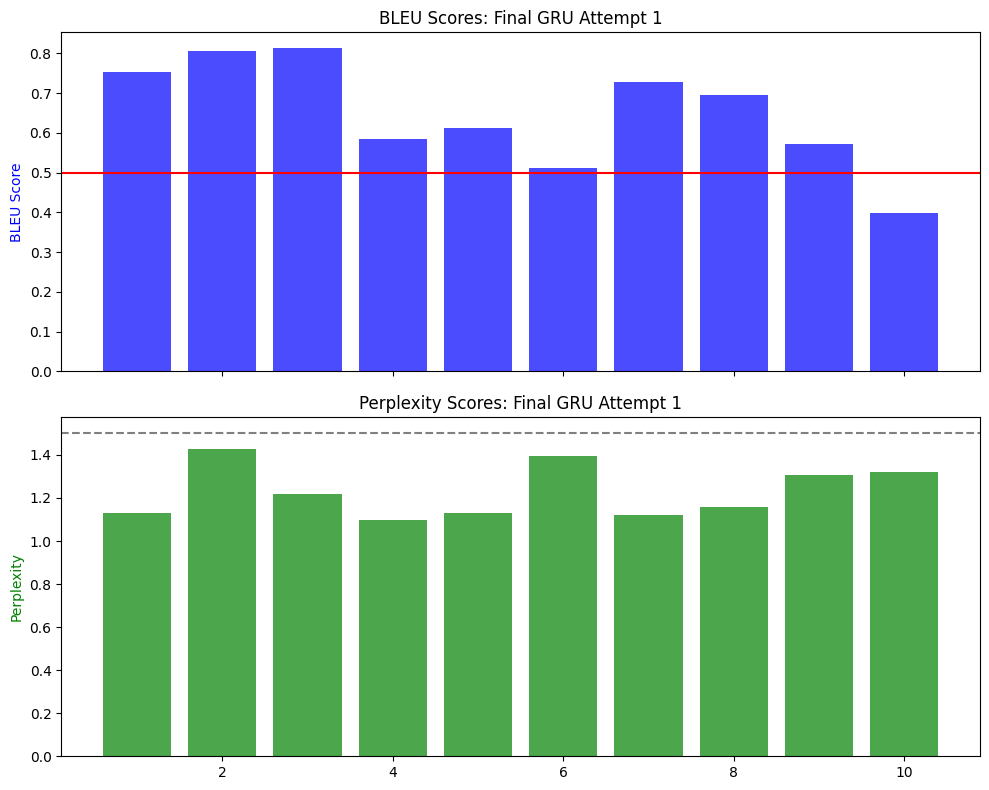

In [557]:
calc_bleu_and_perplexity_top_k("Final GRU Attempt 1", GRU_V2, seed_texts, 0.23)

embrace each day with a heart full of gratitude for they are the
BLEU Score: 0.7543
Perplexity: 1.1299

radiate some grace and let it be the signature of your presence
BLEU Score: 0.8055
Perplexity: 1.2933

believe that yourself and let your light shine bright brightly park's powerful
BLEU Score: 0.5157
Perplexity: 1.5878

life's actual purpose is the pursuit of our passions and dreams and aspirations and
BLEU Score: 0.5845
Perplexity: 1.0996

dance through each and every inspire is a testament to the beauty of our uniqueness
BLEU Score: 0.6125
Perplexity: 1.1297

let your time and energy will follow the simplest moments into treasures of our planet
BLEU Score: 0.3947
Perplexity: 1.4538

every person is the promise of becoming reality and let your heart be
BLEU Score: 0.5679
Perplexity: 1.3729

our country Singapore is a testament to the nation's resilience and unwavering determination and
BLEU Score: 0.6961
Perplexity: 1.1576

planet earth is a testament to your inner strength and res

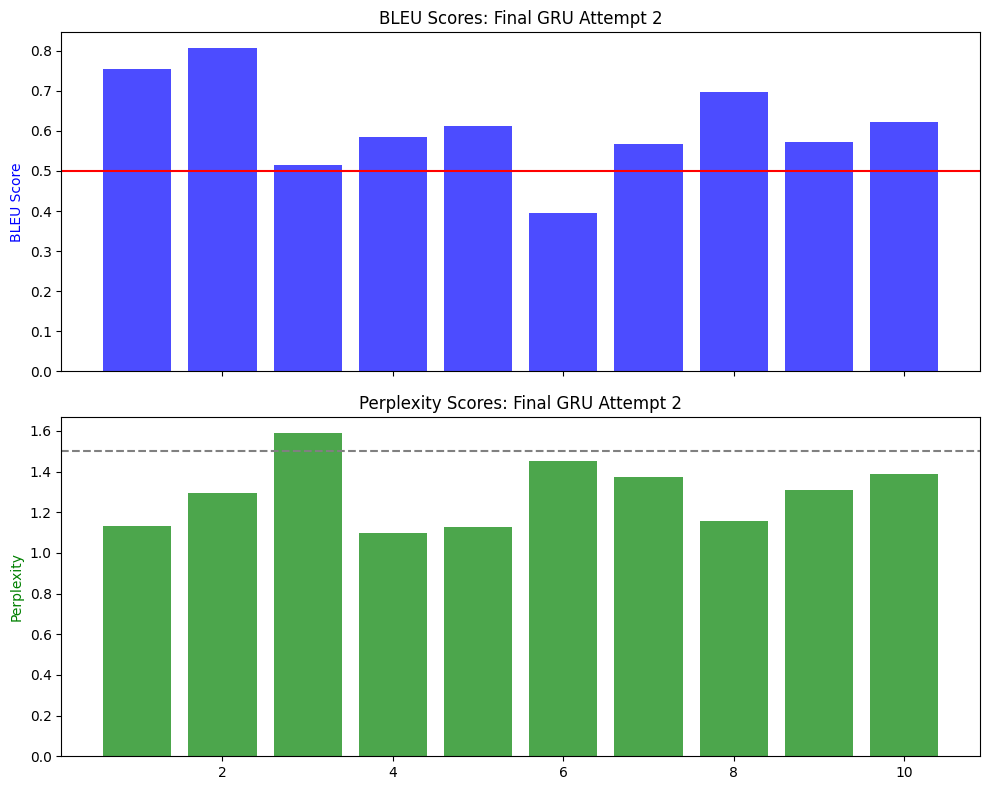

In [558]:
calc_bleu_and_perplexity_top_k("Final GRU Attempt 2", GRU_V2, seed_texts, 0.3)

**Observations**
- Quotes generated gets random everytime the model is ran and used to predict new words.

### Save Weights of Final Model
- Saving the weights of the final model.

In [559]:
# Save weights of the final model
GRU_V2.save_weights("./RNN_FinalModels/Final_GRU_256.h5")

# 5) Summary
In summary, for next word prediction, there is insufficient data to make the accuracy as high as models used for other tasks, predictions are also not very coherent because of that. The model I think performed best for this task is the GRU with 256 units and a Dropout of 0.3 based on how coherent the text was, how high the BLEU score was and how low the perplexity values were.